In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Activation, Flatten,Reshape,Dropout,UpSampling2D,AveragePooling2D,BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


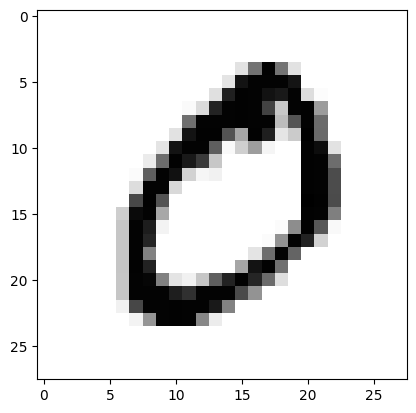

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
plt.imshow(X_train[1],cmap='Greys')
print(X_train.shape)

In [ ]:
X_train=X_train/127.5 -1

In [ ]:
X_train[0].min()

-1.0

In [ ]:
X_train=np.expand_dims(X_train,axis=3)

Hacemos una función para crear el generador.

In [ ]:
def create_generator():
  input=Input(shape=(100))
  x=Dense(64,activation='relu')(input)
  x=Dense(128,activation='relu')(x)
  x=Dense(512,activation='relu')(x)
  x=Dense(1024,activation='relu')(x)

  x=Dense(28*28,activation='tanh')(x)


  output=Reshape((28,28,1)) (x)
  generator=Model(input,output)
  return generator

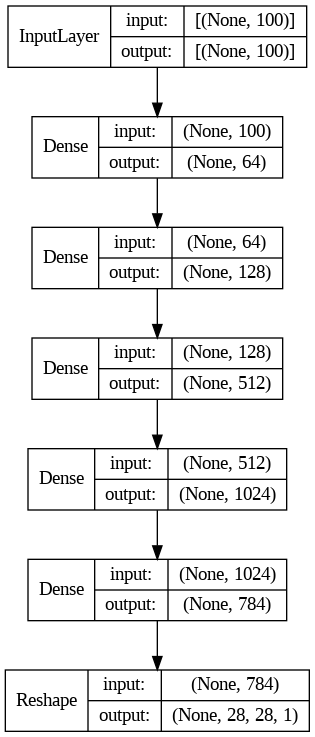

In [ ]:
generator=create_generator()
plot_model(generator,show_shapes=True,show_layer_names=False)

Hacemos una función para crear el discriminador.

In [ ]:
def create_discriminator():
  input=Input(shape=(28,28,1))

  x=Flatten()(input)

  x=Dense(512,activation='relu')(x)
  x=Dense(128,activation='relu')(x)
  x=Dense(64,activation='relu')(x)

  output=Dense(1,activation='sigmoid')(x)

  discriminator=Model(input,output)
  return discriminator

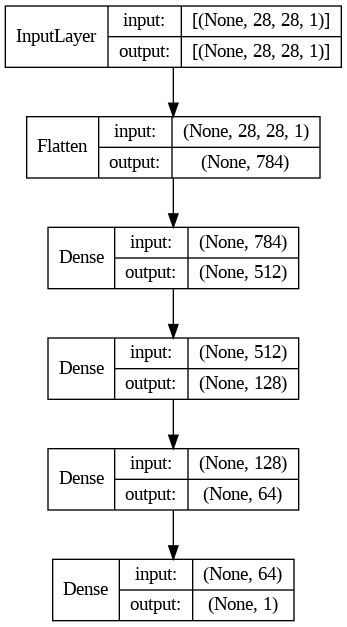

In [ ]:
discriminator=create_discriminator()
plot_model(discriminator,show_shapes=True,show_layer_names=False)

In [ ]:
discriminator.compile(loss='binary_crossentropy',metrics=['accuracy'])
discriminator.trainable=False

z=Input(shape=(100,))
img=generator(z)
validity=discriminator(img)

combined=Model(z,validity)
combined.compile(loss='binary_crossentropy')

In [ ]:

def train(x_train,generator,discriminator,combined,epochs,batch_size=32,sample_interval=100):
  valid=np.ones((batch_size,1))
  fake=np.zeros((batch_size,1))

  for epoch in range(epochs):
    print("Epoch: ",epoch)

    for batch in range(int(len(X_train)/batch_size)):
      noise=np.random.normal(0,1,(batch_size,100))
      gen_imgs=generator.predict(noise)
      imgs=X_train[batch*batch_size :(batch+1)*batch_size]

      d_loss_real=discriminator.train_on_batch(imgs,valid)
      d_loss_fake=discriminator.train_on_batch(gen_imgs,fake)

      d_loss=0.5*np.add(d_loss_real,d_loss_fake)

      noise=np.random.normal(0,1,(batch_size,100))
      g_loss=combined.train_on_batch(noise,valid)

      if batch%50==0:
        print("D loss: ",d_loss[0])
        D_LOSS.append(d_loss[0])
        print("D accuracy: ",d_loss[1])
        print("G loss: ",g_loss)
        G_LOSS.append(g_loss)

        print("\n")

      if batch%sample_interval==0:
        sample_images(gen_imgs,imgs)

In [ ]:
def sample_images(gen_imgs,imgs):
  plt.rcParams['figure.figsize']=[15,5]
  fig,axs=plt.subplots(2,5)
  for i in range(5):
    axs[0,i].imshow(gen_imgs[i,:,:,0],cmap='Greys')
    axs[0,i].axis('off')
  for i in range(5):
    axs[1,i].imshow(imgs[i,:,:,0],cmap='Greys')
    axs[1,i].axis('off')
  plt.show()
  plt.close()

Epoch:  0
1/1 [==============================] - 0s 73ms/step
D loss:  0.8989671170711517
D accuracy:  0.328125
G loss:  2.605713129043579




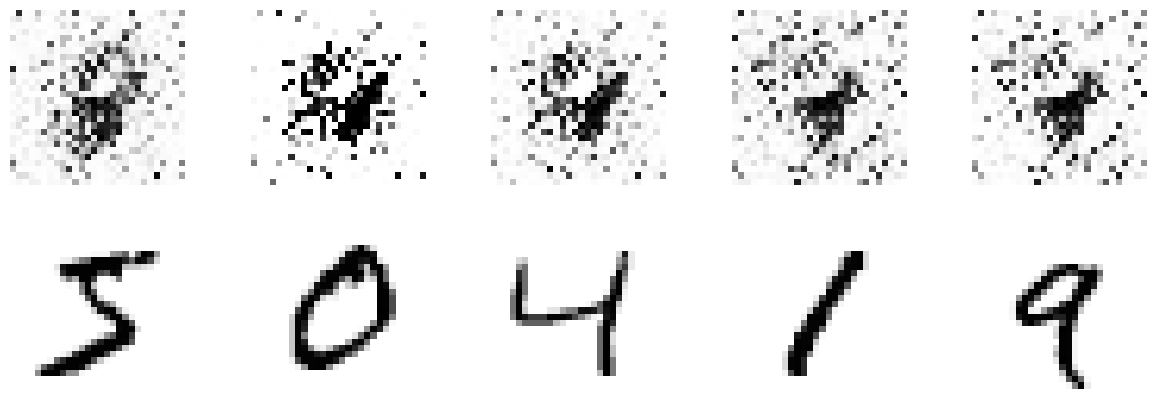

1/1 [==============================] - 0s 19ms/step
D loss:  1.074072953313589
D accuracy:  0.703125
G loss:  3.8060238361358643


1/1 [==============================] - 0s 15ms/step
D loss:  1.1741678714752197
D accuracy:  0.546875
G loss:  4.34405517578125




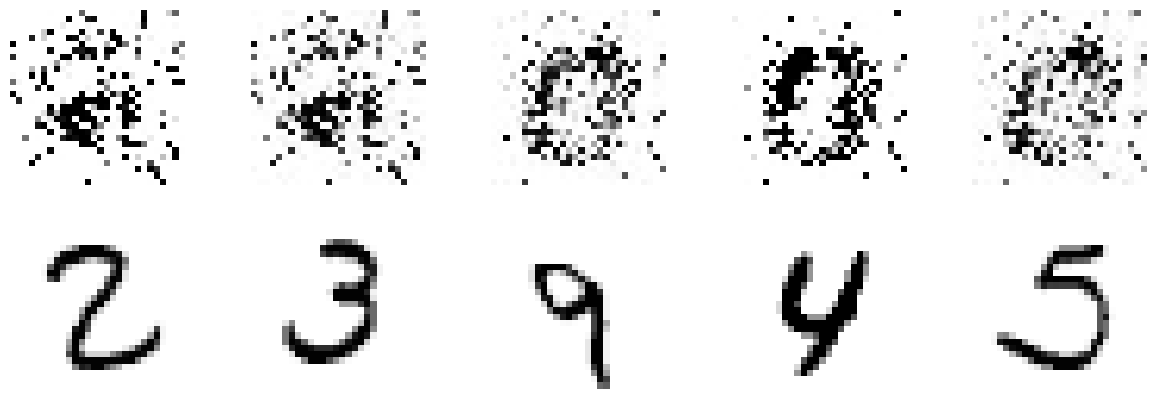

1/1 [==============================] - 0s 37ms/step
D loss:  0.009861813858151436
D accuracy:  1.0
G loss:  4.44425630569458


1/1 [==============================] - 0s 20ms/step
D loss:  0.8087725639343262
D accuracy:  0.359375
G loss:  3.0002596378326416




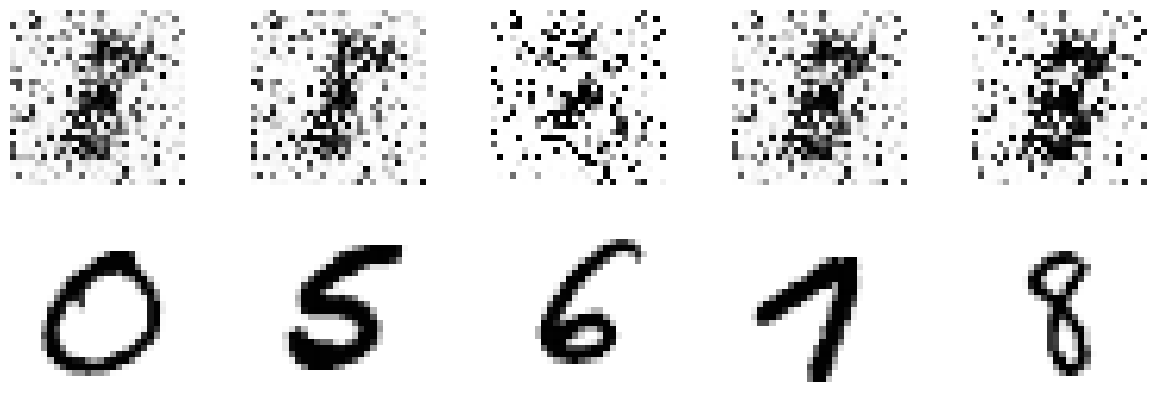

1/1 [==============================] - 0s 17ms/step
D loss:  0.11980648338794708
D accuracy:  0.953125
G loss:  3.025413990020752


1/1 [==============================] - 0s 25ms/step
D loss:  0.6791388392448425
D accuracy:  0.59375
G loss:  1.7328829765319824




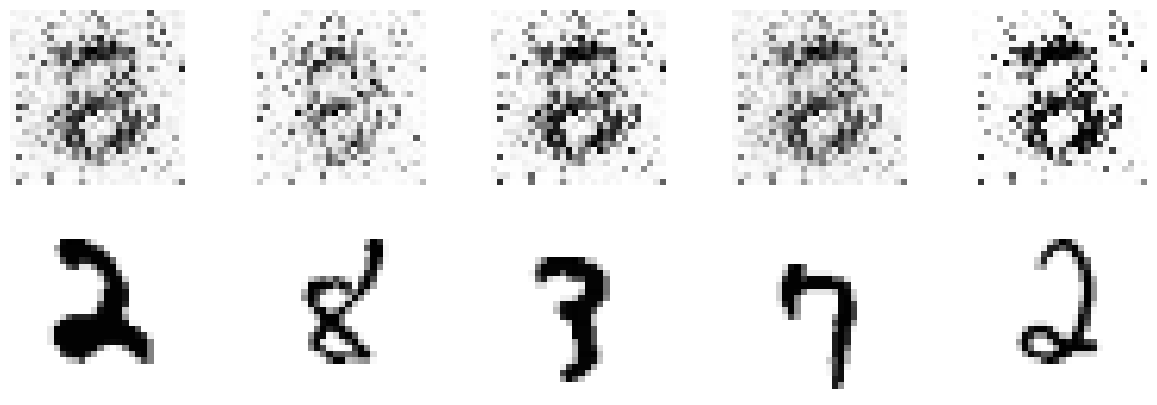

1/1 [==============================] - 0s 22ms/step
D loss:  0.5879252552986145
D accuracy:  0.765625
G loss:  1.8402276039123535


1/1 [==============================] - 0s 32ms/step
D loss:  0.38991160690784454
D accuracy:  0.90625
G loss:  2.256558418273926




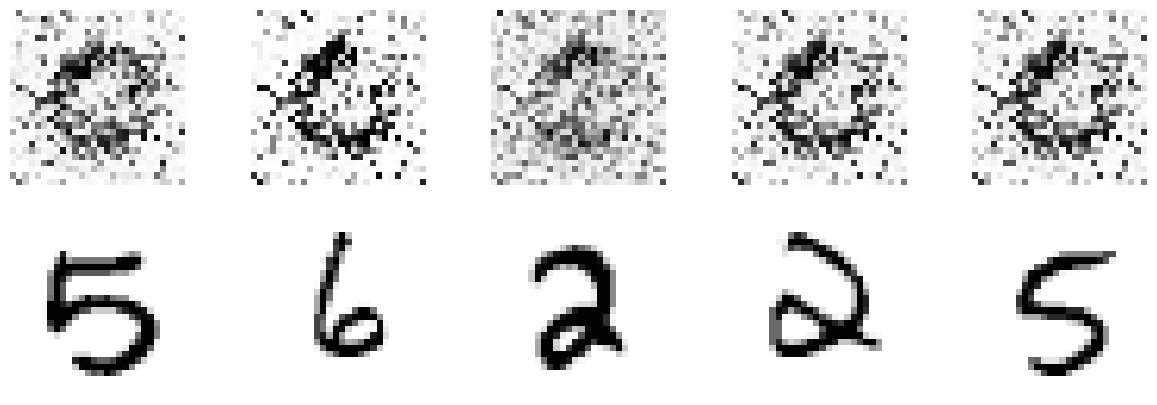

1/1 [==============================] - 0s 16ms/step
D loss:  0.720003068447113
D accuracy:  0.453125
G loss:  1.8465862274169922


1/1 [==============================] - 0s 20ms/step
D loss:  0.45349501073360443
D accuracy:  0.875
G loss:  2.6187191009521484




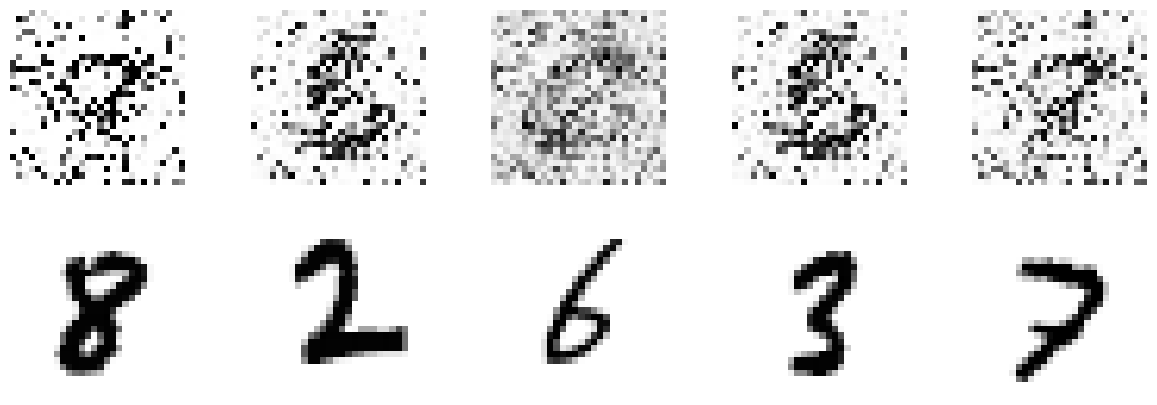

1/1 [==============================] - 0s 22ms/step
D loss:  0.9217204451560974
D accuracy:  0.515625
G loss:  3.050058603286743


1/1 [==============================] - 0s 38ms/step
D loss:  0.3045399161055684
D accuracy:  0.828125
G loss:  4.331745147705078




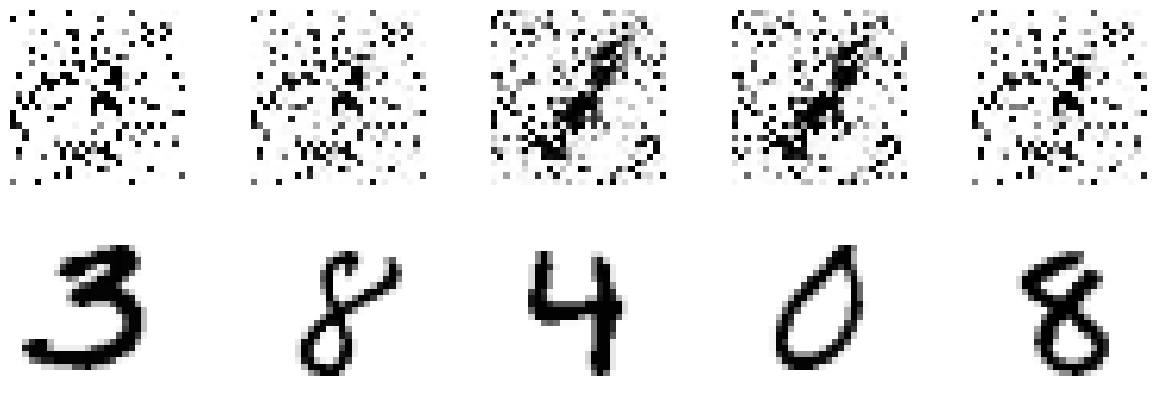

1/1 [==============================] - 0s 15ms/step
D loss:  0.8773222118616104
D accuracy:  0.640625
G loss:  3.1567773818969727


1/1 [==============================] - 0s 26ms/step
D loss:  0.3603620082139969
D accuracy:  0.875
G loss:  2.524723529815674




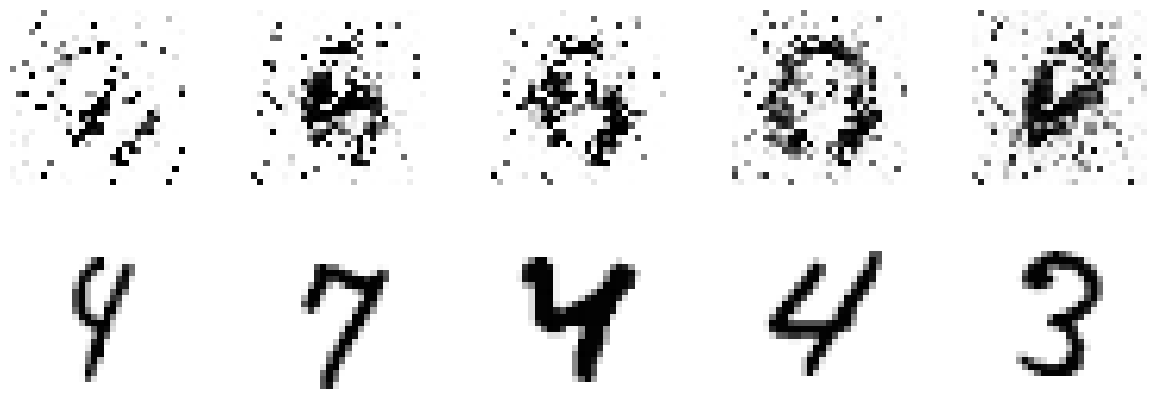

1/1 [==============================] - 0s 15ms/step
D loss:  0.4524824917316437
D accuracy:  0.78125
G loss:  2.948246955871582


1/1 [==============================] - 0s 23ms/step
D loss:  0.0011236257996642962
D accuracy:  1.0
G loss:  11.68698501586914




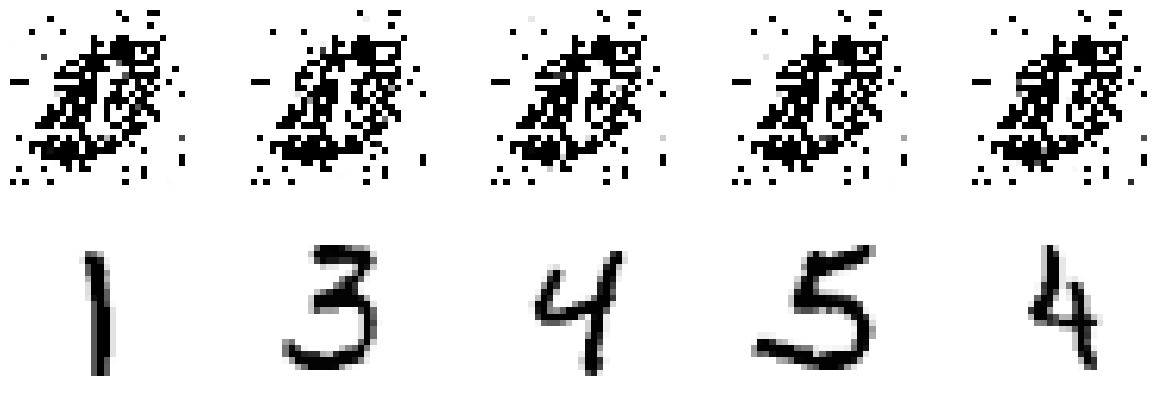

1/1 [==============================] - 0s 16ms/step
D loss:  7.81940588368002e-06
D accuracy:  1.0
G loss:  18.242534637451172


1/1 [==============================] - 0s 16ms/step
D loss:  0.0027953760535552874
D accuracy:  1.0
G loss:  16.523916244506836




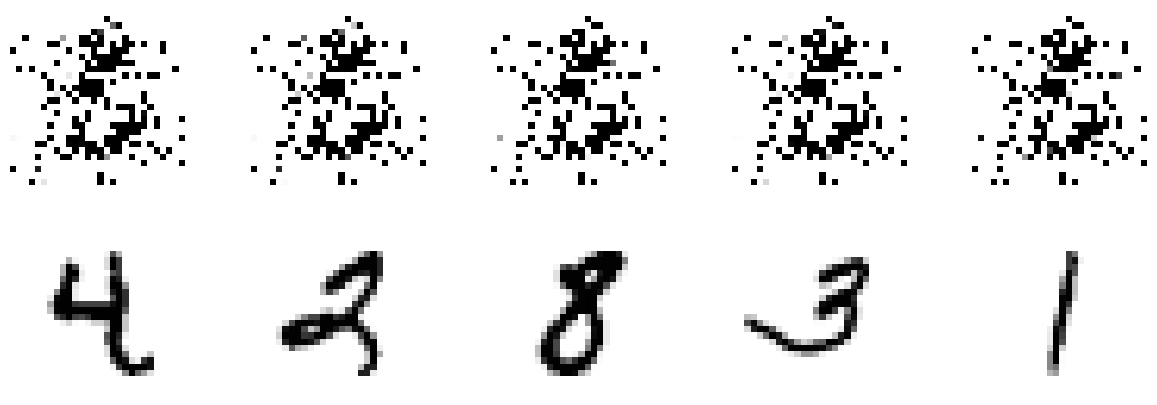

1/1 [==============================] - 0s 19ms/step
D loss:  0.0010365542304662245
D accuracy:  1.0
G loss:  19.593402862548828


1/1 [==============================] - 0s 16ms/step
D loss:  0.04782110289670527
D accuracy:  0.96875
G loss:  6.081107139587402




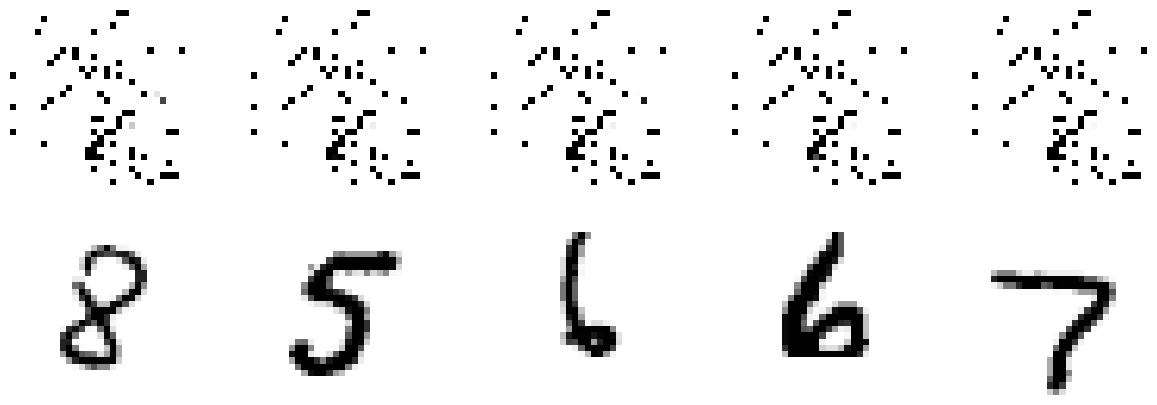

1/1 [==============================] - 0s 21ms/step
D loss:  0.2468223380856216
D accuracy:  0.921875
G loss:  11.719533920288086


1/1 [==============================] - 0s 27ms/step
D loss:  0.02387758484110236
D accuracy:  1.0
G loss:  6.818732261657715




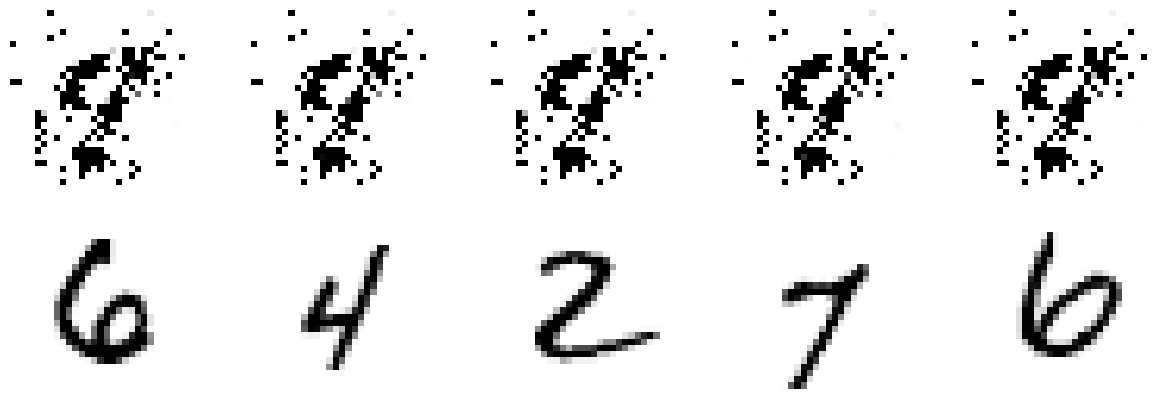

1/1 [==============================] - 0s 15ms/step
D loss:  0.0006506900463136844
D accuracy:  1.0
G loss:  6.933042526245117


1/1 [==============================] - 0s 16ms/step
D loss:  0.04083913371141534
D accuracy:  0.984375
G loss:  6.986565113067627




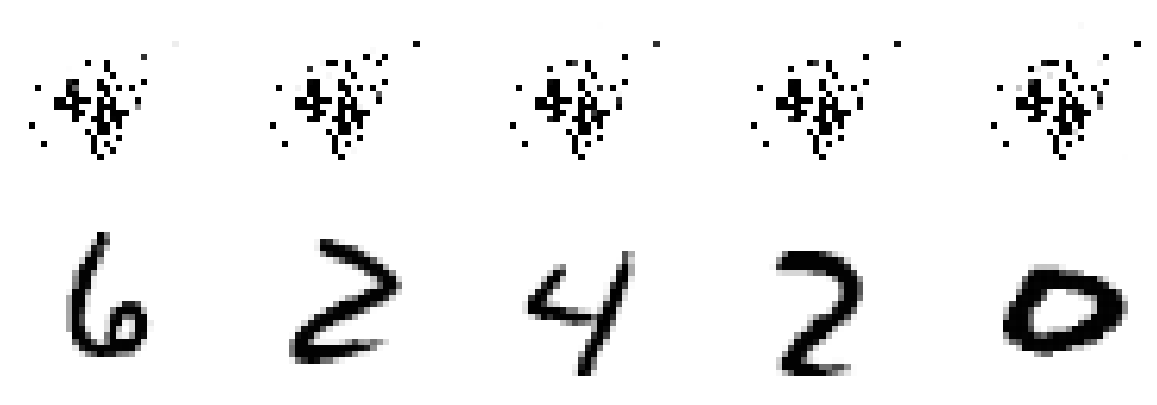

1/1 [==============================] - 0s 17ms/step
D loss:  0.0016823189216665924
D accuracy:  1.0
G loss:  13.032930374145508


1/1 [==============================] - 0s 16ms/step
D loss:  9.867710650723893e-05
D accuracy:  1.0
G loss:  9.037586212158203




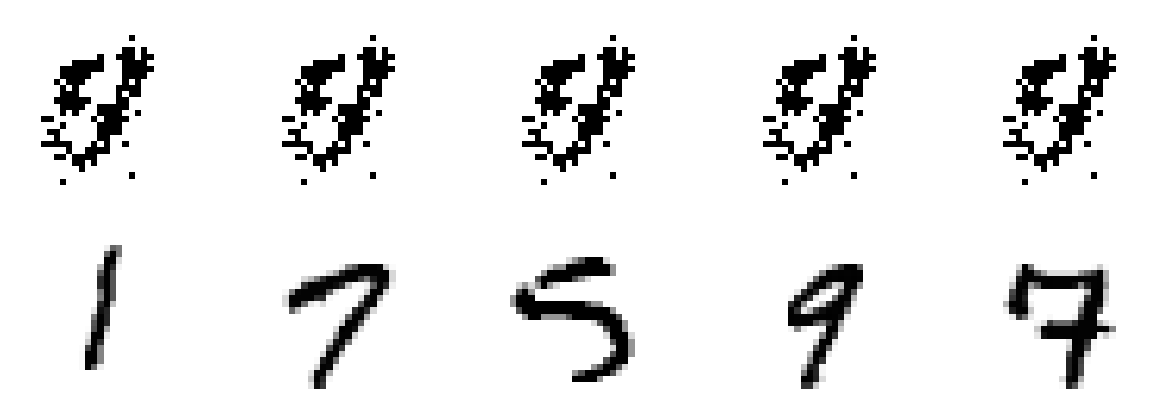

1/1 [==============================] - 0s 22ms/step
D loss:  7.744603408355033e-06
D accuracy:  1.0
G loss:  11.791746139526367


1/1 [==============================] - 0s 17ms/step
D loss:  4.0606597696779545e-05
D accuracy:  1.0
G loss:  16.233692169189453




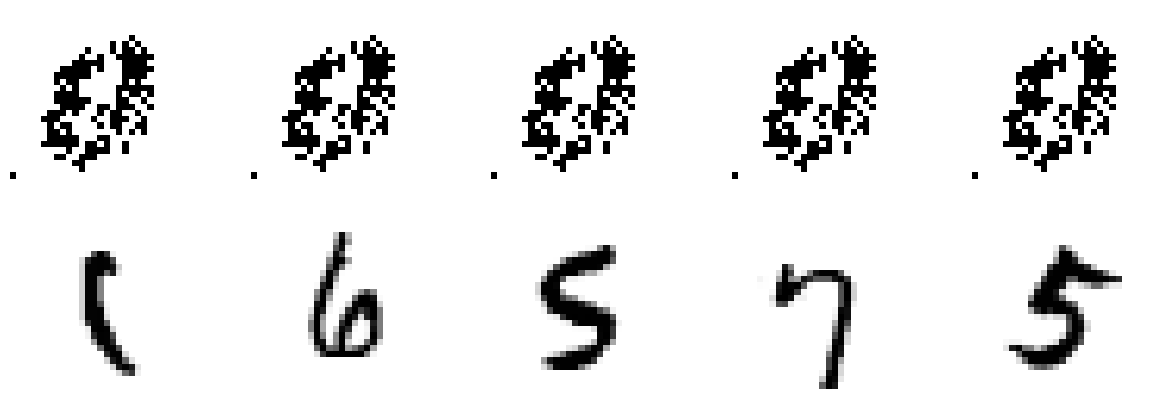

1/1 [==============================] - 0s 16ms/step
D loss:  0.020353393141704146
D accuracy:  0.984375
G loss:  12.32286548614502


1/1 [==============================] - 0s 15ms/step
D loss:  0.00010911656181633589
D accuracy:  1.0
G loss:  8.639742851257324




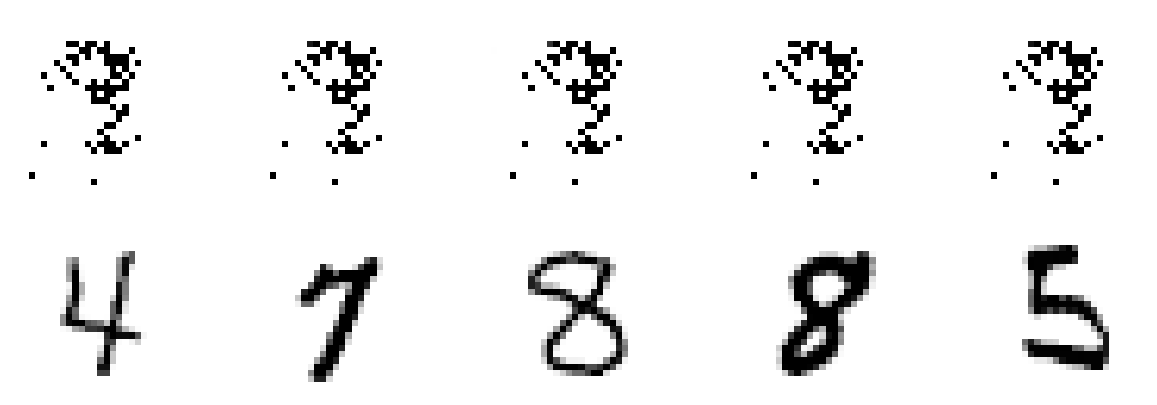

1/1 [==============================] - 0s 15ms/step
D loss:  0.0003809297049883753
D accuracy:  1.0
G loss:  8.195383071899414


1/1 [==============================] - 0s 19ms/step
D loss:  1.2610436592730423e-05
D accuracy:  1.0
G loss:  18.421829223632812




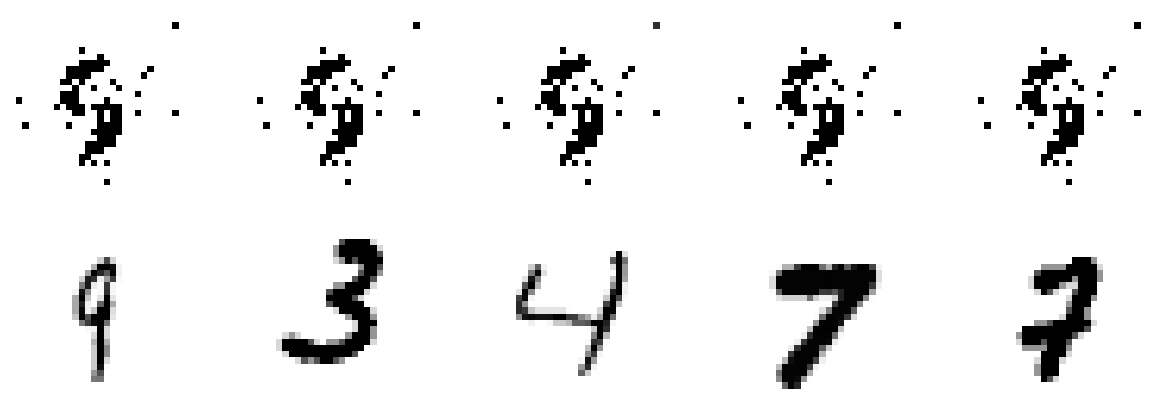

1/1 [==============================] - 0s 25ms/step
D loss:  2.9203938680666397e-06
D accuracy:  1.0
G loss:  16.029132843017578


1/1 [==============================] - 0s 15ms/step
D loss:  4.43520592246496e-06
D accuracy:  1.0
G loss:  11.811811447143555




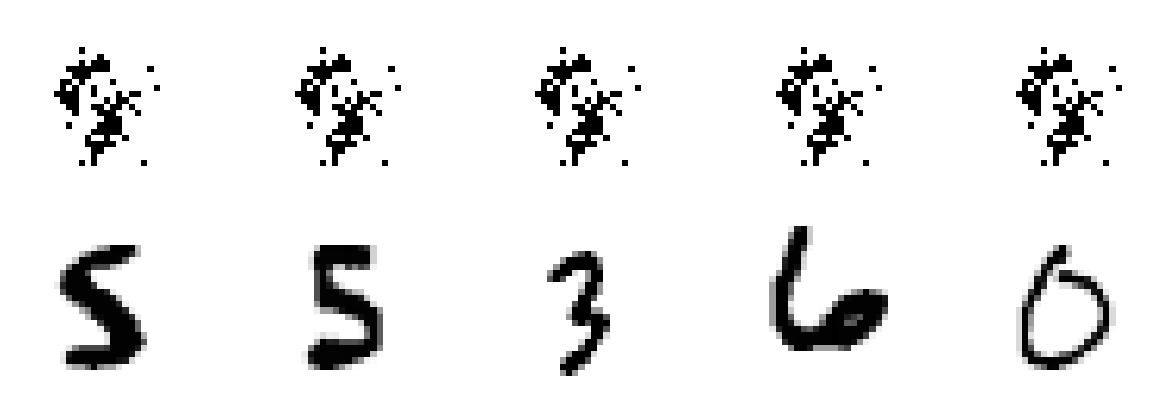

1/1 [==============================] - 0s 18ms/step
D loss:  2.8928425251706358e-05
D accuracy:  1.0
G loss:  9.811286926269531


1/1 [==============================] - 0s 22ms/step
D loss:  1.2983087196773098e-05
D accuracy:  1.0
G loss:  10.643377304077148




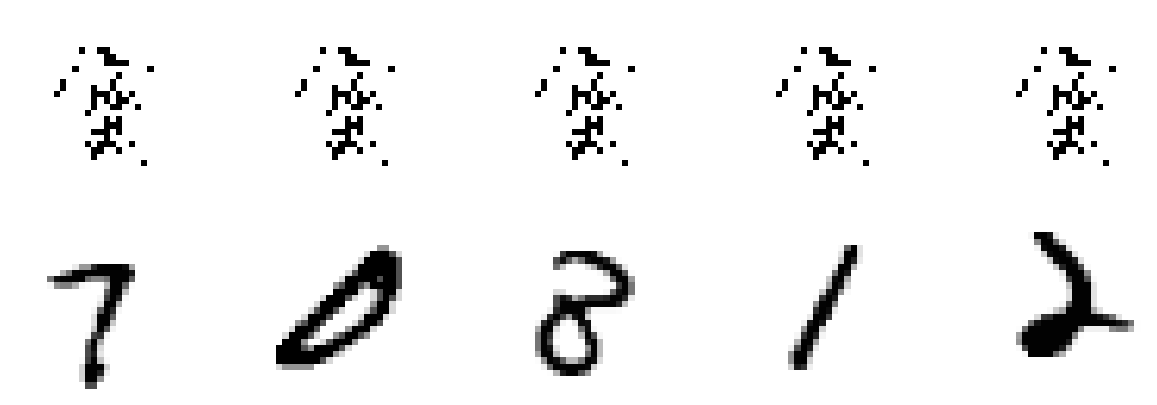

1/1 [==============================] - 0s 17ms/step
D loss:  6.331806672865703e-07
D accuracy:  1.0
G loss:  13.63884449005127


1/1 [==============================] - 0s 18ms/step
Epoch:  1
1/1 [==============================] - 0s 15ms/step
D loss:  3.3298346625576514e-06
D accuracy:  1.0
G loss:  12.410770416259766




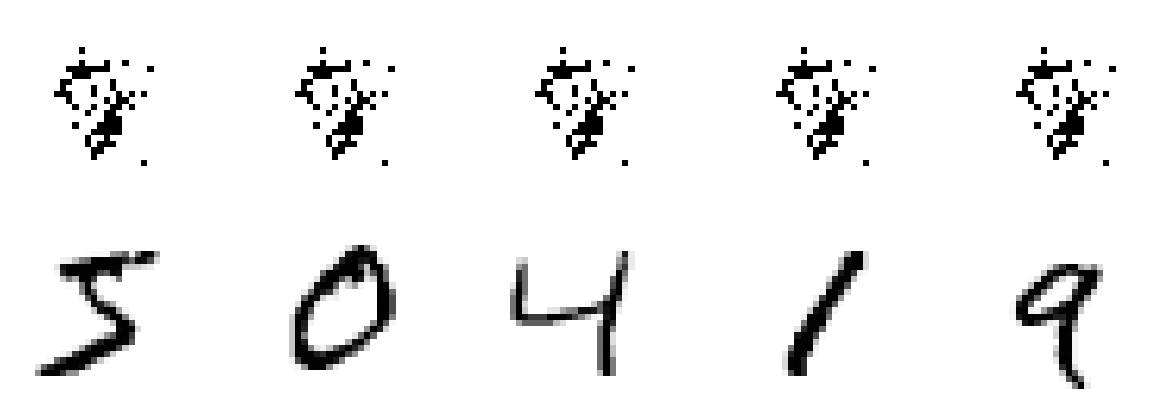

1/1 [==============================] - 0s 17ms/step
D loss:  4.461933895072434e-05
D accuracy:  1.0
G loss:  12.653064727783203


1/1 [==============================] - 0s 18ms/step
D loss:  4.6871791922420414e-05
D accuracy:  1.0
G loss:  9.840420722961426




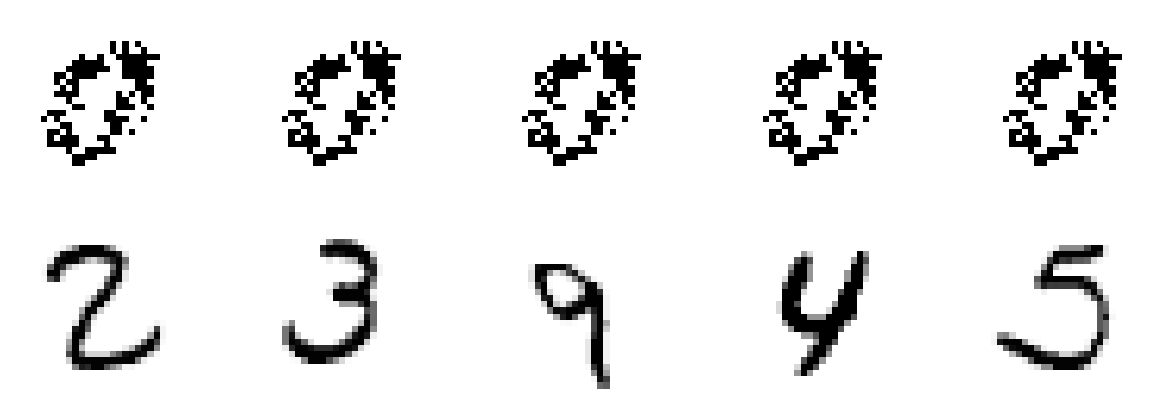

1/1 [==============================] - 0s 20ms/step
D loss:  1.3845857800148391e-11
D accuracy:  1.0
G loss:  32.4747314453125


1/1 [==============================] - 0s 15ms/step
D loss:  5.51027090055416e-07
D accuracy:  1.0
G loss:  13.755105972290039




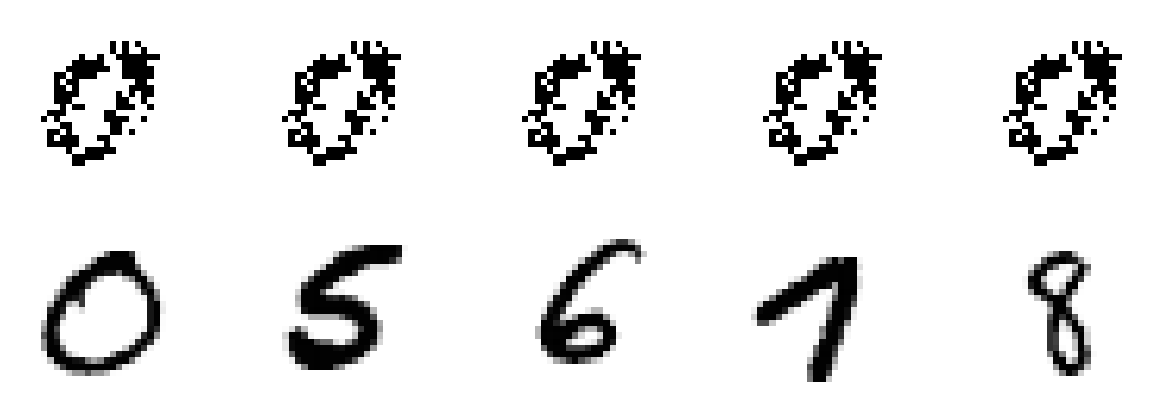

1/1 [==============================] - 0s 17ms/step
D loss:  2.4699218426505604e-07
D accuracy:  1.0
G loss:  14.55325698852539


1/1 [==============================] - 0s 18ms/step
D loss:  9.361743332653763e-08
D accuracy:  1.0
G loss:  15.503254890441895




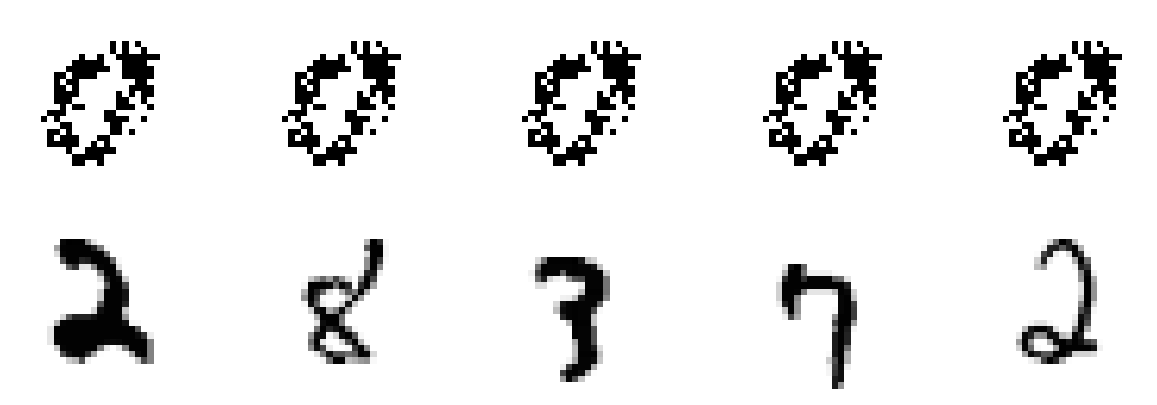

1/1 [==============================] - 0s 27ms/step
D loss:  5.8860784700517315e-08
D accuracy:  1.0
G loss:  15.96211051940918


1/1 [==============================] - 0s 24ms/step
D loss:  4.329277562815474e-08
D accuracy:  1.0
G loss:  16.267410278320312




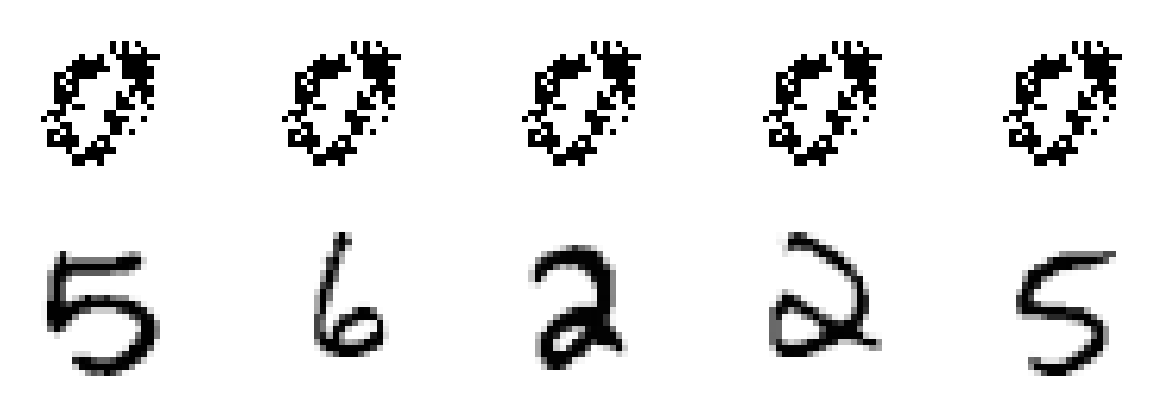

1/1 [==============================] - 0s 16ms/step
D loss:  1.808645066651767e-07
D accuracy:  1.0
G loss:  14.858146667480469


1/1 [==============================] - 0s 22ms/step
D loss:  9.469141565460389e-08
D accuracy:  1.0
G loss:  15.492255210876465




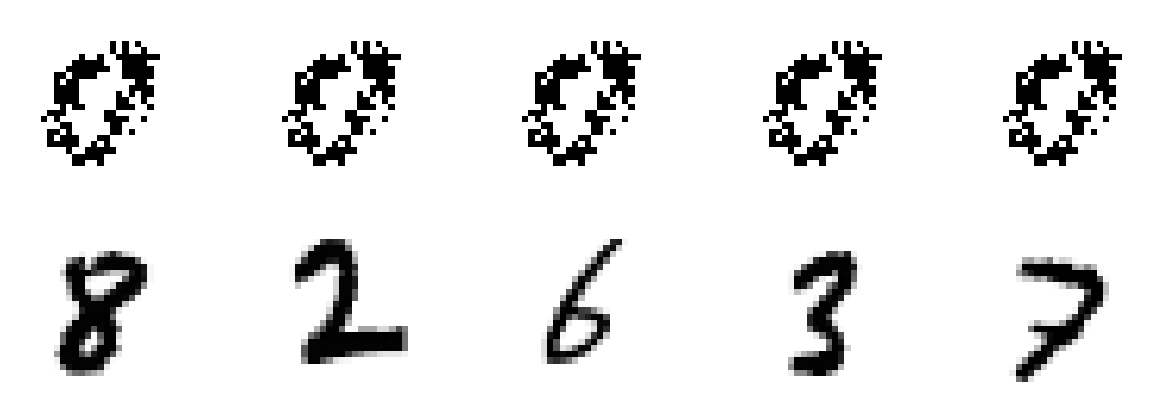

1/1 [==============================] - 0s 21ms/step
D loss:  5.779006226336314e-08
D accuracy:  1.0
G loss:  15.981453895568848


1/1 [==============================] - 0s 15ms/step
D loss:  4.812232345748609e-08
D accuracy:  1.0
G loss:  16.162269592285156




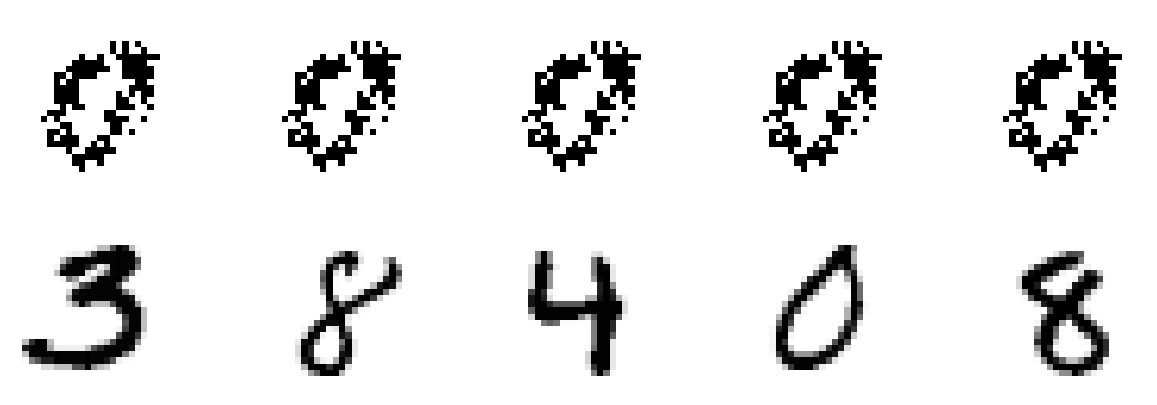

1/1 [==============================] - 0s 23ms/step
D loss:  3.7151389475215124e-08
D accuracy:  1.0
G loss:  16.41986083984375


1/1 [==============================] - 0s 18ms/step
D loss:  3.024555502227921e-08
D accuracy:  1.0
G loss:  16.62447738647461




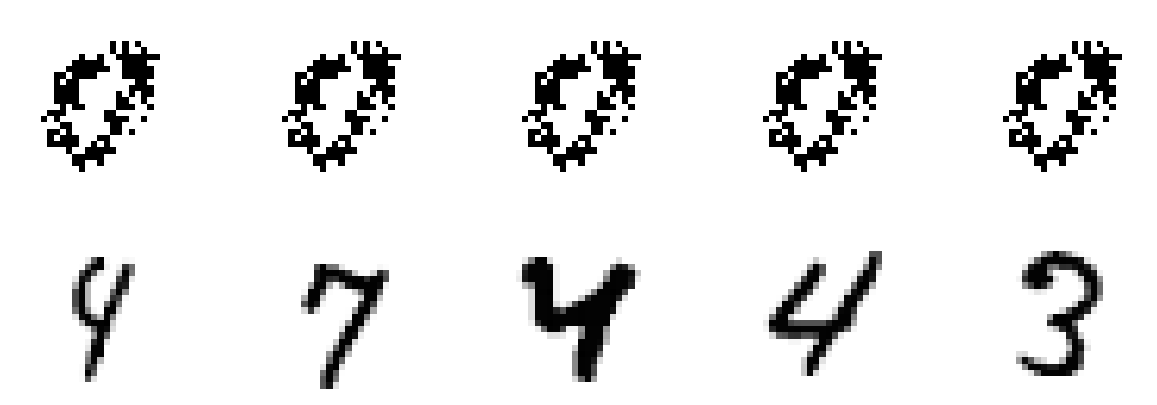

1/1 [==============================] - 0s 16ms/step
D loss:  3.814880504171535e-08
D accuracy:  1.0
G loss:  16.39366912841797


1/1 [==============================] - 0s 23ms/step
D loss:  7.111632983891614e-11
D accuracy:  1.0
G loss:  22.960792541503906




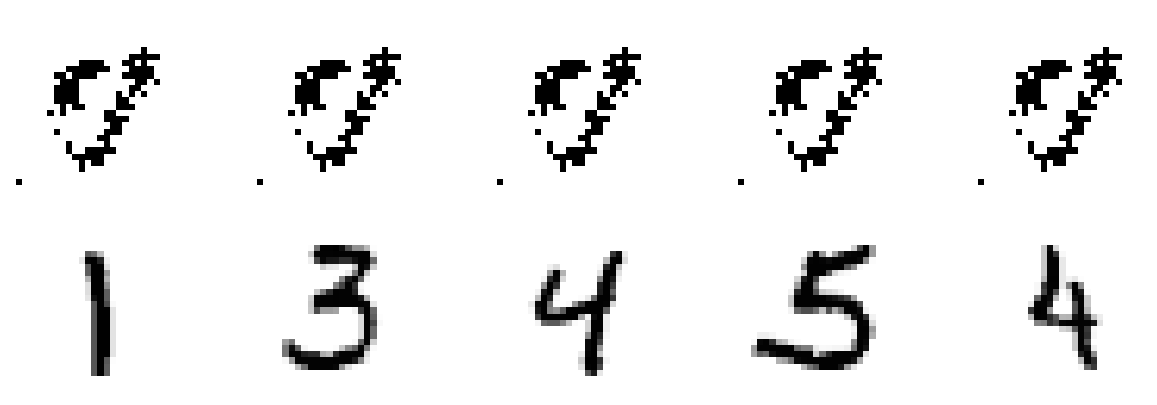

1/1 [==============================] - 0s 16ms/step
D loss:  6.831740393763762e-06
D accuracy:  1.0
G loss:  11.313901901245117


1/1 [==============================] - 0s 17ms/step
D loss:  2.4375685352823195e-07
D accuracy:  1.0
G loss:  14.576905250549316




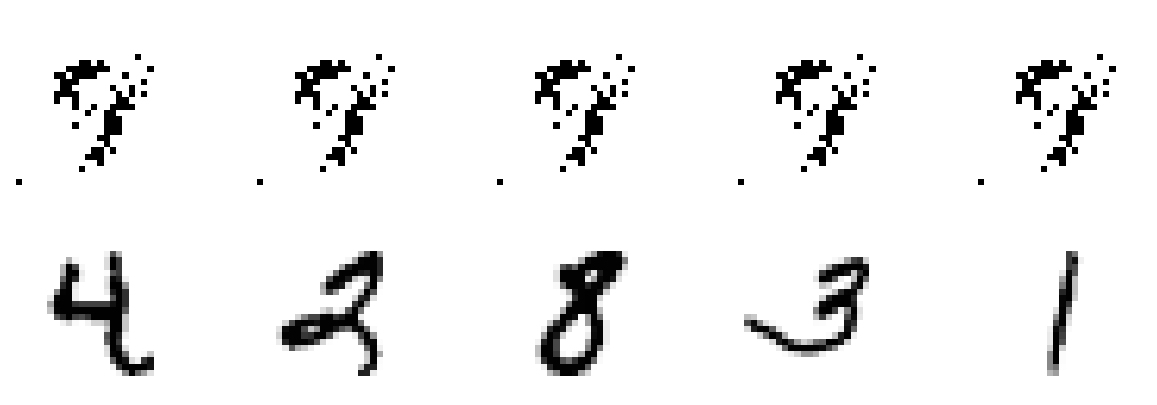

1/1 [==============================] - 0s 18ms/step
D loss:  1.5846680697370537e-10
D accuracy:  1.0
G loss:  21.872390747070312


1/1 [==============================] - 0s 17ms/step
D loss:  9.877910656097555e-09
D accuracy:  1.0
G loss:  20.184850692749023




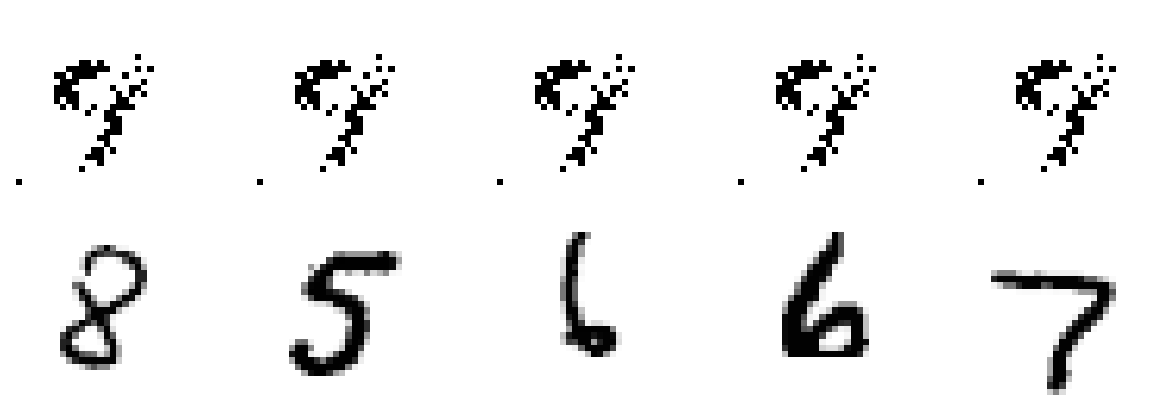

1/1 [==============================] - 0s 16ms/step
D loss:  8.886269498020738e-10
D accuracy:  1.0
G loss:  20.175334930419922


1/1 [==============================] - 0s 17ms/step
D loss:  4.866048231022546e-09
D accuracy:  1.0
G loss:  20.155099868774414




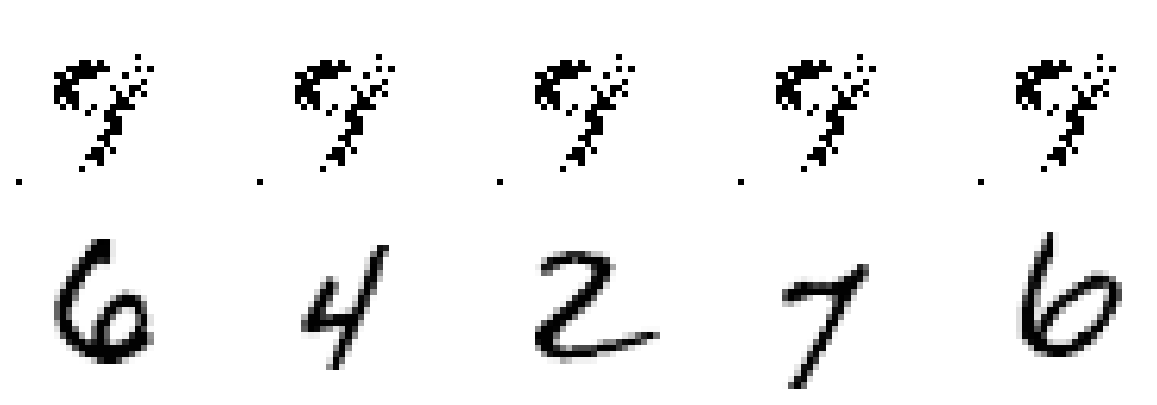

1/1 [==============================] - 0s 16ms/step
D loss:  1.0312335477734302e-09
D accuracy:  1.0
G loss:  19.999753952026367


1/1 [==============================] - 0s 18ms/step
D loss:  1.52305490441762e-09
D accuracy:  1.0
G loss:  20.006763458251953




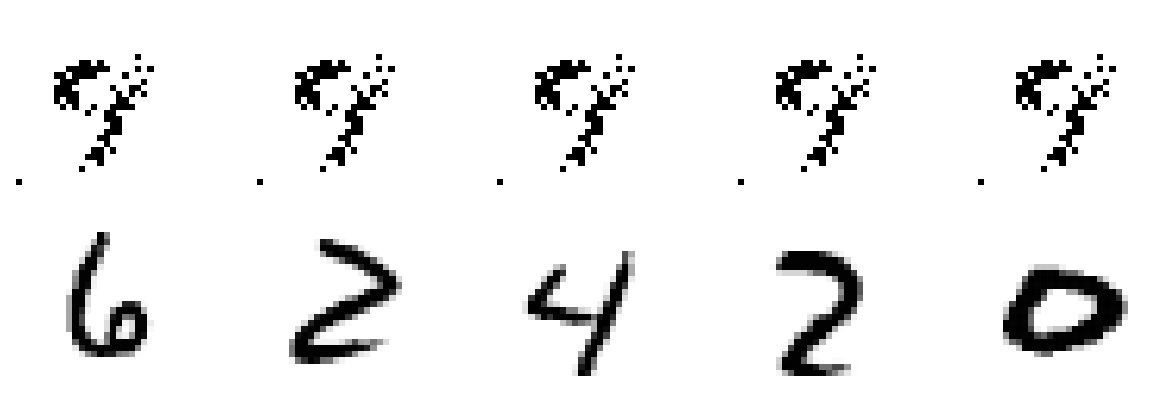

1/1 [==============================] - 0s 17ms/step
D loss:  1.3482317923760659e-09
D accuracy:  1.0
G loss:  19.732032775878906


1/1 [==============================] - 0s 15ms/step
D loss:  1.3623169743306874e-09
D accuracy:  1.0
G loss:  19.721139907836914




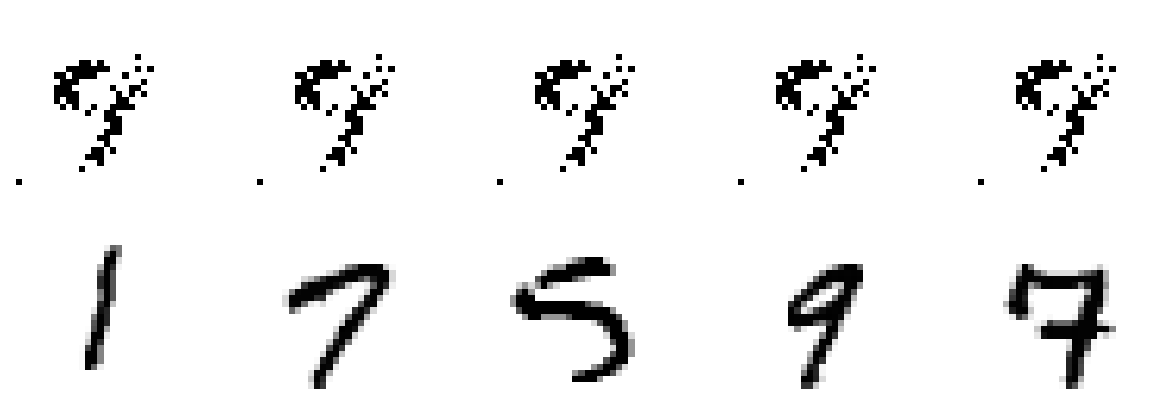

1/1 [==============================] - 0s 28ms/step
D loss:  3.200685272375381e-09
D accuracy:  1.0
G loss:  19.731170654296875


1/1 [==============================] - 0s 16ms/step
D loss:  1.3432981521826343e-09
D accuracy:  1.0
G loss:  19.737159729003906




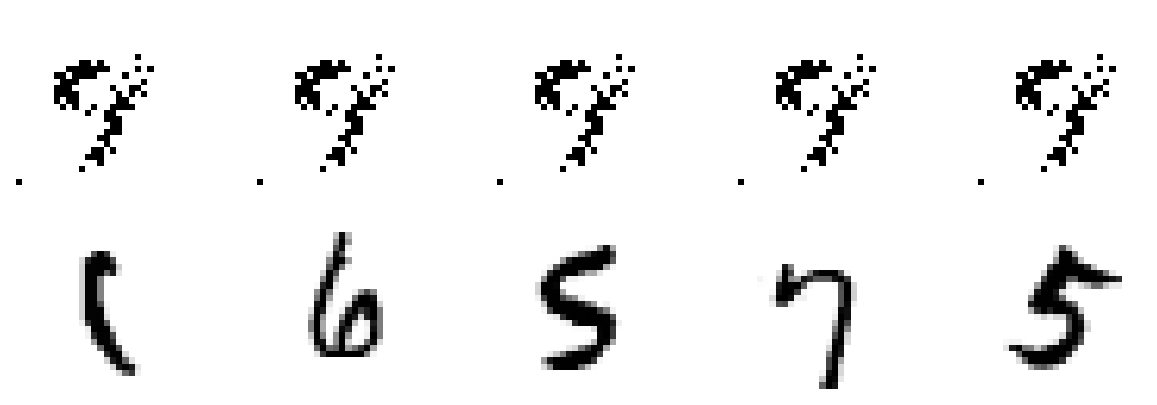

1/1 [==============================] - 0s 15ms/step
D loss:  1.921782742341209e-09
D accuracy:  1.0
G loss:  19.377174377441406


1/1 [==============================] - 0s 23ms/step
D loss:  1.8928401273112137e-09
D accuracy:  1.0
G loss:  19.392345428466797




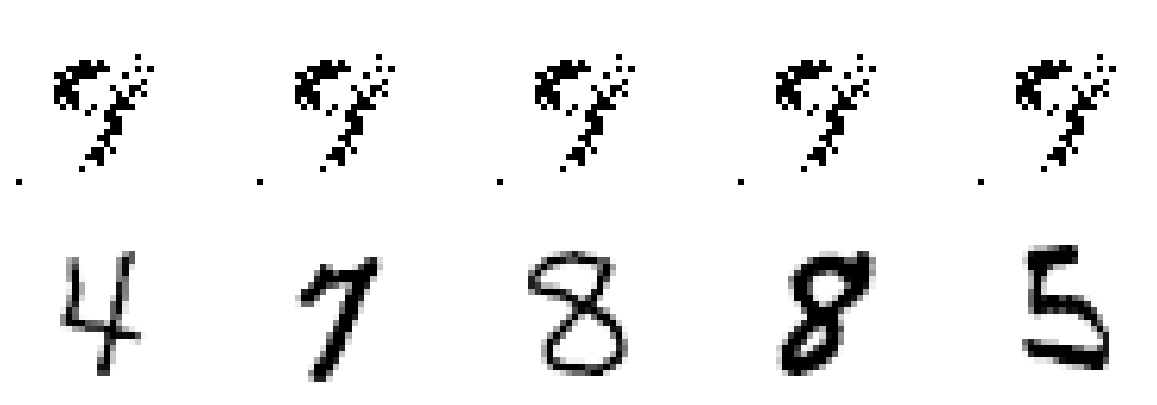

1/1 [==============================] - 0s 18ms/step
D loss:  1.9741623408678893e-09
D accuracy:  1.0
G loss:  19.35028648376465


1/1 [==============================] - 0s 16ms/step
D loss:  2.0514321945286553e-09
D accuracy:  1.0
G loss:  19.311912536621094




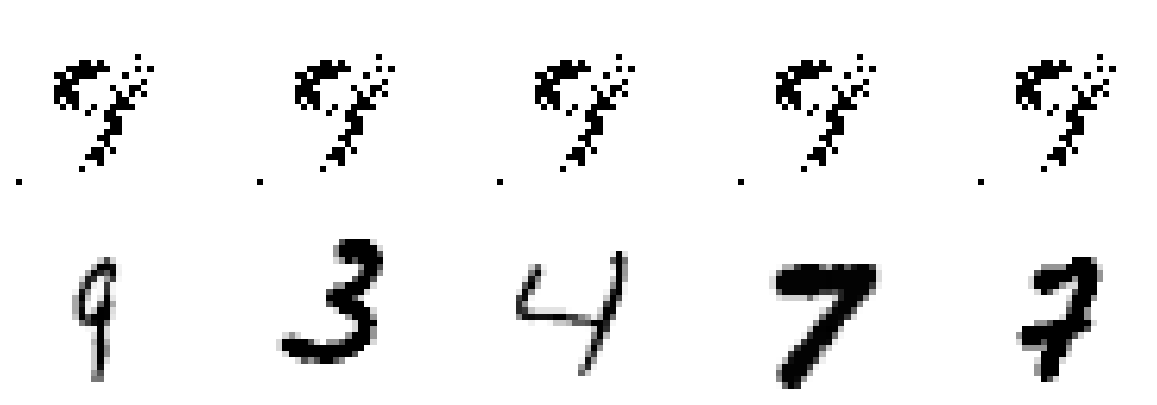

1/1 [==============================] - 0s 25ms/step
D loss:  2.030381575931719e-09
D accuracy:  1.0
G loss:  19.322235107421875


1/1 [==============================] - 0s 15ms/step
D loss:  2.0099740938115602e-09
D accuracy:  1.0
G loss:  19.332326889038086




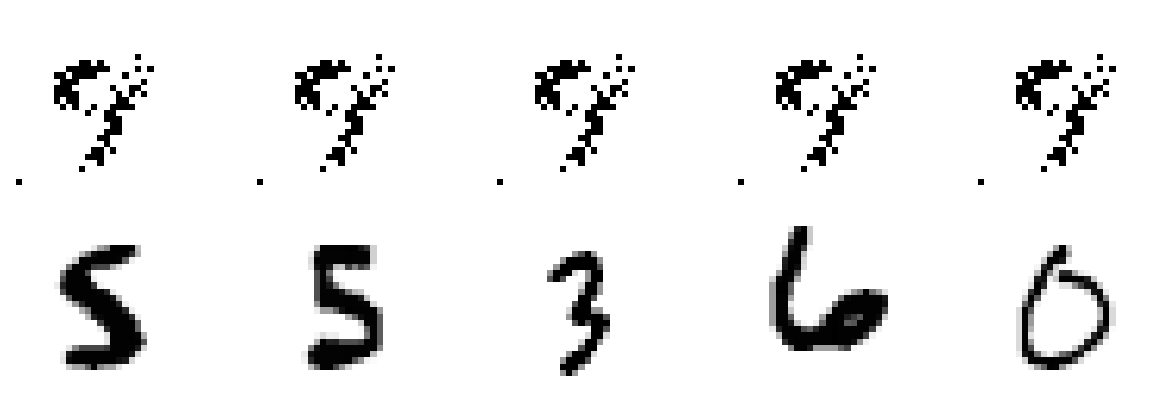

1/1 [==============================] - 0s 15ms/step
D loss:  2.176204924597691e-09
D accuracy:  1.0
G loss:  19.321182250976562


1/1 [==============================] - 0s 24ms/step
D loss:  2.20335265671231e-09
D accuracy:  1.0
G loss:  19.240686416625977




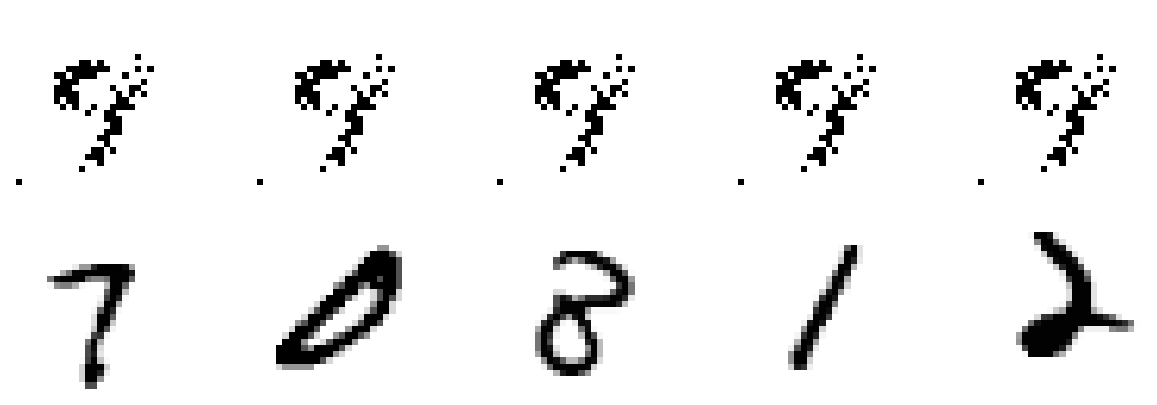

1/1 [==============================] - 0s 15ms/step
D loss:  4.372630257876153e-09
D accuracy:  1.0
G loss:  19.133264541625977


1/1 [==============================] - 0s 18ms/step
Epoch:  2
1/1 [==============================] - 0s 15ms/step
D loss:  2.4339525950299873e-09
D accuracy:  1.0
G loss:  19.141010284423828




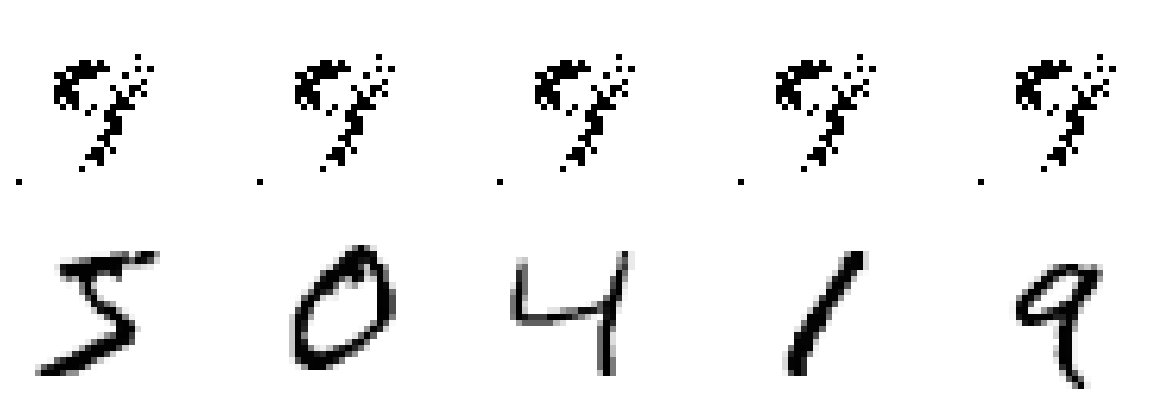

1/1 [==============================] - 0s 22ms/step
D loss:  2.4036856283594227e-09
D accuracy:  1.0
G loss:  19.154117584228516


1/1 [==============================] - 0s 15ms/step
D loss:  2.35878034491859e-09
D accuracy:  1.0
G loss:  19.172367095947266




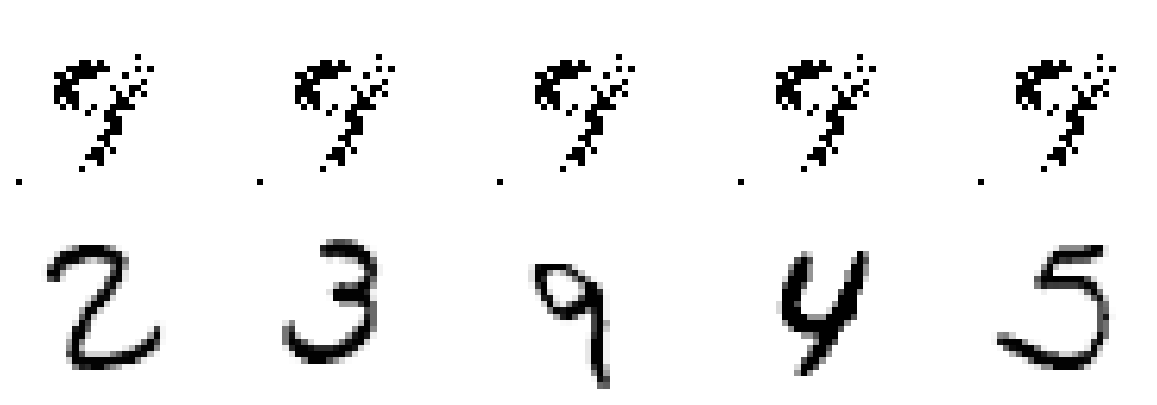

1/1 [==============================] - 0s 17ms/step
D loss:  2.3411031025201934e-09
D accuracy:  1.0
G loss:  19.179885864257812


1/1 [==============================] - 0s 23ms/step
D loss:  2.5269887568426686e-09
D accuracy:  1.0
G loss:  19.103511810302734




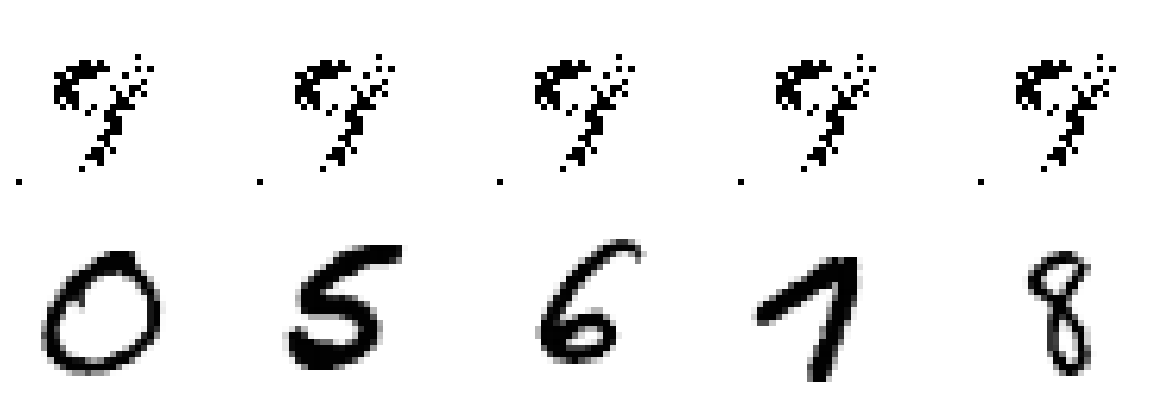

1/1 [==============================] - 0s 19ms/step
D loss:  2.478185557280274e-09
D accuracy:  1.0
G loss:  19.123014450073242


1/1 [==============================] - 0s 19ms/step
D loss:  2.428879262894899e-09
D accuracy:  1.0
G loss:  19.143110275268555




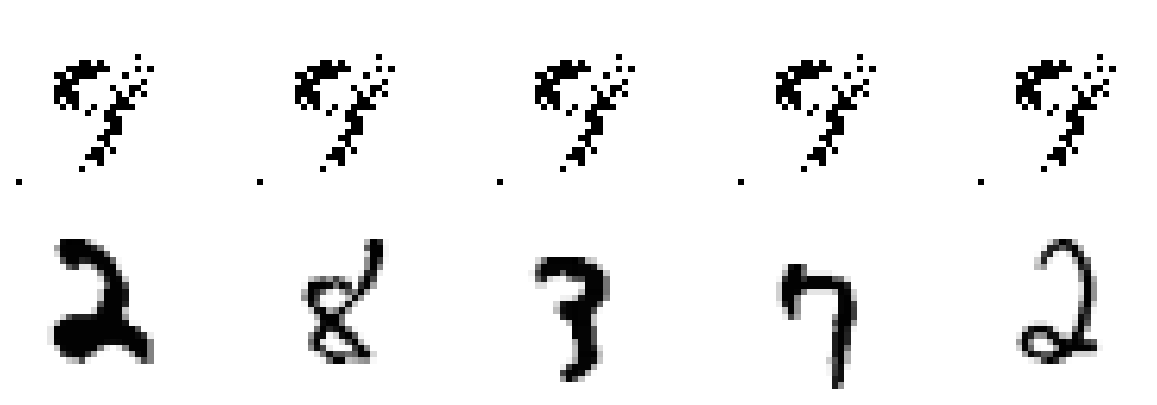

1/1 [==============================] - 0s 28ms/step
D loss:  5.425031505620903e-09
D accuracy:  1.0
G loss:  18.341659545898438


1/1 [==============================] - 0s 18ms/step
D loss:  5.163211792278225e-09
D accuracy:  1.0
G loss:  18.389495849609375




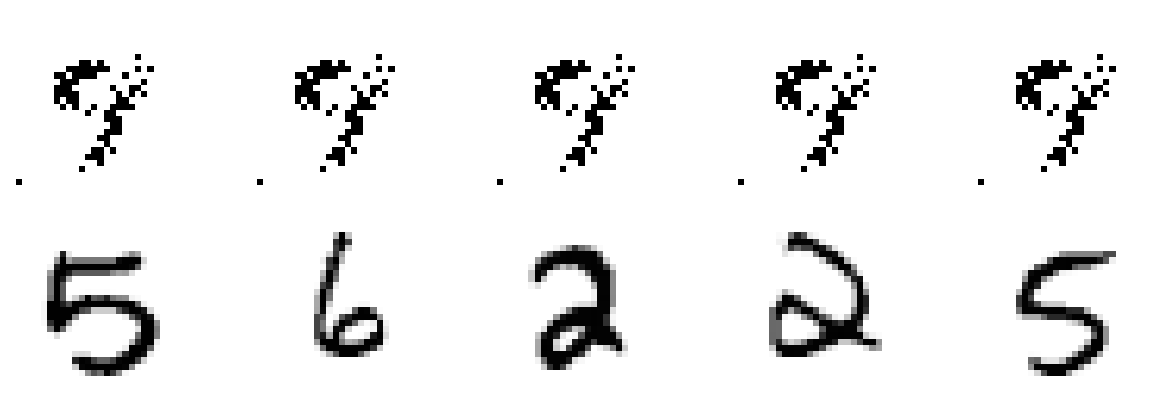

1/1 [==============================] - 0s 16ms/step
D loss:  4.936763009425665e-09
D accuracy:  1.0
G loss:  18.43430519104004


1/1 [==============================] - 0s 17ms/step
D loss:  4.740409392419541e-09
D accuracy:  1.0
G loss:  18.474853515625




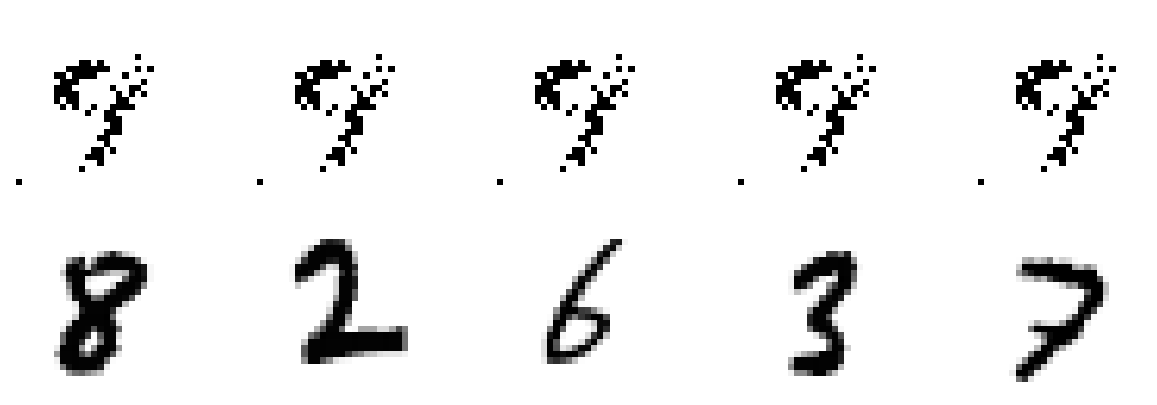

1/1 [==============================] - 0s 15ms/step
D loss:  4.811549145222749e-09
D accuracy:  1.0
G loss:  18.49654769897461


1/1 [==============================] - 0s 24ms/step
D loss:  4.452845761280298e-09
D accuracy:  1.0
G loss:  18.537389755249023




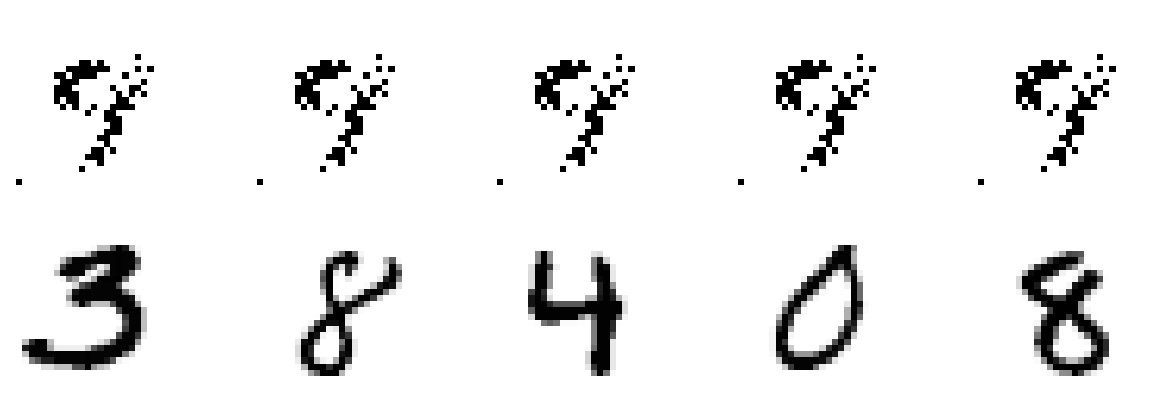

1/1 [==============================] - 0s 15ms/step
D loss:  4.279777980548416e-09
D accuracy:  1.0
G loss:  18.576995849609375


1/1 [==============================] - 0s 15ms/step


KeyboardInterrupt: ignored

In [ ]:
D_LOSS=[]
G_LOSS=[]
train(X_train,generator,discriminator,combined,epochs=10,batch_size=32,sample_interval=100)

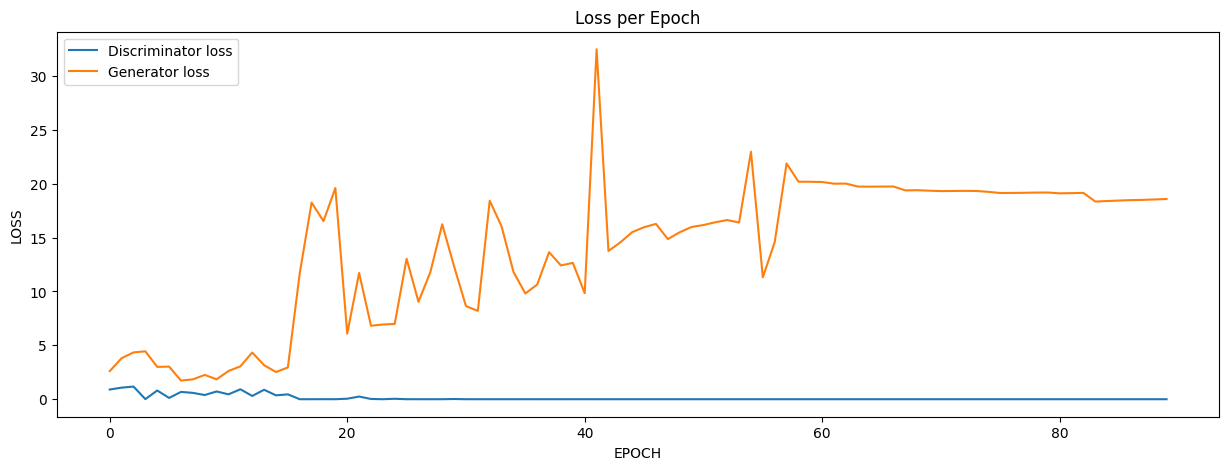

In [ ]:
plt.plot(D_LOSS)
plt.plot(G_LOSS)
plt.title('Loss per Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['Discriminator loss', 'Generator loss'], loc='upper left')
plt.show()

Observamos que la pérdida del discriminador obtiene valores constantes de 0 o nulos por lo que tenemos Gradient explosion en el modelo.

Para solucionar vamos a ir implementando distintas modificaciones al código.

##Kernel Regularizer

In [ ]:
from tensorflow.keras.regularizers import l1

In [ ]:
def create_generator():
  input=Input(shape=(100))
  x=Dense(64,activation='relu')(input)
  x=Dense(128,activation='relu')(x)
  x=Dense(512,activation='relu', kernel_regularizer=l1(0.01))(x)
  x=Dense(1024,activation='relu', kernel_regularizer=l1(0.01))(x)

  x=Dense(28*28,activation='tanh')(x)


  output=Reshape((28,28,1)) (x)
  generator=Model(input,output)
  return generator

In [ ]:
generator=create_generator()

In [ ]:
def create_discriminator():
  input=Input(shape=(28,28,1))

  x=Flatten()(input)

  x=Dense(512,activation='relu', kernel_regularizer=l1(0.01))(x)
  x=Dense(128,activation='relu')(x)
  x=Dense(64,activation='relu')(x)

  output=Dense(1,activation='sigmoid')(x)

  discriminator=Model(input,output)
  return discriminator

In [ ]:
discriminator=create_discriminator()

In [ ]:
discriminator.compile(loss='binary_crossentropy',metrics=['accuracy'])
discriminator.trainable=False

z=Input(shape=(100,))
img=generator(z)
validity=discriminator(img)

combined=Model(z,validity)
combined.compile(loss='binary_crossentropy')

Epoch:  0
1/1 [==============================] - 0s 66ms/step
D loss:  131.4574966430664
D accuracy:  0.5
G loss:  312.87359619140625




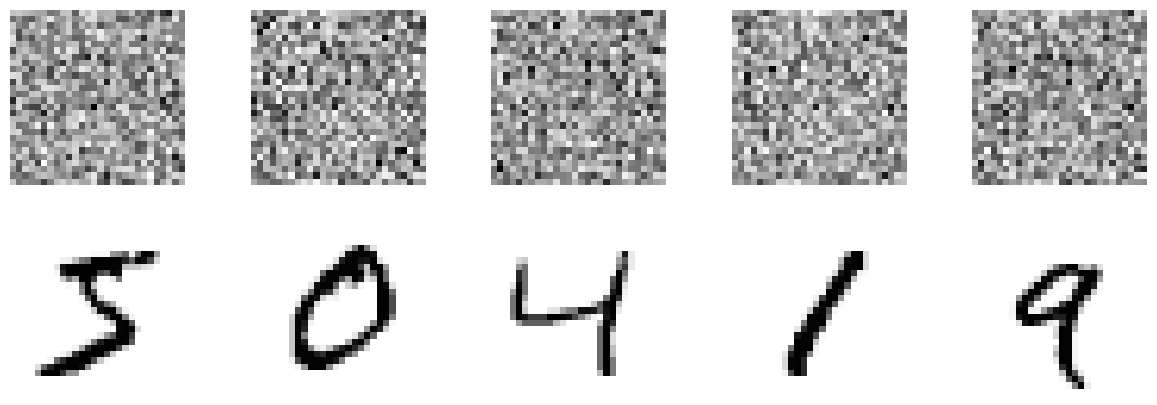

1/1 [==============================] - 0s 18ms/step
D loss:  2.5458312034606934
D accuracy:  1.0
G loss:  11.86129379272461


1/1 [==============================] - 0s 15ms/step
D loss:  5.3689422607421875
D accuracy:  0.5
G loss:  6.62930154800415




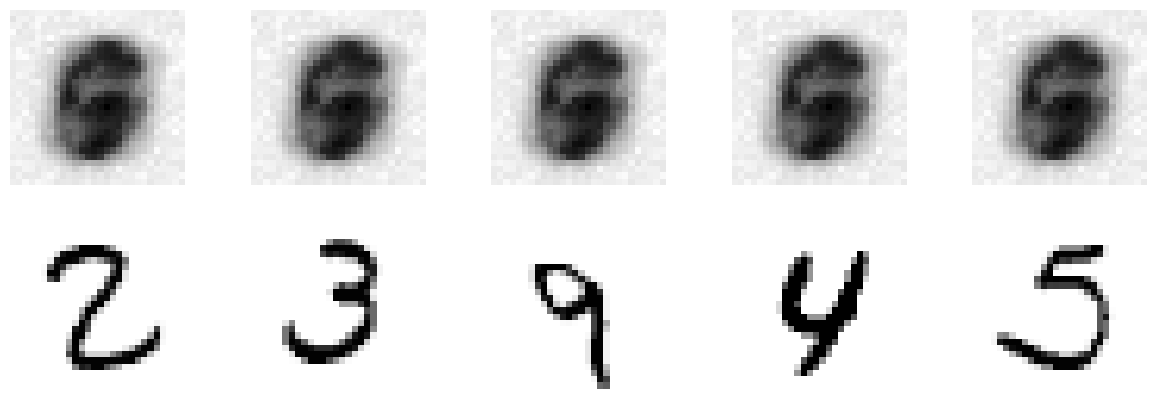

1/1 [==============================] - 0s 18ms/step
D loss:  2.892978549003601
D accuracy:  0.5
G loss:  5.523693084716797


1/1 [==============================] - 0s 17ms/step
D loss:  2.9007387161254883
D accuracy:  0.0
G loss:  5.631526947021484




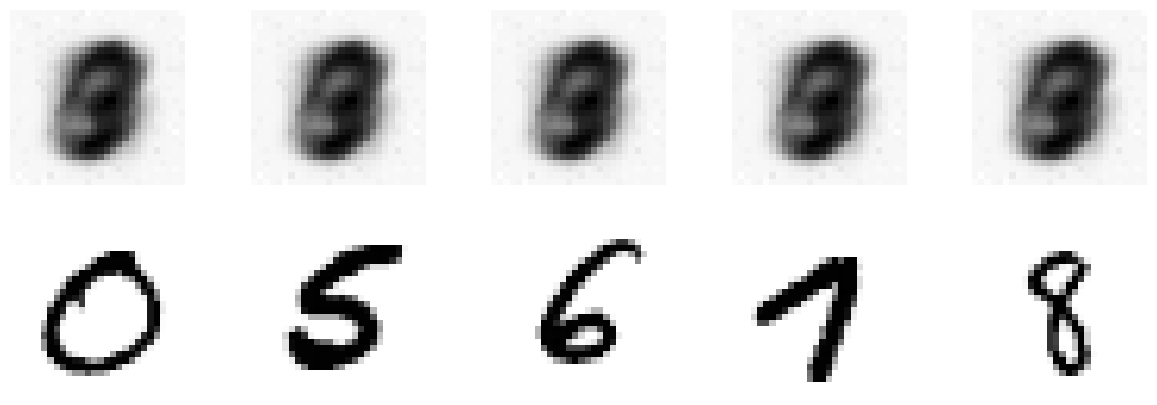

1/1 [==============================] - 0s 16ms/step
D loss:  2.8296704292297363
D accuracy:  0.5
G loss:  5.810000419616699


1/1 [==============================] - 0s 15ms/step
D loss:  2.833046793937683
D accuracy:  0.5
G loss:  5.752888202667236




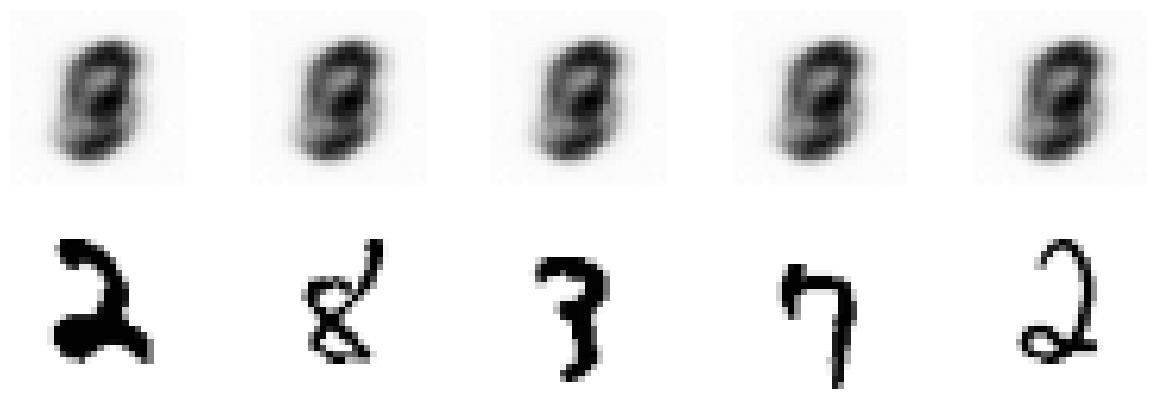

1/1 [==============================] - 0s 15ms/step
D loss:  2.6931004524230957
D accuracy:  0.5
G loss:  5.670322418212891


1/1 [==============================] - 0s 18ms/step
D loss:  2.7038129568099976
D accuracy:  0.5
G loss:  5.676974773406982




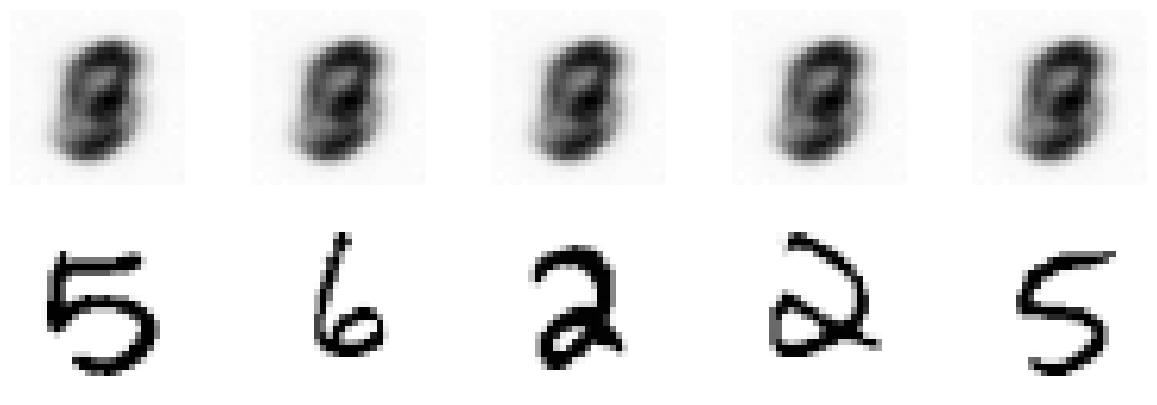

1/1 [==============================] - 0s 14ms/step
D loss:  2.712528109550476
D accuracy:  0.5
G loss:  5.624907493591309


1/1 [==============================] - 0s 22ms/step
D loss:  2.7011524438858032
D accuracy:  0.5
G loss:  5.617187976837158




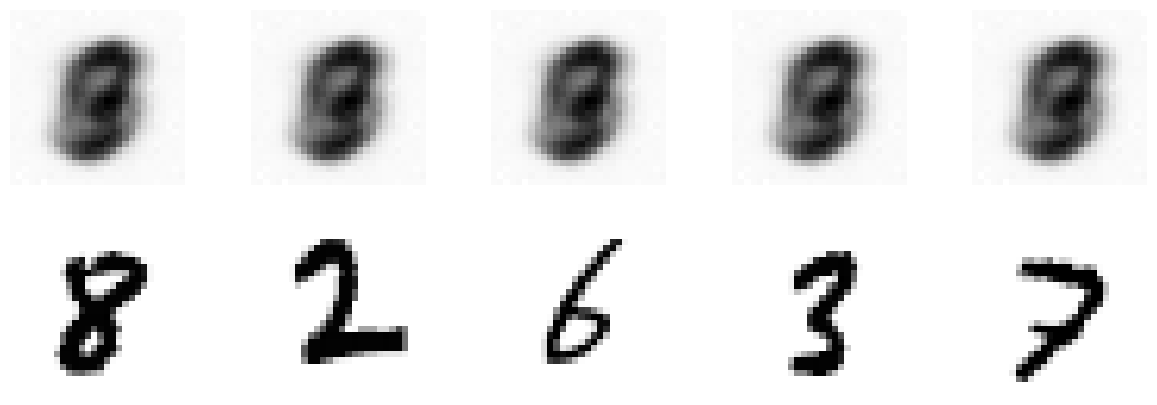

1/1 [==============================] - 0s 15ms/step
D loss:  2.707666754722595
D accuracy:  0.5
G loss:  5.630214691162109


1/1 [==============================] - 0s 14ms/step
D loss:  2.693495035171509
D accuracy:  0.5
G loss:  5.59448766708374




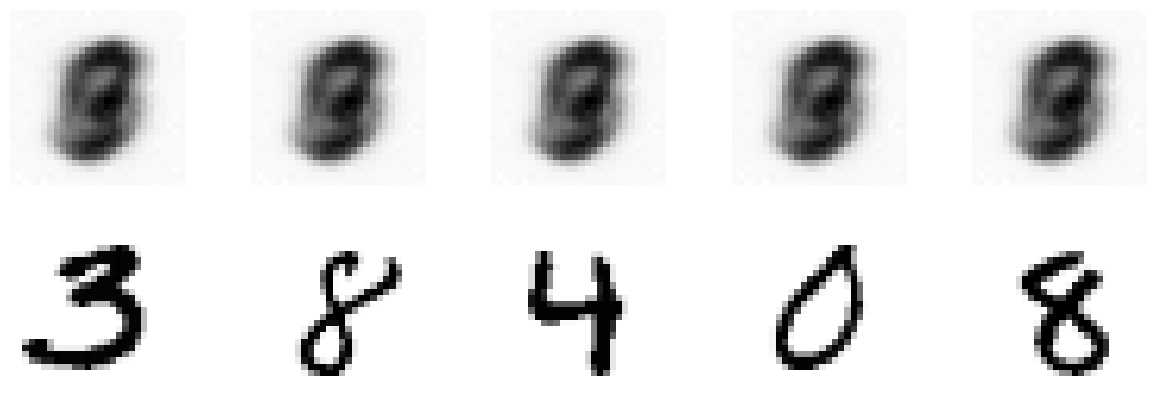

1/1 [==============================] - 0s 15ms/step
D loss:  2.697616219520569
D accuracy:  0.5
G loss:  5.587193489074707


1/1 [==============================] - 0s 17ms/step
D loss:  2.704629898071289
D accuracy:  0.5
G loss:  5.596983909606934




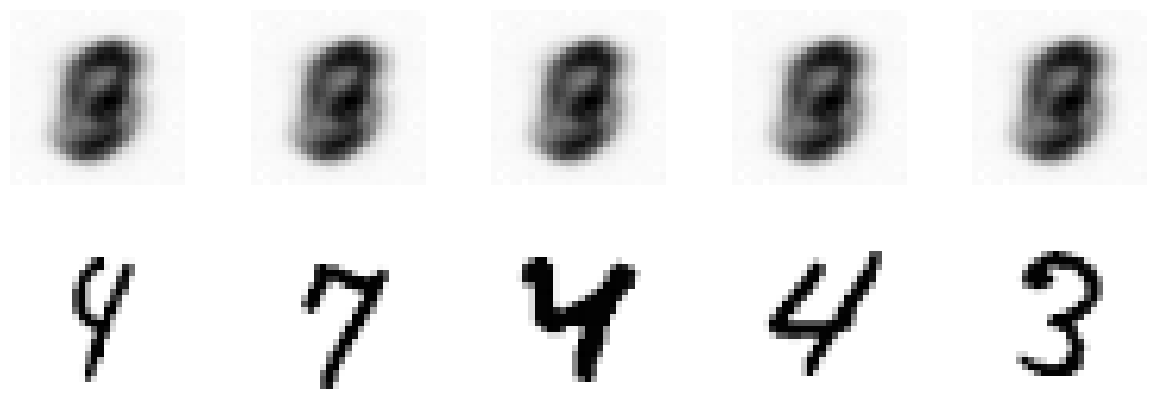

1/1 [==============================] - 0s 16ms/step
D loss:  2.697970986366272
D accuracy:  0.5
G loss:  5.588184356689453


1/1 [==============================] - 0s 27ms/step
D loss:  2.6948983669281006
D accuracy:  0.5
G loss:  5.585921764373779




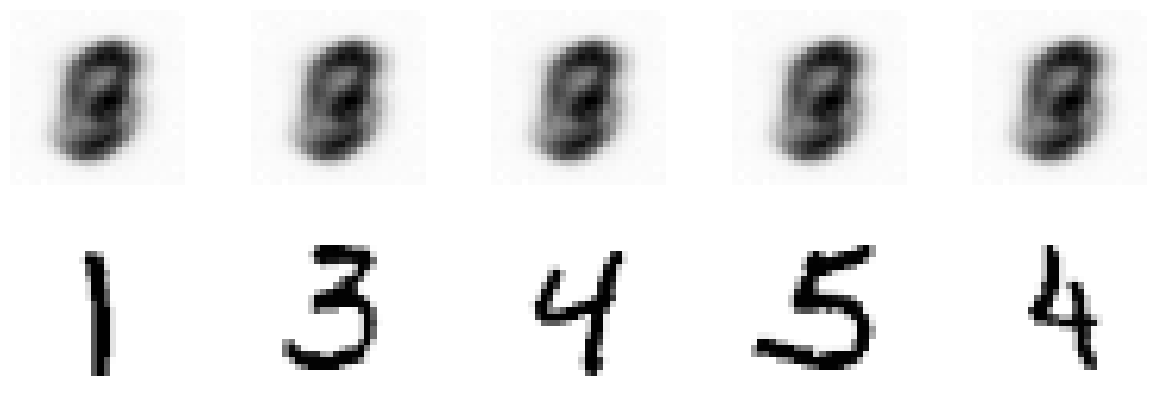

1/1 [==============================] - 0s 15ms/step
D loss:  2.7009624242782593
D accuracy:  0.5
G loss:  5.576487064361572


1/1 [==============================] - 0s 19ms/step
D loss:  2.703691005706787
D accuracy:  0.5
G loss:  5.571526527404785




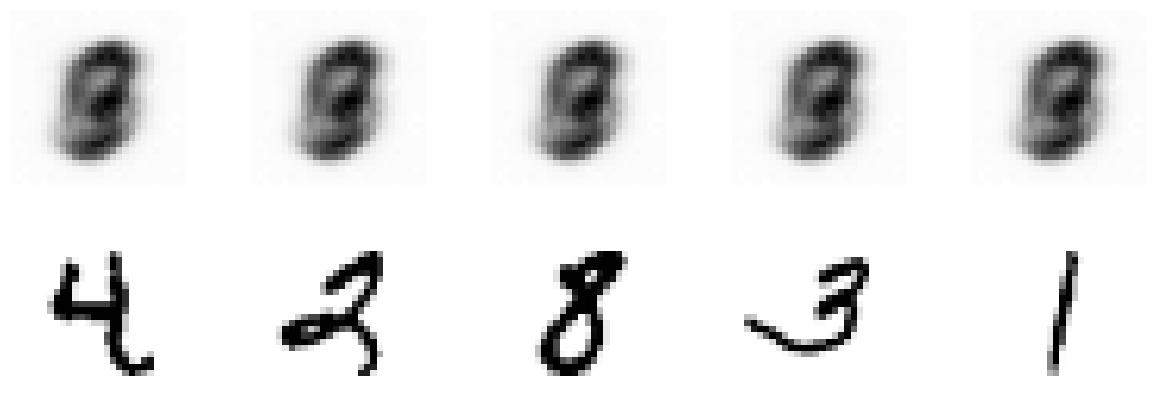

1/1 [==============================] - 0s 16ms/step
D loss:  2.7065707445144653
D accuracy:  0.5
G loss:  5.578156471252441


1/1 [==============================] - 0s 16ms/step
D loss:  2.7097796201705933
D accuracy:  0.0
G loss:  5.572336196899414




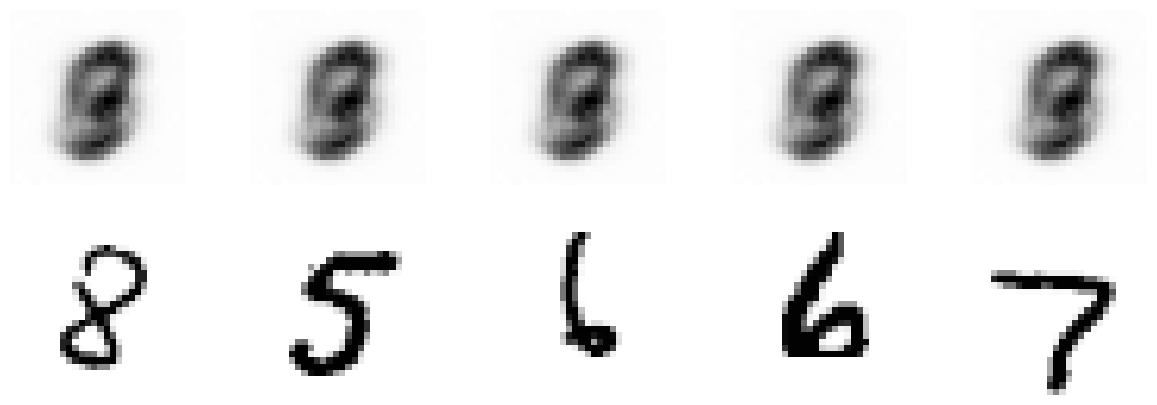

1/1 [==============================] - 0s 21ms/step
D loss:  2.6972469091415405
D accuracy:  0.5
G loss:  5.575159072875977


1/1 [==============================] - 0s 16ms/step
D loss:  2.713937759399414
D accuracy:  0.0
G loss:  5.560574531555176




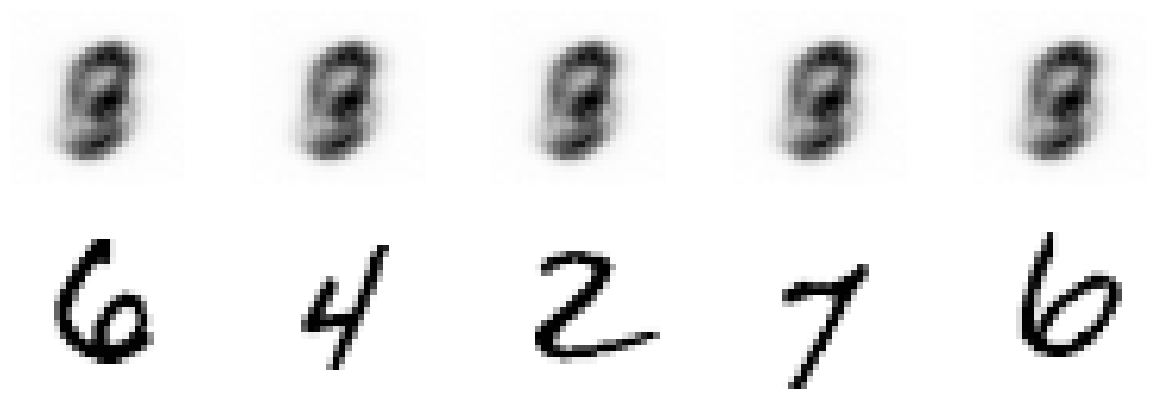

1/1 [==============================] - 0s 17ms/step
D loss:  2.700789451599121
D accuracy:  0.5
G loss:  5.567516326904297


1/1 [==============================] - 0s 16ms/step
D loss:  2.7160059213638306
D accuracy:  0.5
G loss:  5.57711124420166




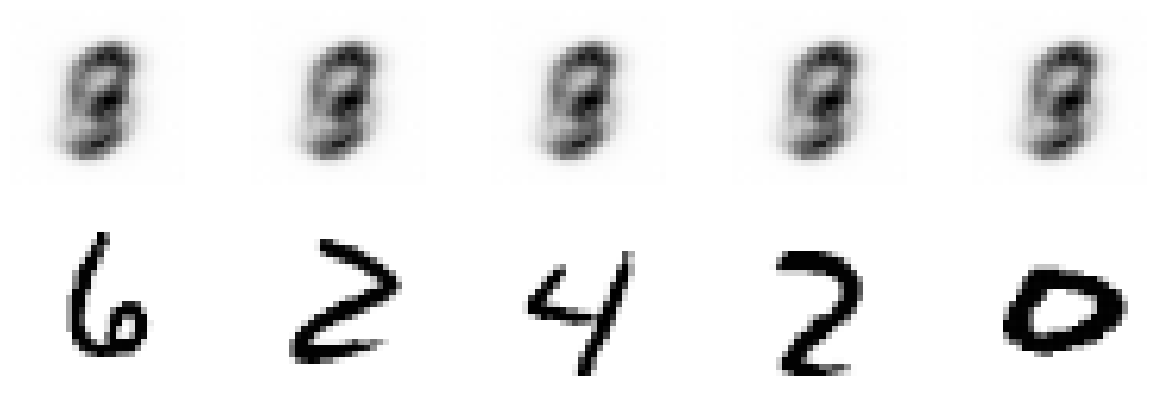

1/1 [==============================] - 0s 15ms/step
D loss:  2.7102829217910767
D accuracy:  0.28125
G loss:  5.564828872680664


1/1 [==============================] - 0s 16ms/step
D loss:  2.6999340057373047
D accuracy:  0.5
G loss:  5.556427955627441




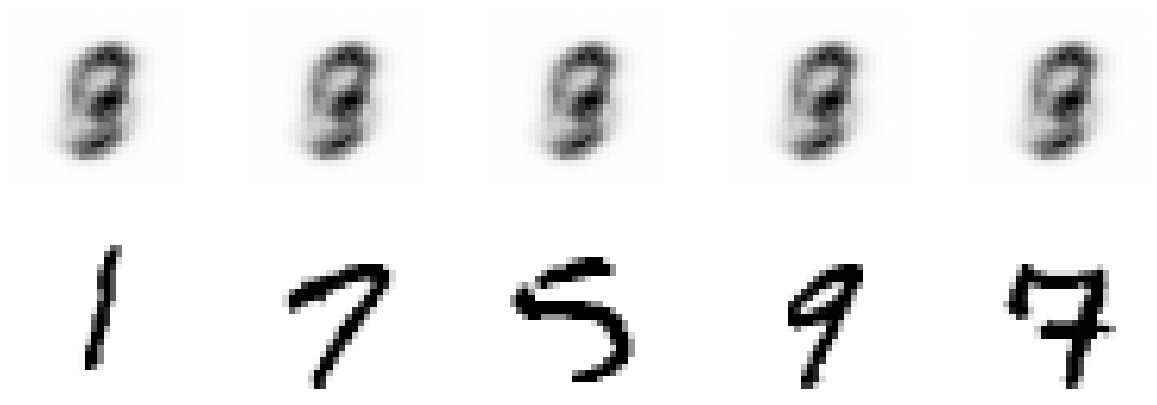

1/1 [==============================] - 0s 18ms/step
D loss:  2.689936637878418
D accuracy:  0.5
G loss:  5.572566986083984


1/1 [==============================] - 0s 22ms/step
D loss:  2.700856566429138
D accuracy:  0.5
G loss:  5.577552795410156




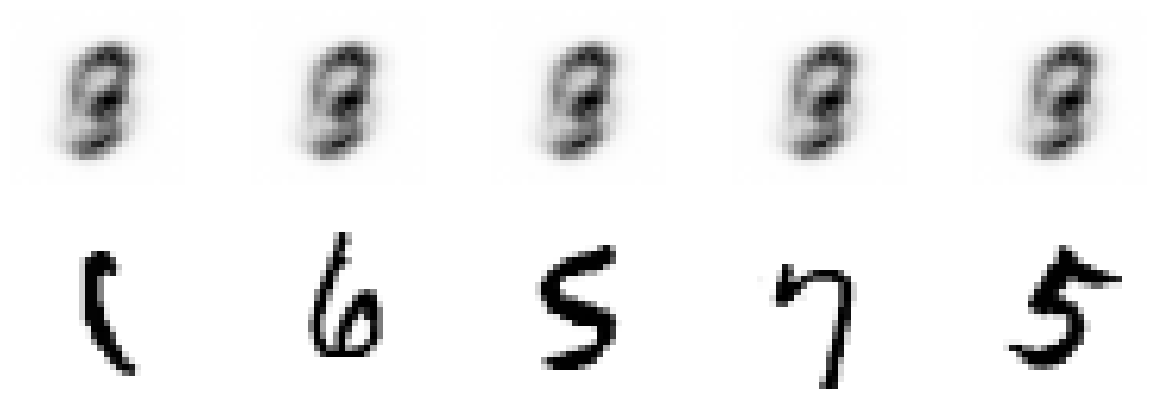

1/1 [==============================] - 0s 18ms/step
D loss:  2.7181649208068848
D accuracy:  0.5
G loss:  5.5725321769714355


1/1 [==============================] - 0s 15ms/step
D loss:  2.709404945373535
D accuracy:  0.5
G loss:  5.568693161010742




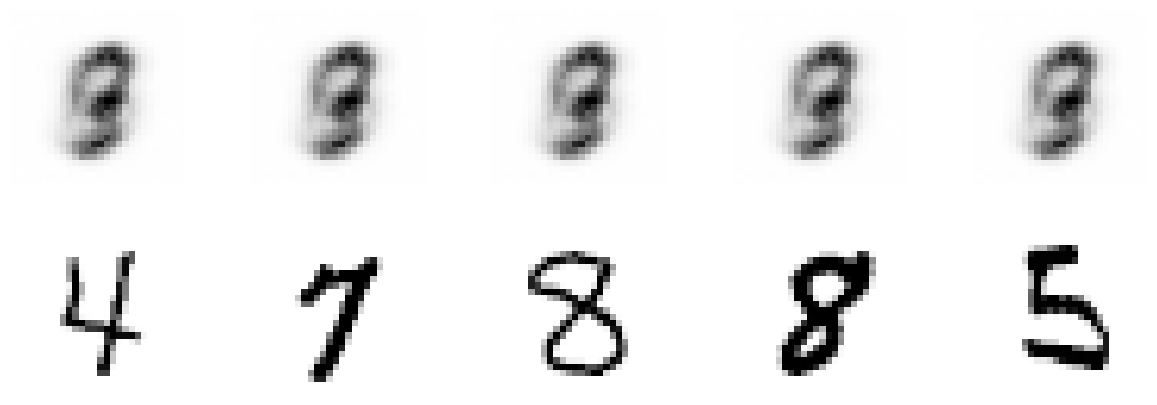

1/1 [==============================] - 0s 16ms/step
D loss:  2.695886731147766
D accuracy:  0.5
G loss:  5.574619770050049


1/1 [==============================] - 0s 15ms/step
D loss:  2.71742045879364
D accuracy:  0.5
G loss:  5.587131500244141




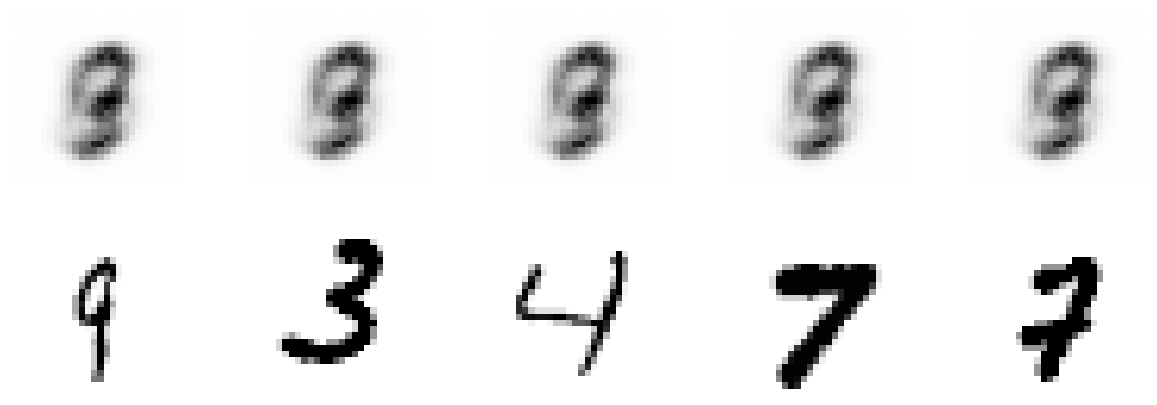

1/1 [==============================] - 0s 18ms/step
D loss:  2.714248776435852
D accuracy:  0.5
G loss:  5.55938720703125


1/1 [==============================] - 0s 18ms/step
D loss:  2.6917859315872192
D accuracy:  0.5
G loss:  5.592729568481445




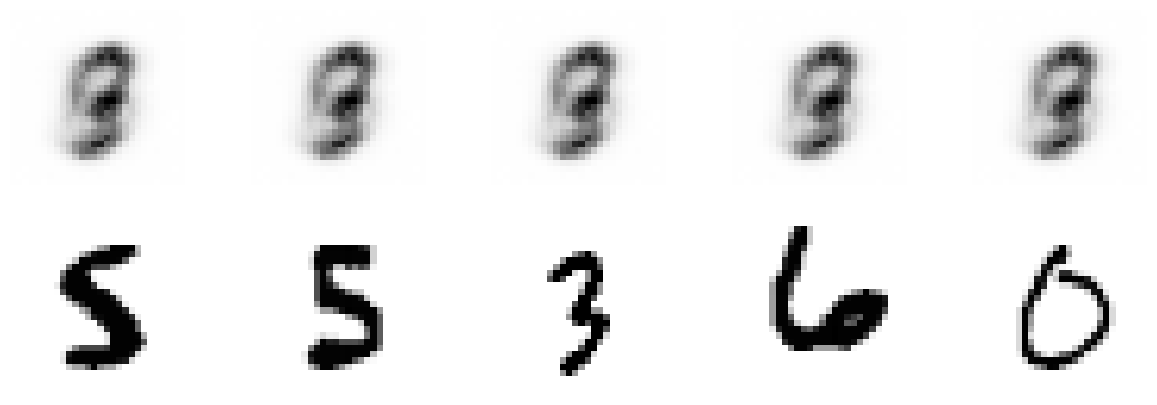

1/1 [==============================] - 0s 20ms/step
D loss:  2.7152953147888184
D accuracy:  0.5
G loss:  5.560242652893066


1/1 [==============================] - 0s 26ms/step
D loss:  2.7058805227279663
D accuracy:  0.5
G loss:  5.585158348083496




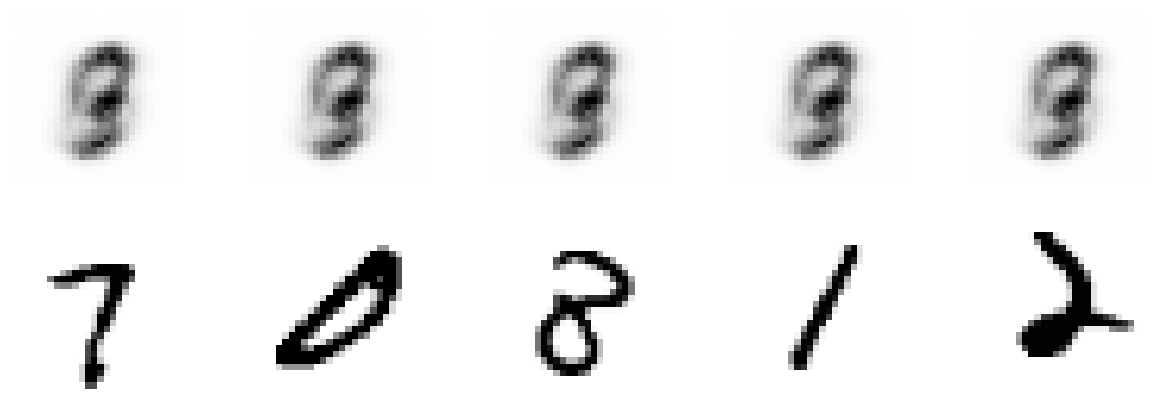

1/1 [==============================] - 0s 18ms/step
D loss:  2.6967036724090576
D accuracy:  0.5
G loss:  5.567732810974121


1/1 [==============================] - 0s 17ms/step
Epoch:  1
1/1 [==============================] - 0s 17ms/step
D loss:  2.6884344816207886
D accuracy:  0.515625
G loss:  5.623156547546387




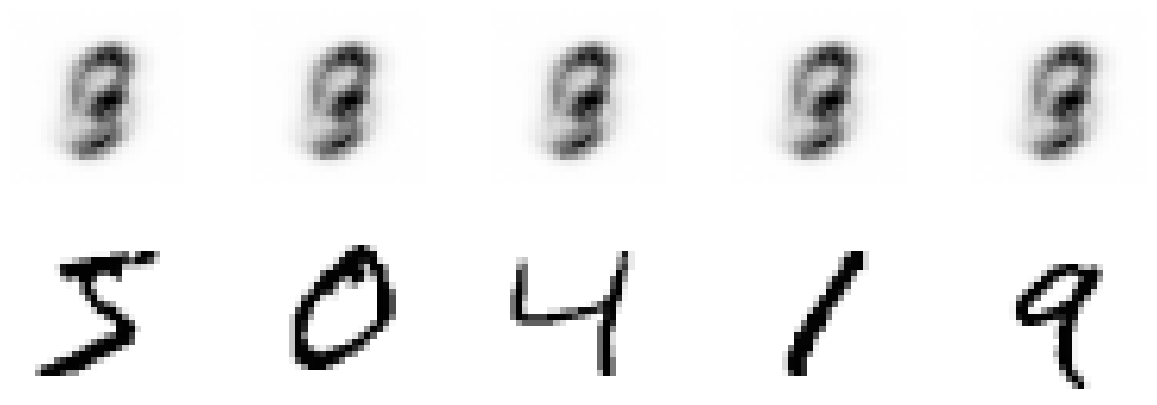

1/1 [==============================] - 0s 44ms/step
D loss:  2.6930497884750366
D accuracy:  0.5
G loss:  5.607993125915527


1/1 [==============================] - 0s 19ms/step
D loss:  2.699655771255493
D accuracy:  0.5
G loss:  5.617336273193359




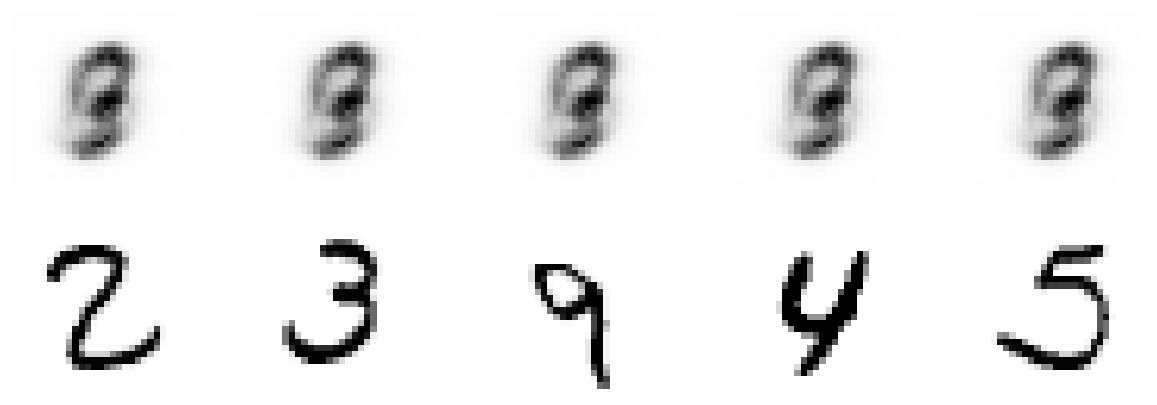

1/1 [==============================] - 0s 17ms/step
D loss:  2.7045480012893677
D accuracy:  0.5
G loss:  5.573995590209961


1/1 [==============================] - 0s 18ms/step
D loss:  2.713038206100464
D accuracy:  0.0
G loss:  5.565196990966797




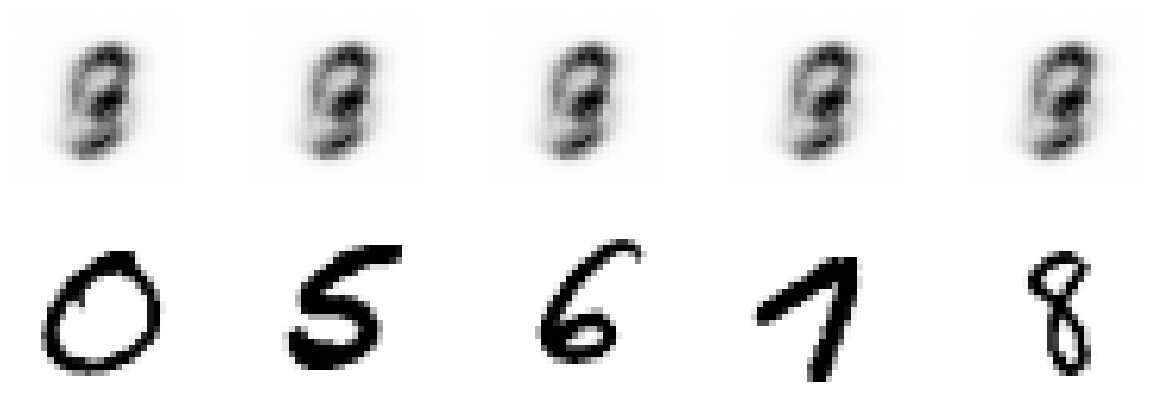

1/1 [==============================] - 0s 19ms/step
D loss:  2.6994746923446655
D accuracy:  0.5
G loss:  5.571845054626465


1/1 [==============================] - 0s 23ms/step
D loss:  2.6808764934539795
D accuracy:  1.0
G loss:  5.601376056671143




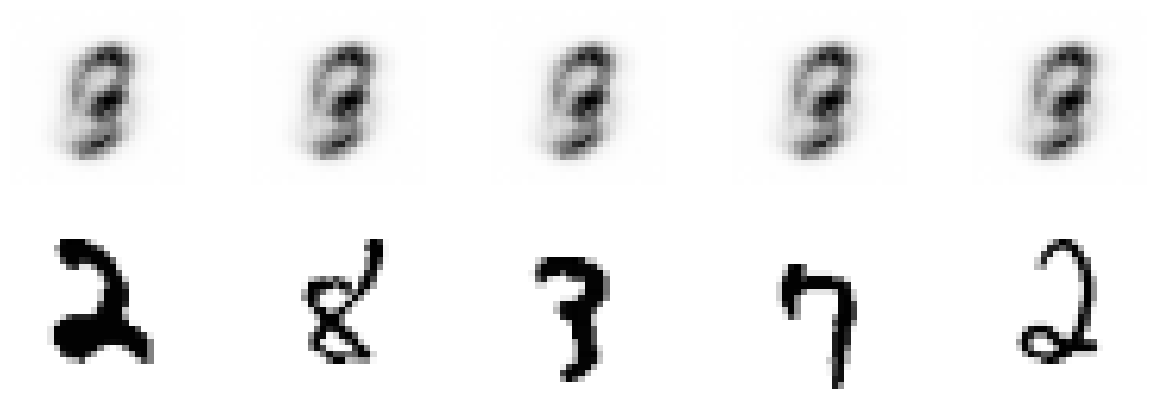

1/1 [==============================] - 0s 24ms/step
D loss:  2.709876537322998
D accuracy:  0.5
G loss:  5.618907928466797


1/1 [==============================] - 0s 15ms/step
D loss:  2.7028262615203857
D accuracy:  1.0
G loss:  5.6305832862854




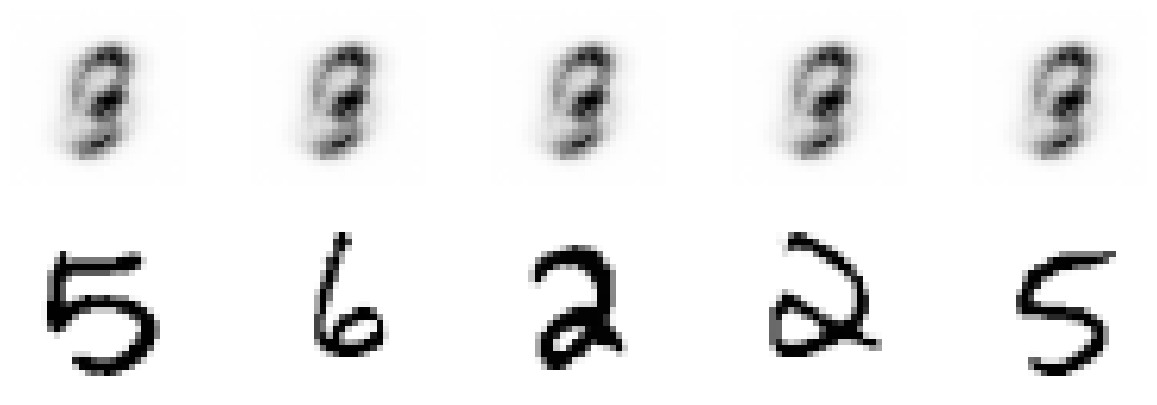

1/1 [==============================] - 0s 24ms/step
D loss:  2.733696937561035
D accuracy:  0.0
G loss:  5.608457565307617


1/1 [==============================] - 0s 16ms/step
D loss:  2.720829963684082
D accuracy:  0.5
G loss:  5.5707902908325195




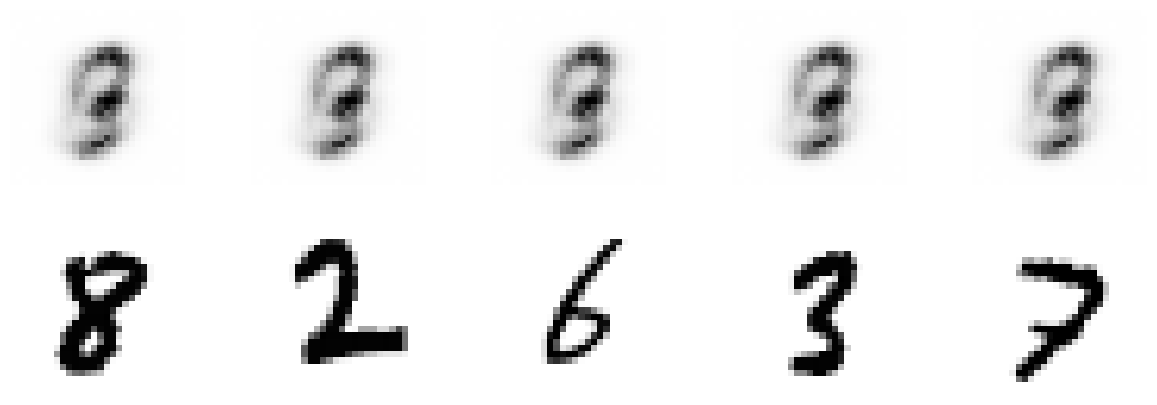

1/1 [==============================] - 0s 16ms/step
D loss:  2.7339476346969604
D accuracy:  0.5
G loss:  5.646520137786865


1/1 [==============================] - 0s 17ms/step
D loss:  2.705052614212036
D accuracy:  0.5
G loss:  5.632800102233887




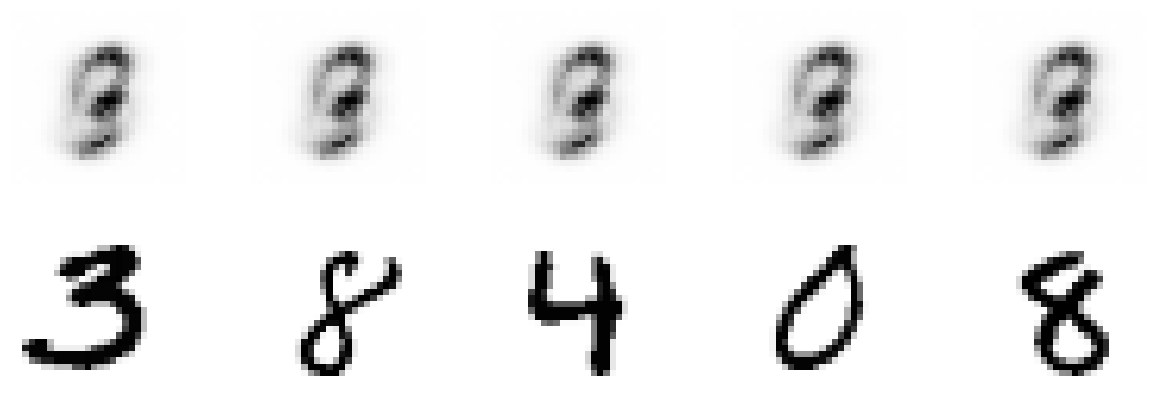

1/1 [==============================] - 0s 16ms/step
D loss:  2.714398980140686
D accuracy:  0.921875
G loss:  5.679922103881836


1/1 [==============================] - 0s 18ms/step
D loss:  2.727349281311035
D accuracy:  0.5
G loss:  5.635367393493652




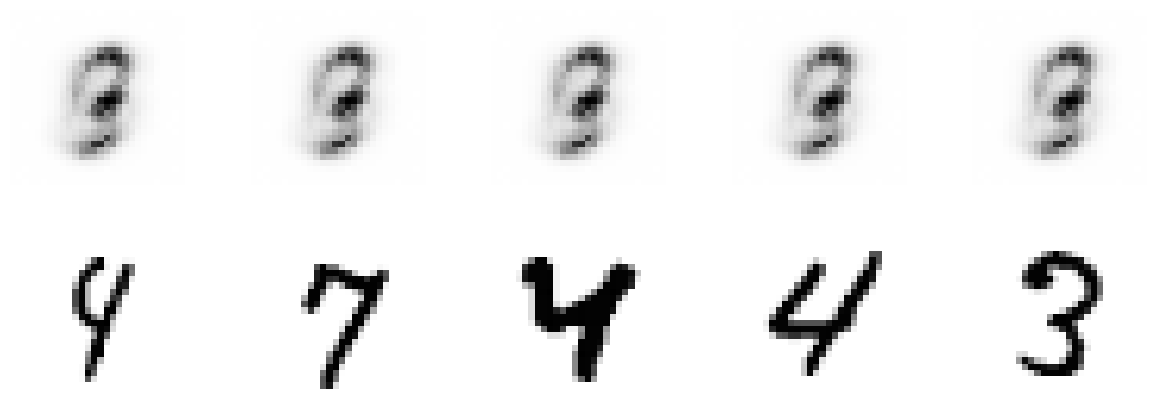

1/1 [==============================] - 0s 16ms/step
D loss:  2.6948087215423584
D accuracy:  0.5
G loss:  5.601569175720215


1/1 [==============================] - 0s 18ms/step
D loss:  2.702279806137085
D accuracy:  0.5
G loss:  5.633917808532715




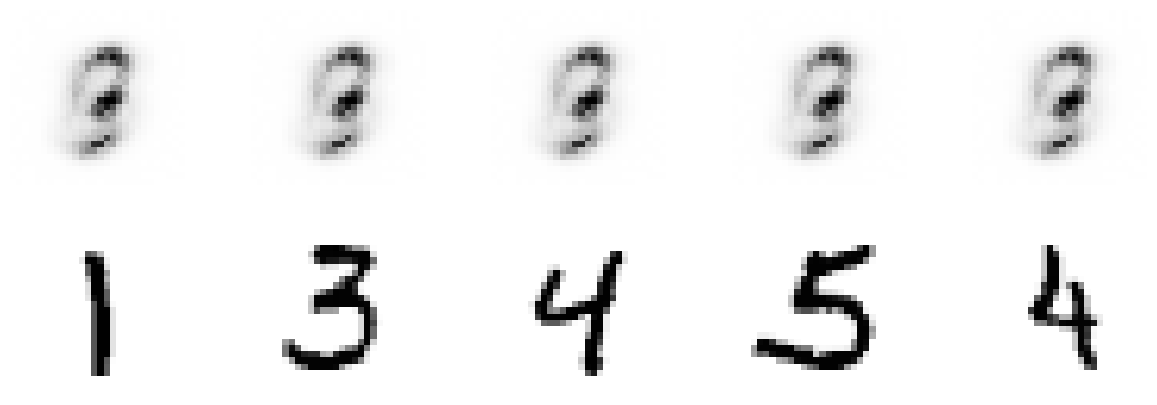

1/1 [==============================] - 0s 15ms/step
D loss:  2.7053076028823853
D accuracy:  0.0
G loss:  5.5724945068359375


1/1 [==============================] - 0s 17ms/step
D loss:  2.6611220836639404
D accuracy:  0.546875
G loss:  5.640651702880859




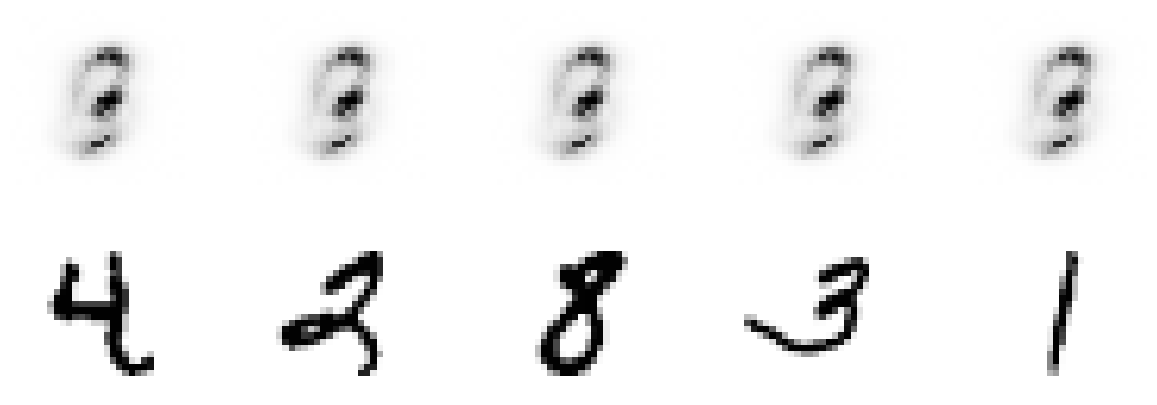

1/1 [==============================] - 0s 18ms/step
D loss:  2.7425618171691895
D accuracy:  0.0
G loss:  5.602544784545898


1/1 [==============================] - 0s 27ms/step
D loss:  2.7006311416625977
D accuracy:  0.0
G loss:  5.558434009552002




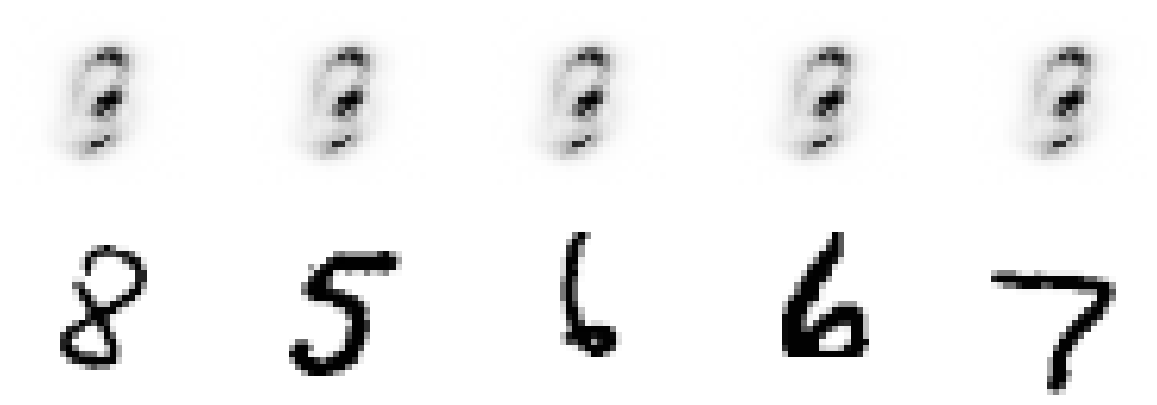

1/1 [==============================] - 0s 16ms/step
D loss:  2.6996777057647705
D accuracy:  0.953125
G loss:  5.698358535766602


1/1 [==============================] - 0s 17ms/step
D loss:  2.7003942728042603
D accuracy:  0.5625
G loss:  5.682452201843262




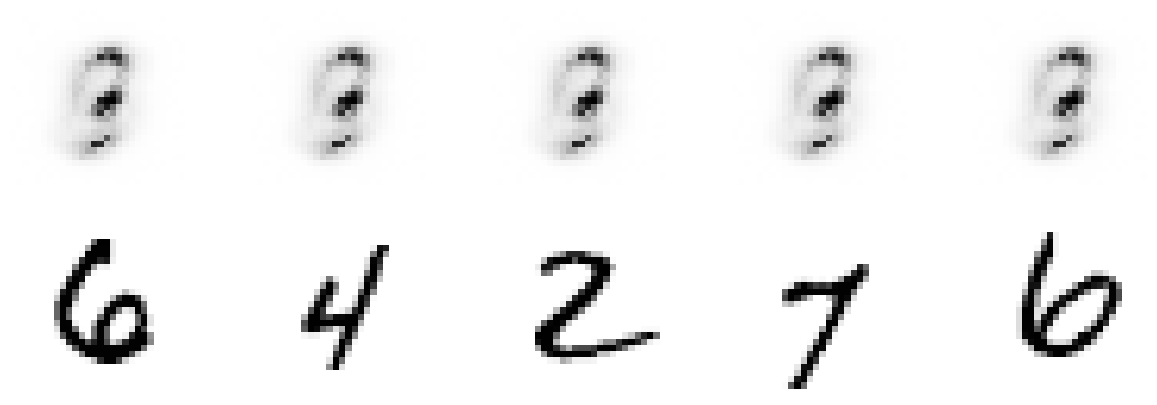

1/1 [==============================] - 0s 24ms/step
D loss:  2.6833696365356445
D accuracy:  0.5
G loss:  5.563298225402832


1/1 [==============================] - 0s 15ms/step
D loss:  2.7587708234786987
D accuracy:  0.0
G loss:  5.613312721252441




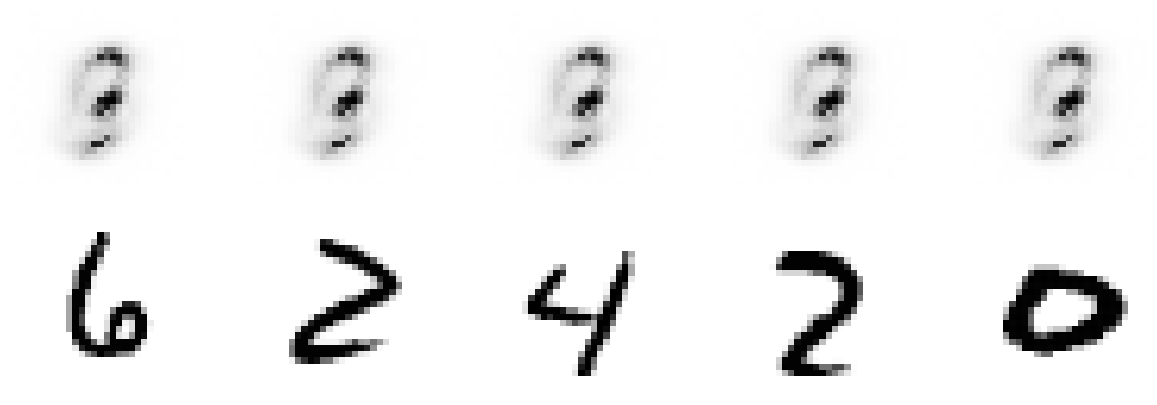

1/1 [==============================] - 0s 18ms/step
D loss:  2.7207058668136597
D accuracy:  0.5
G loss:  5.574833869934082


1/1 [==============================] - 0s 27ms/step
D loss:  2.70641827583313
D accuracy:  0.5
G loss:  5.57009220123291




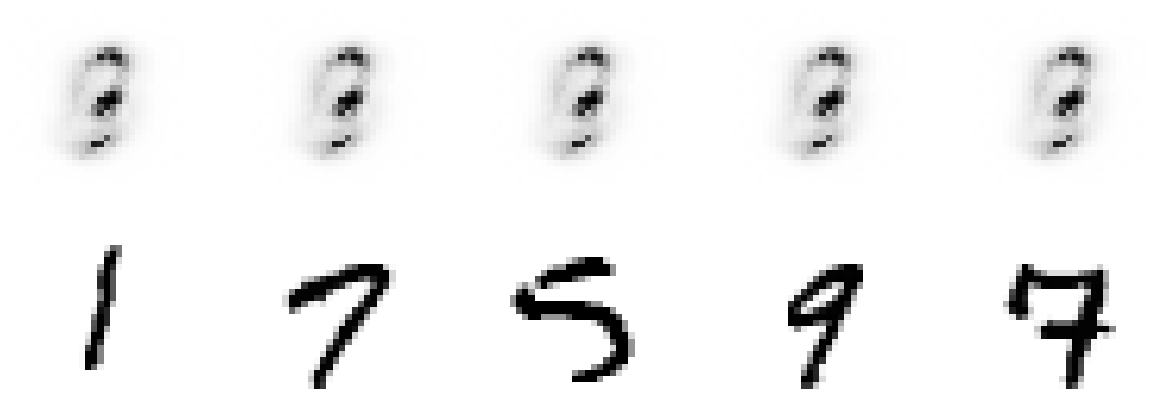

1/1 [==============================] - 0s 18ms/step
D loss:  2.7753474712371826
D accuracy:  0.5
G loss:  5.654332637786865


1/1 [==============================] - 0s 16ms/step
D loss:  2.7352423667907715
D accuracy:  0.5
G loss:  5.602225303649902




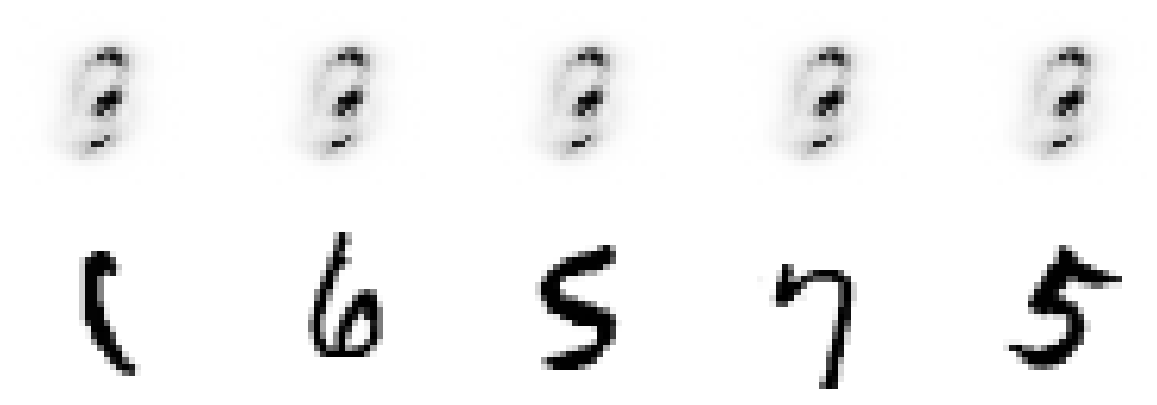

1/1 [==============================] - 0s 16ms/step
D loss:  2.731137990951538
D accuracy:  0.0
G loss:  5.562933921813965


1/1 [==============================] - 0s 15ms/step
D loss:  2.7470102310180664
D accuracy:  0.5
G loss:  5.576271057128906




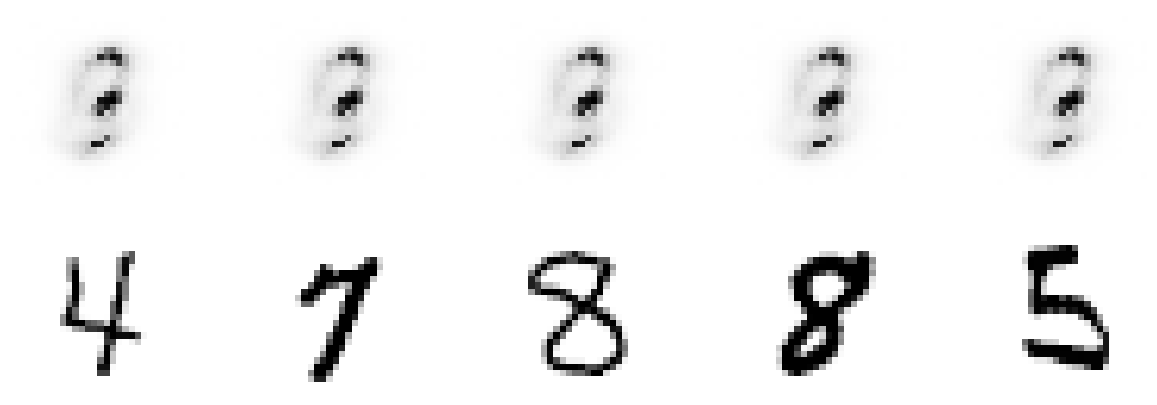

1/1 [==============================] - 0s 16ms/step
D loss:  2.7757301330566406
D accuracy:  0.5
G loss:  5.614622116088867


1/1 [==============================] - 0s 16ms/step
D loss:  2.7600098848342896
D accuracy:  0.5
G loss:  5.631091594696045




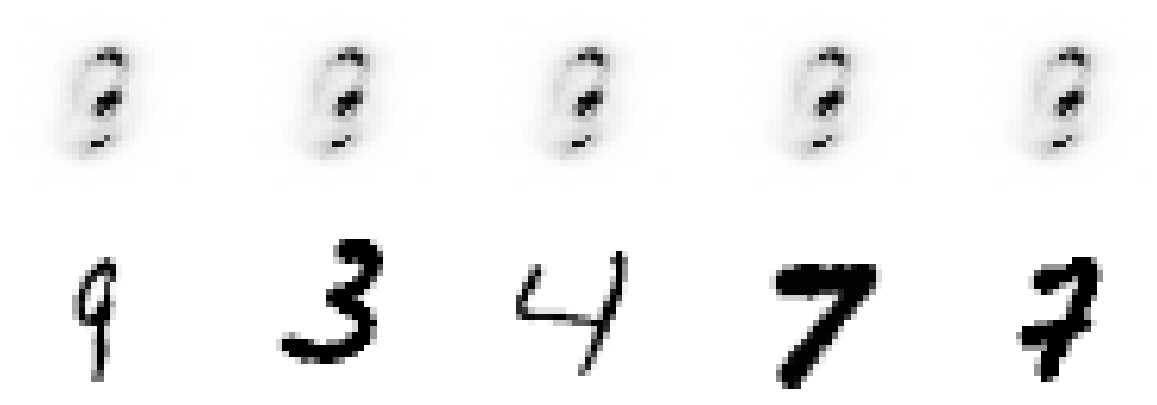

1/1 [==============================] - 0s 17ms/step
D loss:  2.7174930572509766
D accuracy:  0.078125
G loss:  5.597947120666504


1/1 [==============================] - 0s 16ms/step
D loss:  2.7042890787124634
D accuracy:  0.5
G loss:  5.605512619018555




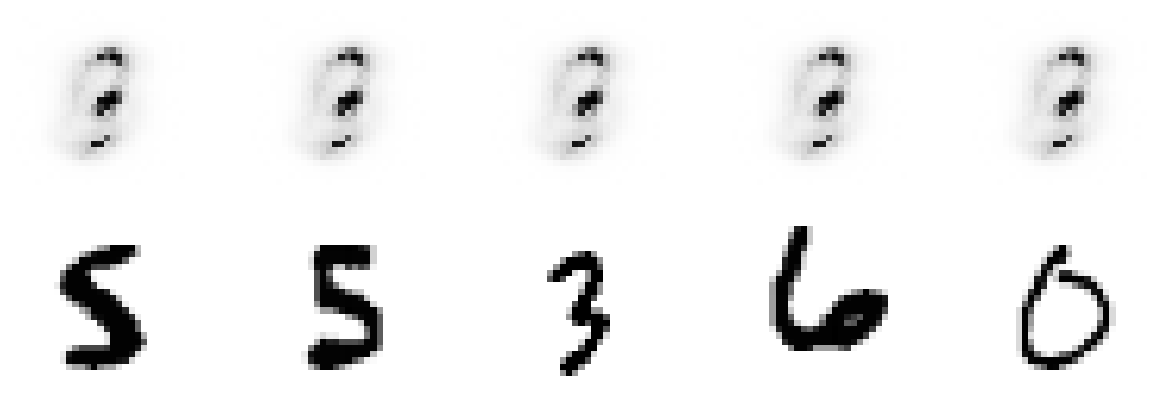

1/1 [==============================] - 0s 15ms/step
D loss:  2.74967885017395
D accuracy:  0.0
G loss:  5.609319686889648


1/1 [==============================] - 0s 16ms/step
D loss:  2.746298313140869
D accuracy:  0.5
G loss:  5.624240875244141




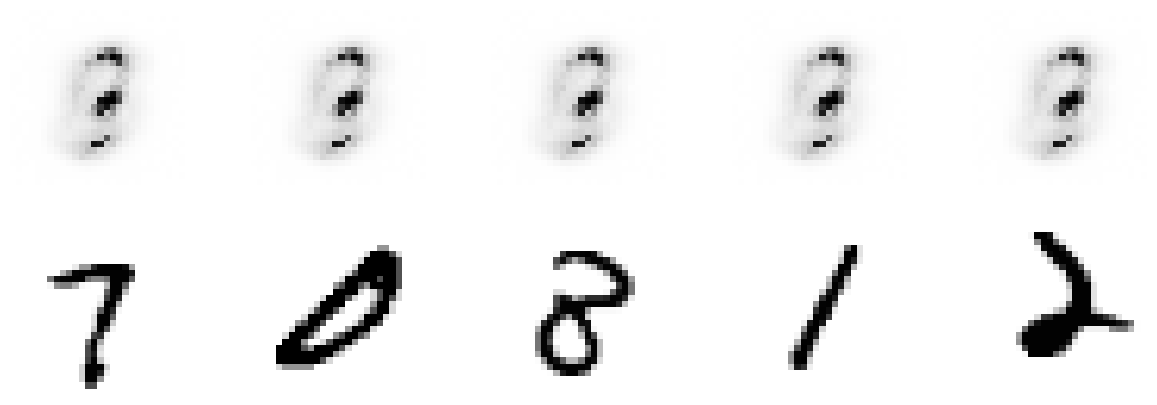

1/1 [==============================] - 0s 23ms/step
D loss:  2.6975947618484497
D accuracy:  0.5
G loss:  5.548049449920654


1/1 [==============================] - 0s 15ms/step
Epoch:  2
1/1 [==============================] - 0s 14ms/step
D loss:  2.7341339588165283
D accuracy:  0.5
G loss:  5.650495529174805




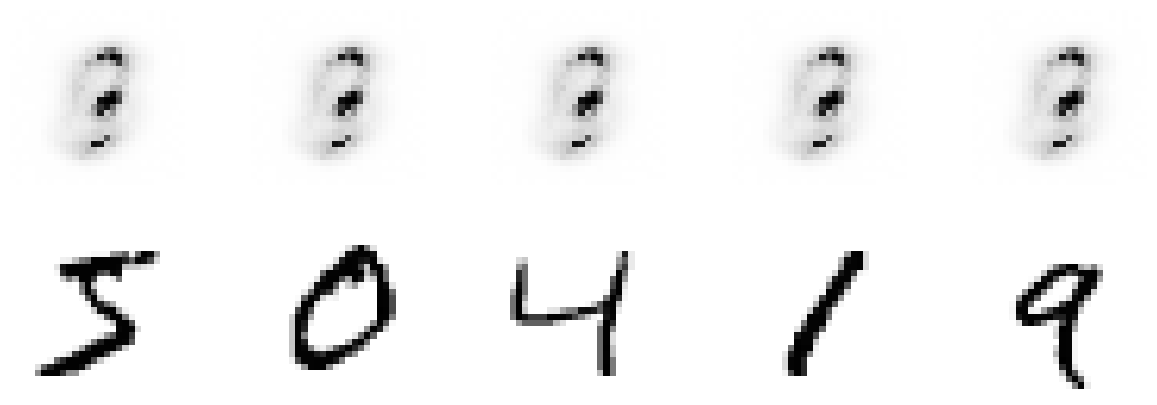

1/1 [==============================] - 0s 33ms/step
D loss:  2.76241397857666
D accuracy:  0.0
G loss:  5.574313163757324


1/1 [==============================] - 0s 83ms/step


KeyboardInterrupt: ignored

In [ ]:
D_LOSS_ANTIGUA=D_LOSS
G_LOSS_ANTIGUA=G_LOSS
D_LOSS=[]
G_LOSS=[]
train(X_train,generator,discriminator,combined,epochs=10,batch_size=32,sample_interval=100)

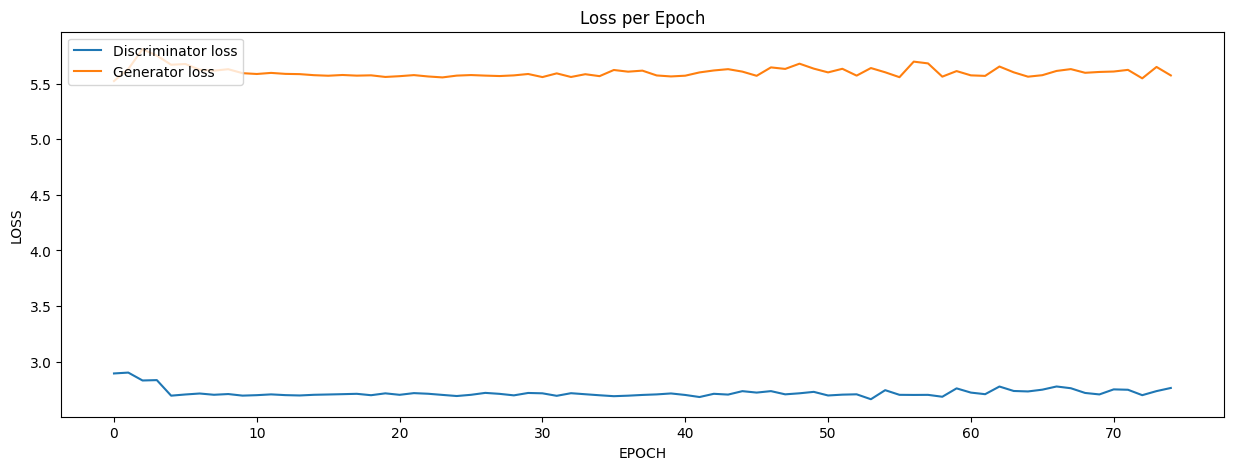

In [ ]:
plt.plot(D_LOSS[3:])
plt.plot(G_LOSS[3:])
plt.title('Loss per Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['Discriminator loss', 'Generator loss'], loc='upper left')
plt.show()

Hemos quitado las primeras para poder observar mejor el resto de epochs. Podemos observar que tenemos Gradient Vanishing ya que ambas curvas son constantes.

## Kernel Initializer

Añadir un inicializador de los pesos es una tecnica utilizada normalmente para reducir los problemas con el gradiente en los modelos GAN.

Vamos a implementar la función de inicialización He normal.

In [ ]:
from tensorflow.keras.initializers import HeNormal

In [ ]:
def create_generator():
  input=Input(shape=(100))
  x=Dense(64,activation='relu',kernel_initializer=HeNormal())(input)
  x=Dense(128,activation='relu',kernel_initializer=HeNormal())(x)
  x=Dense(512,activation='relu', kernel_initializer=HeNormal())(x)
  x=Dense(1024,activation='relu', kernel_initializer=HeNormal())(x)

  x=Dense(28*28,activation='tanh')(x)


  output=Reshape((28,28,1)) (x)
  generator=Model(input,output)
  return generator

In [ ]:
generator=create_generator()

In [ ]:
def create_discriminator():
  input=Input(shape=(28,28,1))

  x=Flatten()(input)

  x=Dense(512,activation='relu', kernel_initializer=HeNormal())(x)
  x=Dense(128,activation='relu',kernel_initializer=HeNormal())(x)
  x=Dense(64,activation='relu',kernel_initializer=HeNormal())(x)

  output=Dense(1,activation='sigmoid')(x)

  discriminator=Model(input,output)
  return discriminator

In [ ]:
discriminator=create_discriminator()

In [ ]:
discriminator.compile(loss='binary_crossentropy',metrics=['accuracy'])
discriminator.trainable=False

z=Input(shape=(100,))
img=generator(z)
validity=discriminator(img)

combined=Model(z,validity)
combined.compile(loss='binary_crossentropy')

Epoch:  0
1/1 [==============================] - 0s 69ms/step
D loss:  1.7820310667157173
D accuracy:  0.5
G loss:  1.9575681686401367




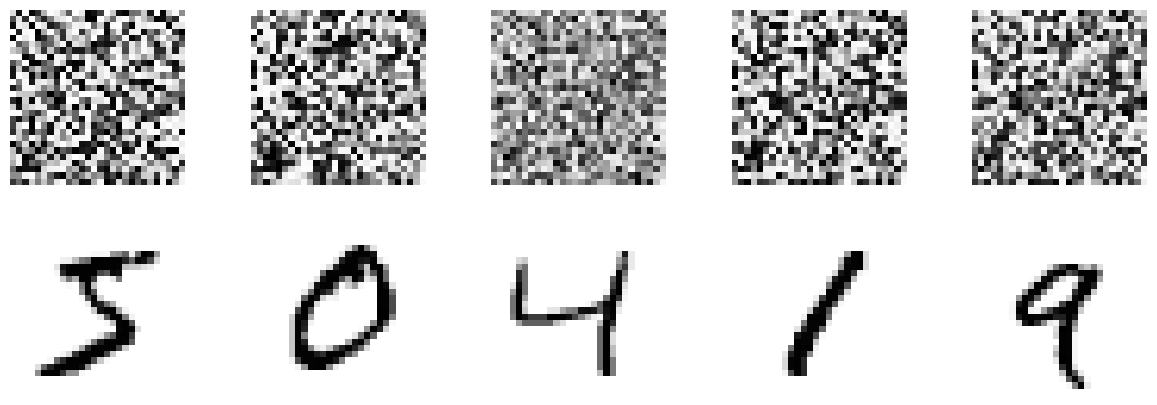

1/1 [==============================] - 0s 16ms/step
D loss:  0.5946205109357834
D accuracy:  0.5
G loss:  0.9245336055755615


1/1 [==============================] - 0s 20ms/step
D loss:  0.7766595482826233
D accuracy:  0.453125
G loss:  1.0155205726623535




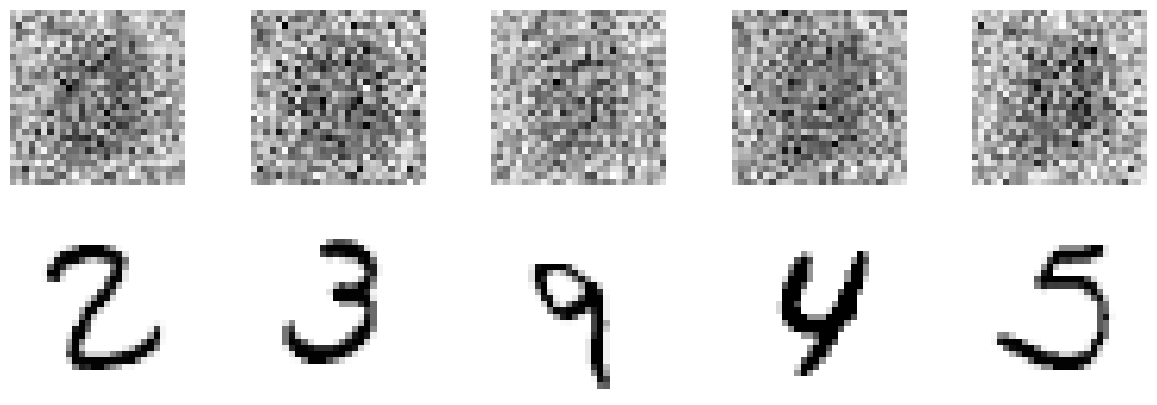

1/1 [==============================] - 0s 23ms/step
D loss:  0.2913767397403717
D accuracy:  0.984375
G loss:  1.669806957244873


1/1 [==============================] - 0s 16ms/step
D loss:  0.36867570877075195
D accuracy:  0.890625
G loss:  1.6123396158218384




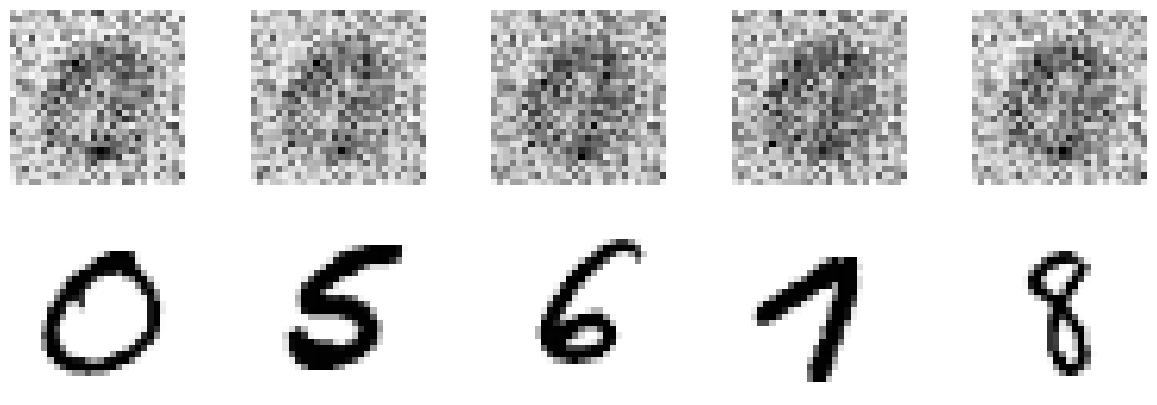

1/1 [==============================] - 0s 16ms/step
D loss:  0.3128863722085953
D accuracy:  0.953125
G loss:  1.7726633548736572


1/1 [==============================] - 0s 24ms/step
D loss:  0.140083409845829
D accuracy:  1.0
G loss:  2.609264612197876




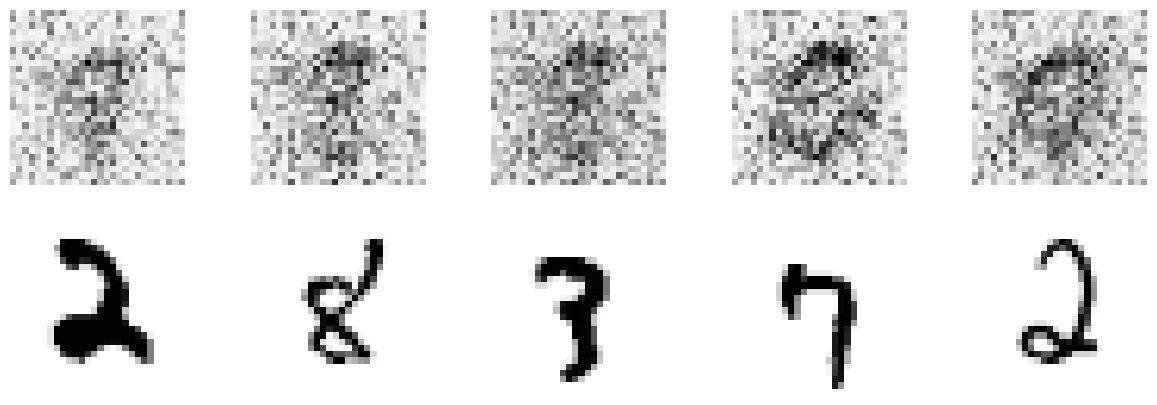

1/1 [==============================] - 0s 15ms/step
D loss:  0.5531445443630219
D accuracy:  0.6875
G loss:  3.2000224590301514


1/1 [==============================] - 0s 17ms/step
D loss:  0.5094775855541229
D accuracy:  0.71875
G loss:  2.181942939758301




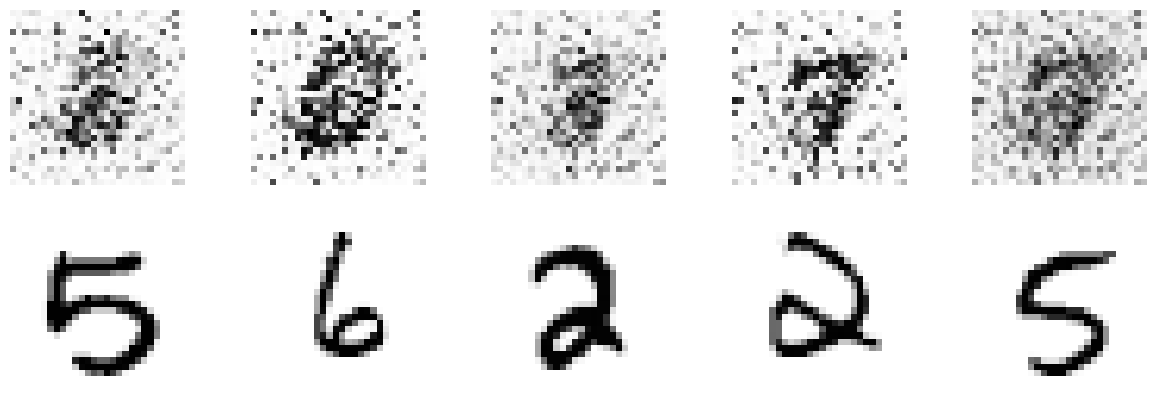

1/1 [==============================] - 0s 32ms/step
D loss:  0.16502923145890236
D accuracy:  1.0
G loss:  2.398289203643799


1/1 [==============================] - 0s 15ms/step
D loss:  1.0787286758422852
D accuracy:  0.546875
G loss:  2.7549214363098145




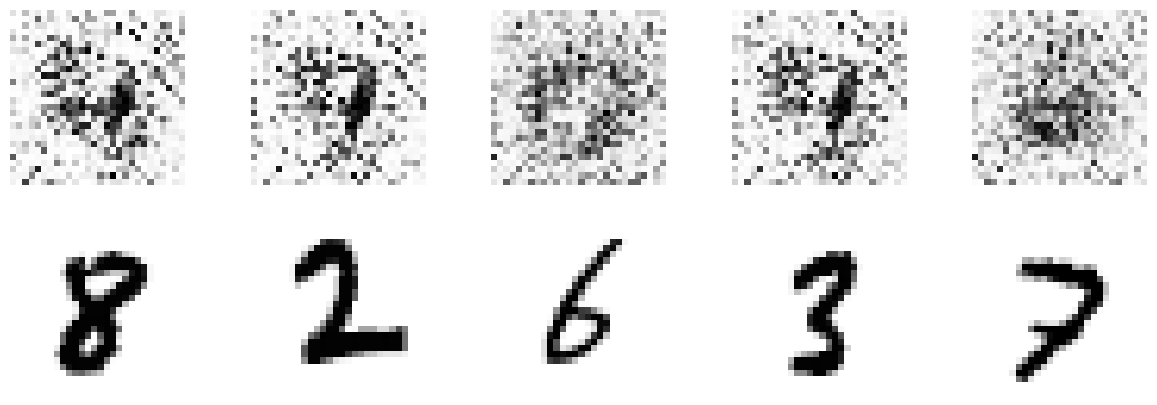

1/1 [==============================] - 0s 16ms/step
D loss:  0.34176725894212723
D accuracy:  0.828125
G loss:  2.298624038696289


1/1 [==============================] - 0s 25ms/step
D loss:  0.41468796133995056
D accuracy:  0.875
G loss:  1.4843647480010986




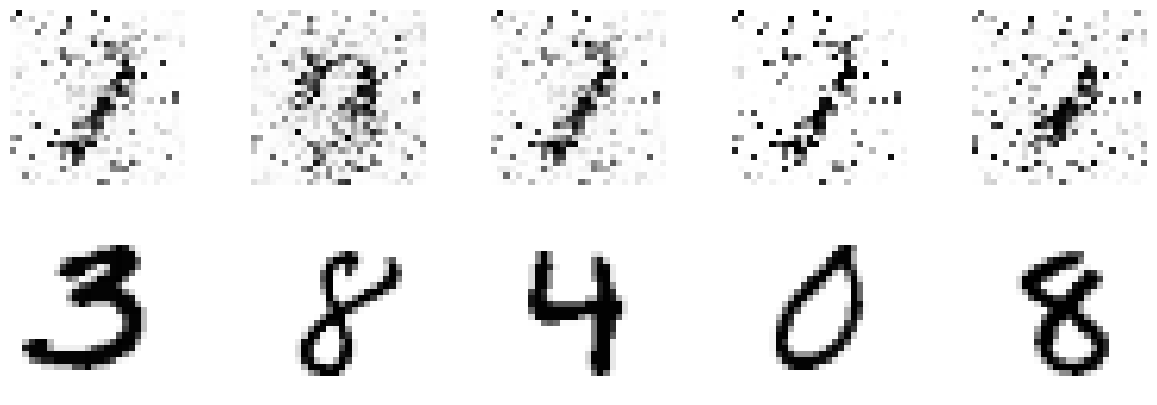

1/1 [==============================] - 0s 15ms/step
D loss:  0.7838380634784698
D accuracy:  0.625
G loss:  3.058289051055908


1/1 [==============================] - 0s 17ms/step
D loss:  0.4118489921092987
D accuracy:  0.84375
G loss:  2.0028650760650635




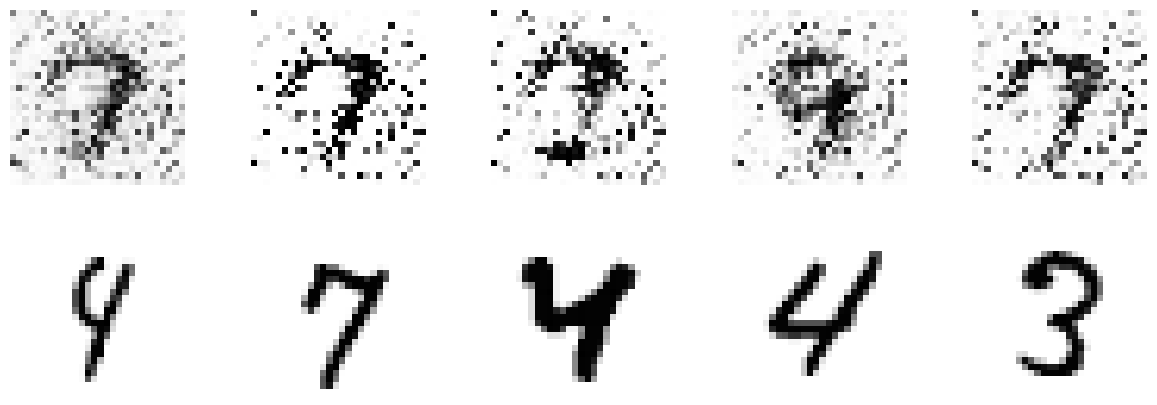

1/1 [==============================] - 0s 24ms/step
D loss:  0.17832449451088905
D accuracy:  0.9375
G loss:  2.9066274166107178


1/1 [==============================] - 0s 17ms/step
D loss:  0.2711339555680752
D accuracy:  0.90625
G loss:  2.7717537879943848




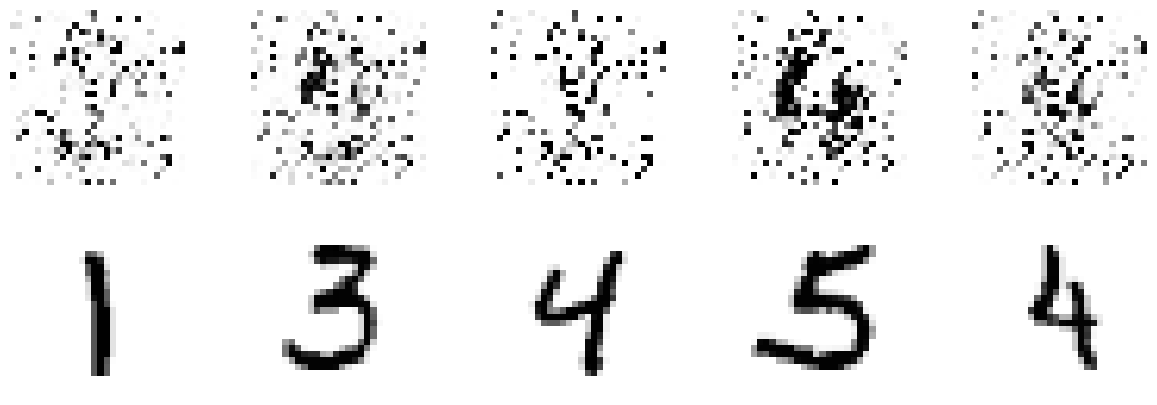

1/1 [==============================] - 0s 21ms/step
D loss:  0.9364238977432251
D accuracy:  0.484375
G loss:  3.5034618377685547


1/1 [==============================] - 0s 21ms/step
D loss:  0.34365060925483704
D accuracy:  0.90625
G loss:  2.277409553527832




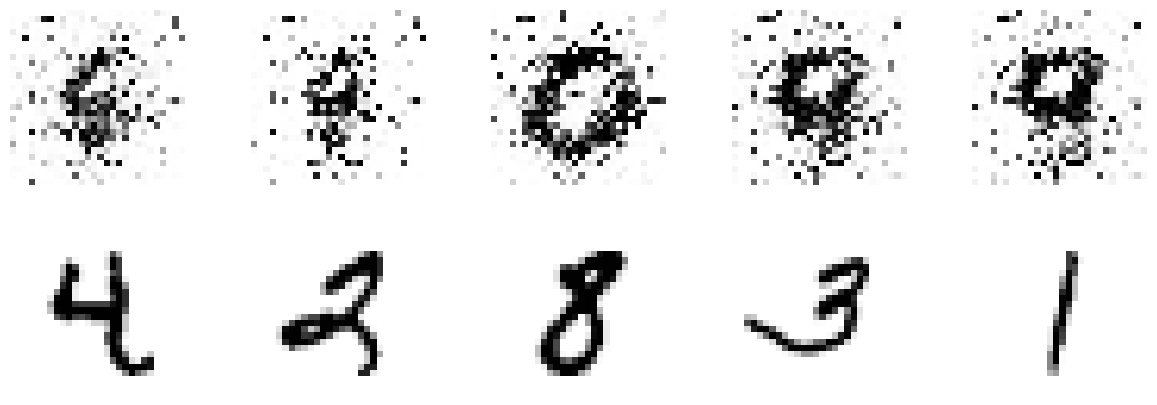

1/1 [==============================] - 0s 16ms/step
D loss:  0.03865043446421623
D accuracy:  1.0
G loss:  3.417901039123535


1/1 [==============================] - 0s 15ms/step
D loss:  0.13919443637132645
D accuracy:  0.96875
G loss:  2.9632248878479004




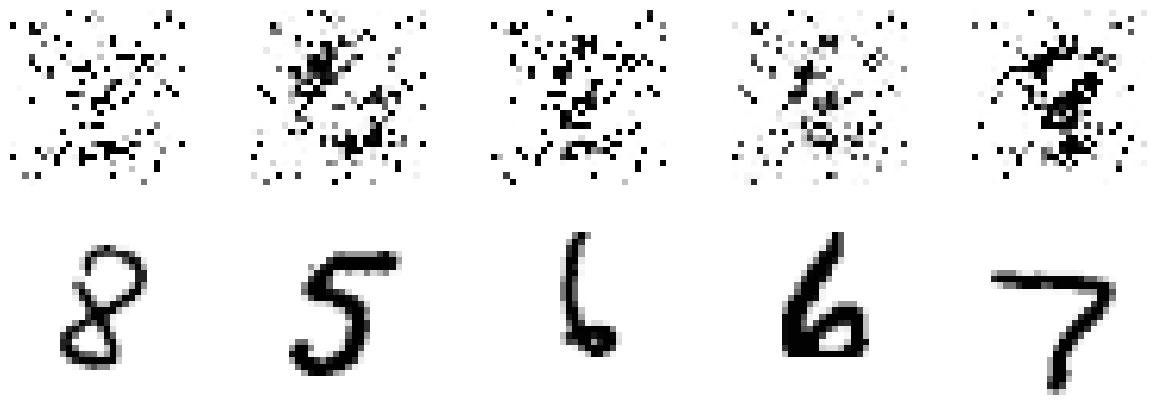

1/1 [==============================] - 0s 15ms/step
D loss:  1.3184487223625183
D accuracy:  0.46875
G loss:  4.16392183303833


1/1 [==============================] - 0s 17ms/step
D loss:  0.2563737891614437
D accuracy:  0.90625
G loss:  4.19215726852417




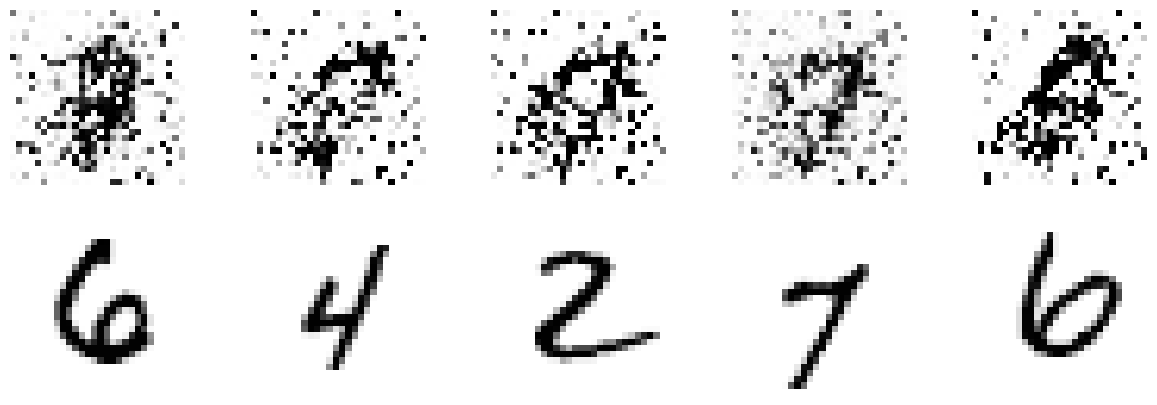

1/1 [==============================] - 0s 16ms/step
D loss:  0.03616582276299596
D accuracy:  1.0
G loss:  4.127824783325195


1/1 [==============================] - 0s 19ms/step
D loss:  0.7490051090717316
D accuracy:  0.421875
G loss:  1.5673375129699707




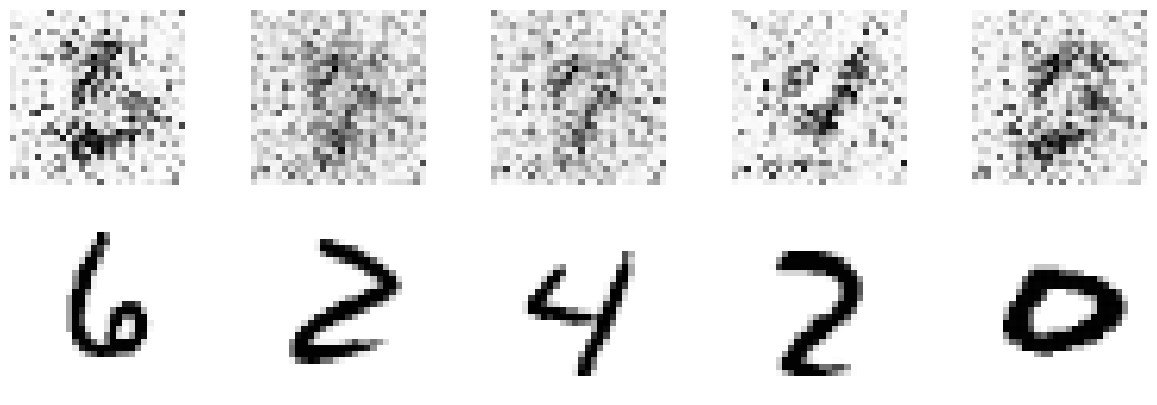

1/1 [==============================] - 0s 17ms/step
D loss:  0.15965116396546364
D accuracy:  0.984375
G loss:  2.2362756729125977


1/1 [==============================] - 0s 16ms/step
D loss:  0.8037631213665009
D accuracy:  0.4375
G loss:  1.8652026653289795




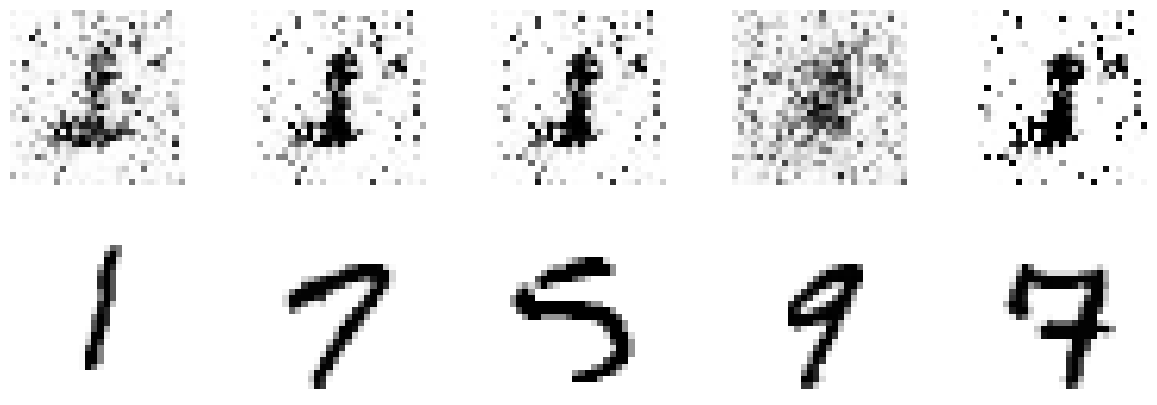

1/1 [==============================] - 0s 16ms/step
D loss:  0.5926320552825928
D accuracy:  0.671875
G loss:  1.824330449104309


1/1 [==============================] - 0s 20ms/step
D loss:  0.8162868022918701
D accuracy:  0.328125
G loss:  1.2089608907699585




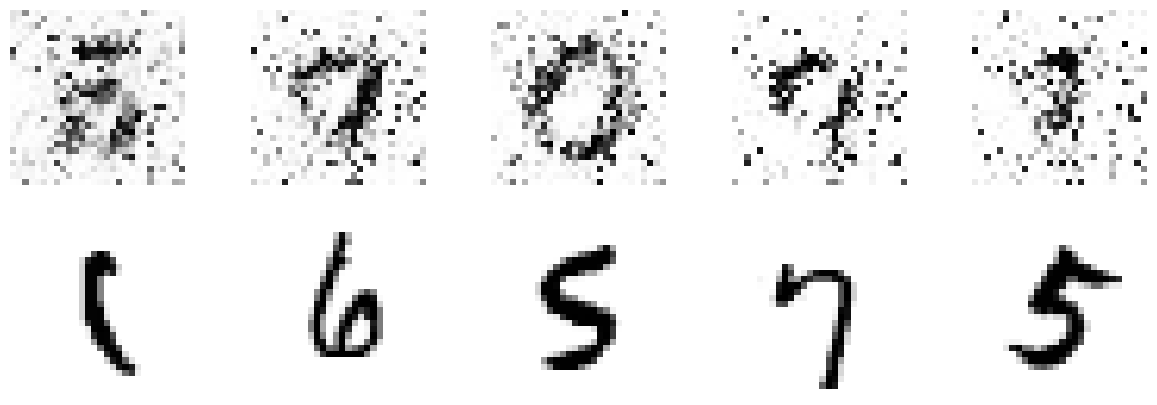

1/1 [==============================] - 0s 28ms/step
D loss:  0.9205153286457062
D accuracy:  0.46875
G loss:  1.5730223655700684


1/1 [==============================] - 0s 18ms/step
D loss:  0.28567370772361755
D accuracy:  0.875
G loss:  2.164539337158203




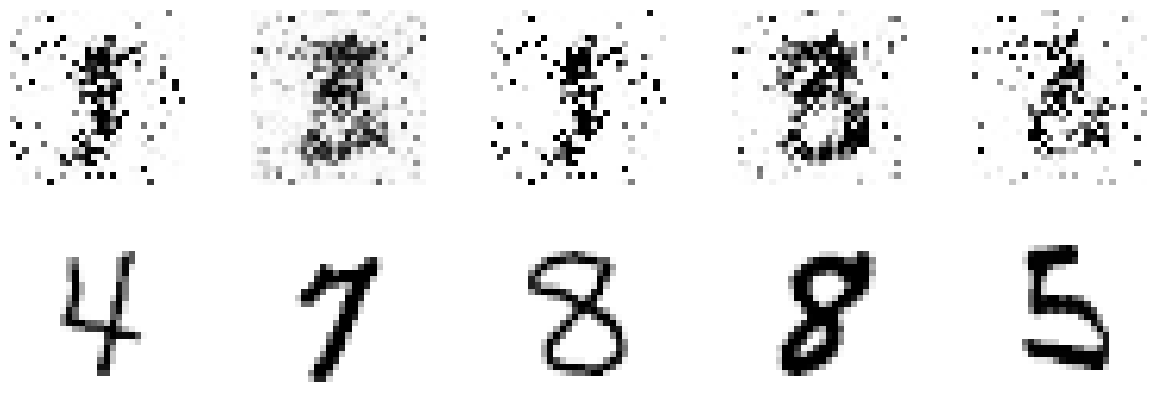

1/1 [==============================] - 0s 19ms/step
D loss:  0.18798767030239105
D accuracy:  0.984375
G loss:  2.0592567920684814


1/1 [==============================] - 0s 29ms/step
D loss:  0.7880553603172302
D accuracy:  0.53125
G loss:  2.612210512161255




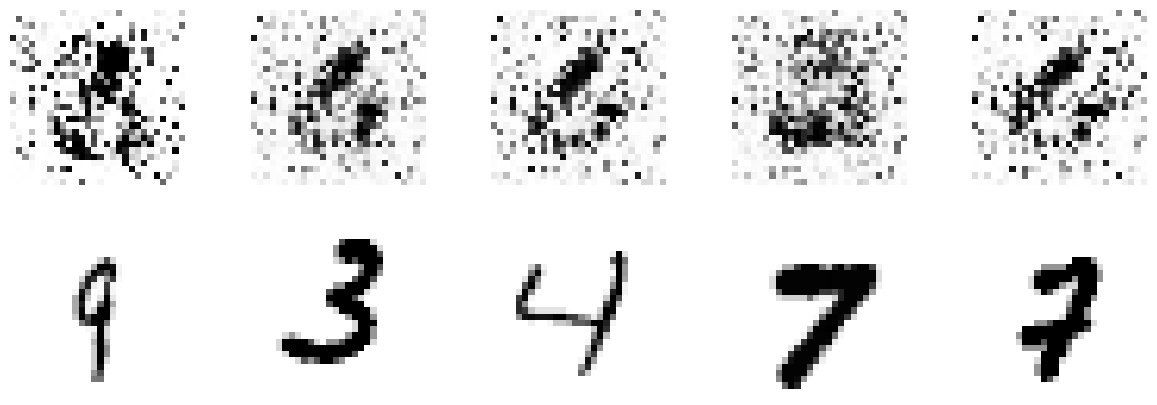

1/1 [==============================] - 0s 19ms/step
D loss:  0.37347549200057983
D accuracy:  0.828125
G loss:  2.203094482421875


1/1 [==============================] - 0s 22ms/step
D loss:  0.3601211756467819
D accuracy:  0.84375
G loss:  2.523998260498047




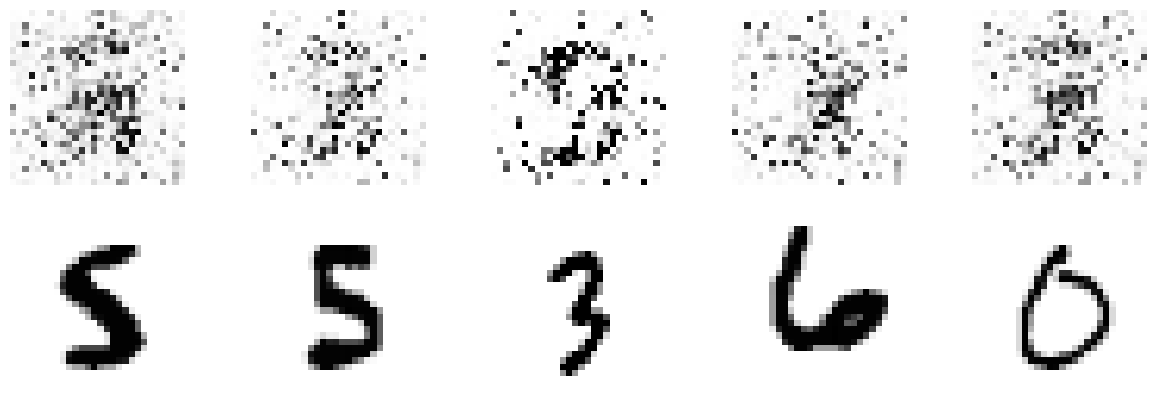

1/1 [==============================] - 0s 23ms/step
D loss:  0.09791170433163643
D accuracy:  0.984375
G loss:  2.7210068702697754


1/1 [==============================] - 0s 16ms/step
D loss:  0.9975349605083466
D accuracy:  0.3125
G loss:  1.4793111085891724




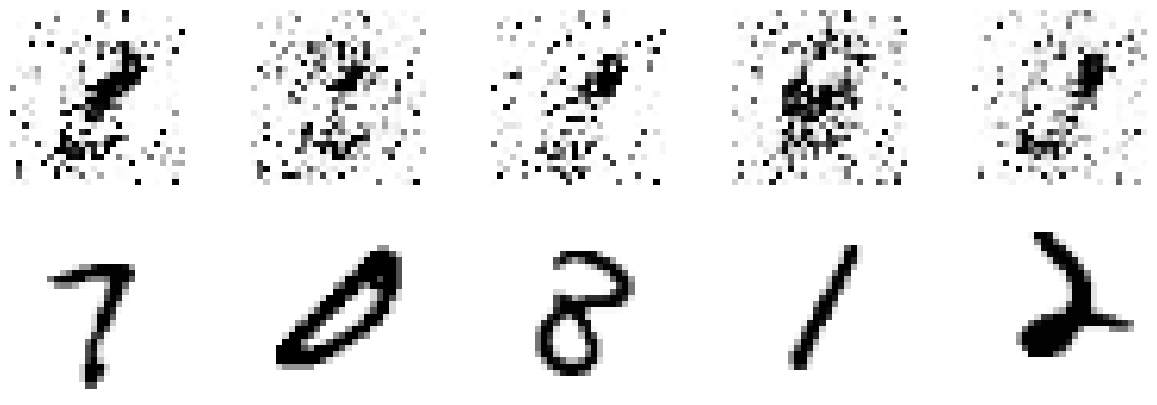

1/1 [==============================] - 0s 18ms/step
D loss:  0.3757021278142929
D accuracy:  0.921875
G loss:  1.7166774272918701


1/1 [==============================] - 0s 24ms/step
Epoch:  1
1/1 [==============================] - 0s 29ms/step
D loss:  0.7898301482200623
D accuracy:  0.625
G loss:  2.2533817291259766




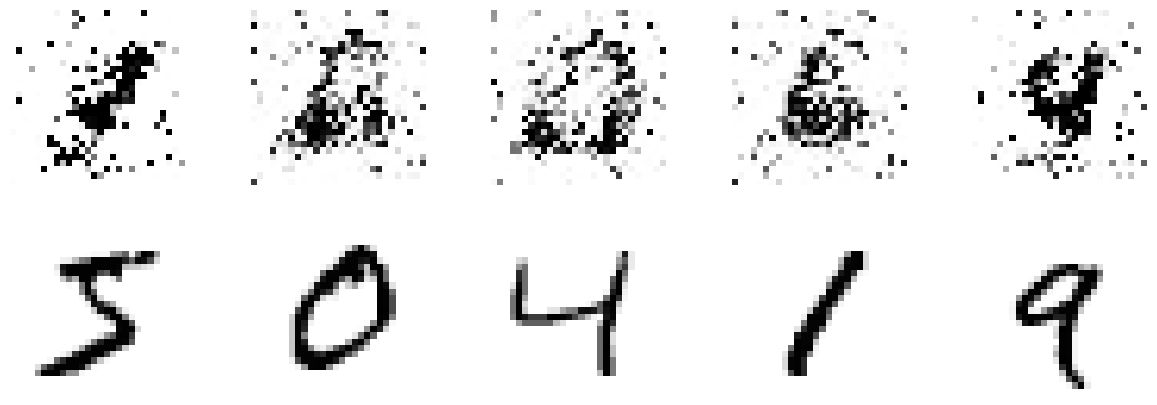

1/1 [==============================] - 0s 15ms/step
D loss:  0.09673798084259033
D accuracy:  1.0
G loss:  2.434091091156006


1/1 [==============================] - 0s 15ms/step
D loss:  0.5345425605773926
D accuracy:  0.734375
G loss:  2.21486496925354




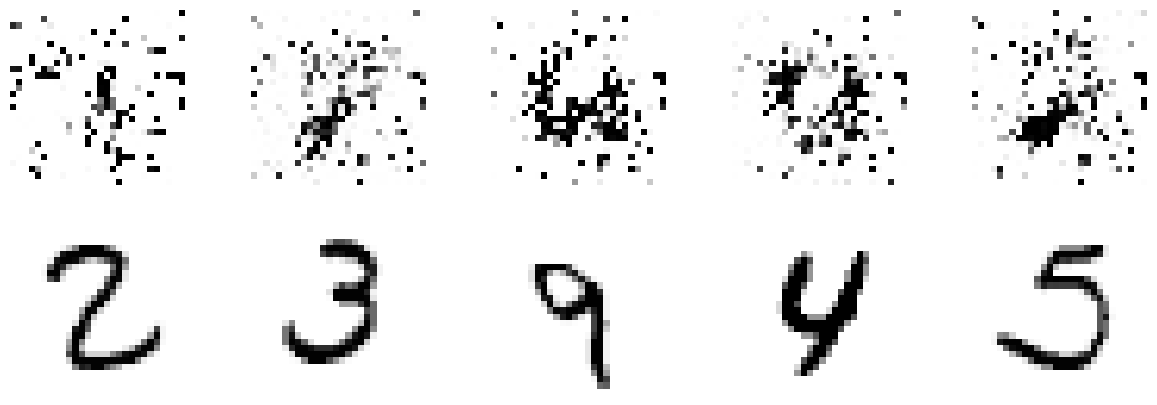

1/1 [==============================] - 0s 28ms/step
D loss:  0.30478449910879135
D accuracy:  0.90625
G loss:  2.598984956741333


1/1 [==============================] - 0s 16ms/step
D loss:  0.12127857655286789
D accuracy:  0.96875
G loss:  3.3528475761413574




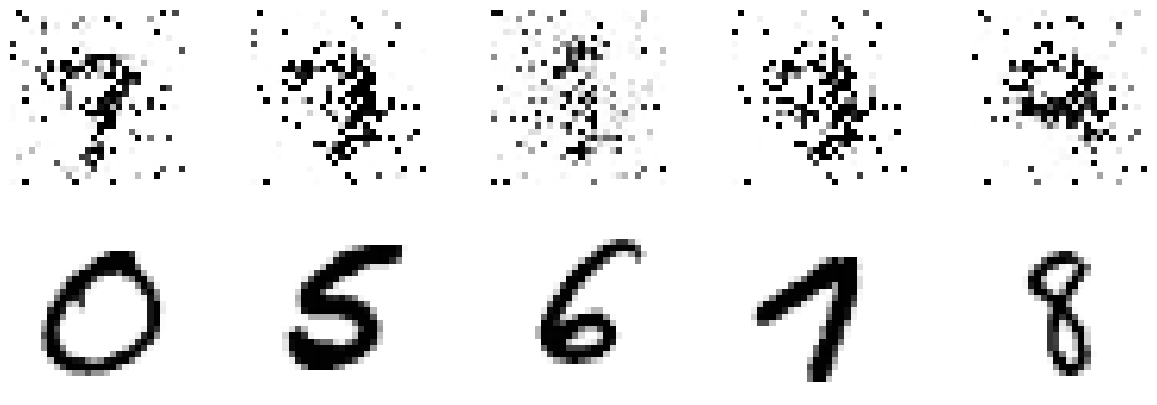

1/1 [==============================] - 0s 16ms/step
D loss:  0.6517211198806763
D accuracy:  0.640625
G loss:  2.549839496612549


1/1 [==============================] - 0s 23ms/step
D loss:  0.10808605328202248
D accuracy:  0.984375
G loss:  3.115341901779175




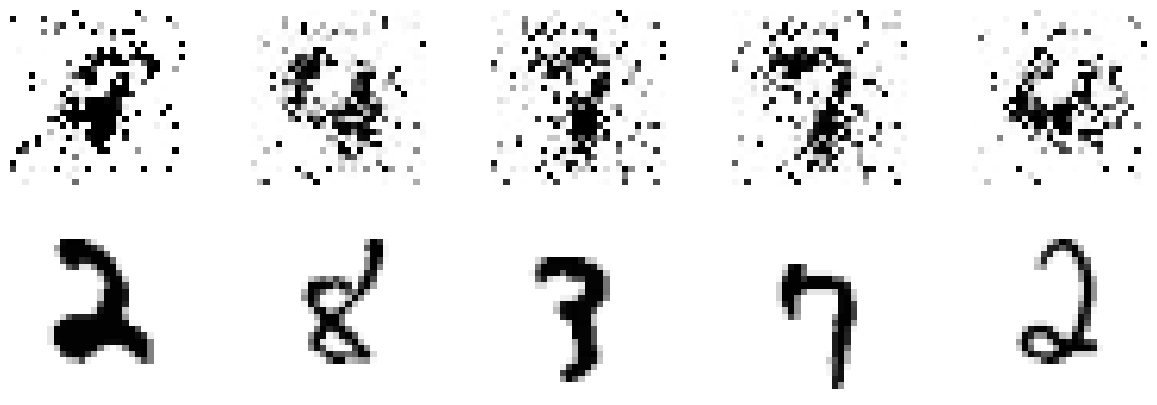

1/1 [==============================] - 0s 16ms/step
D loss:  0.3810247331857681
D accuracy:  0.890625
G loss:  3.279449701309204


1/1 [==============================] - 0s 15ms/step
D loss:  0.5513678789138794
D accuracy:  0.765625
G loss:  1.9065786600112915




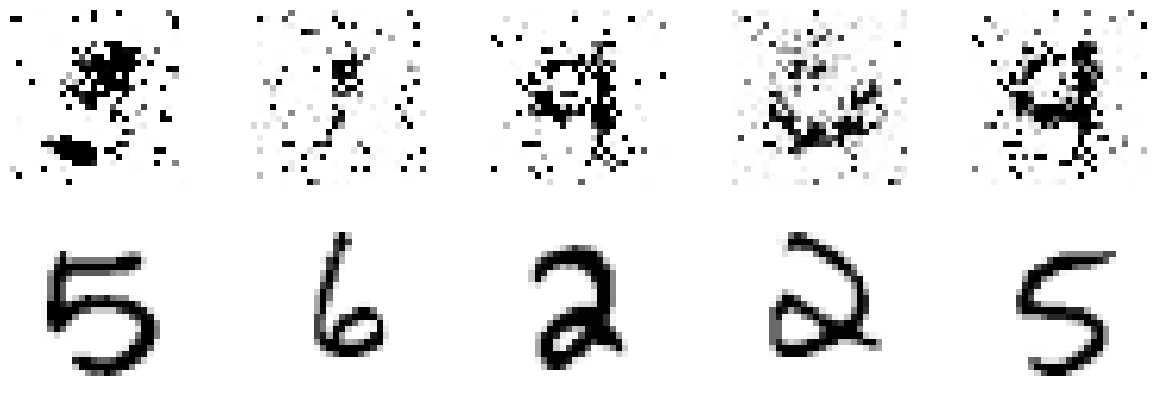

1/1 [==============================] - 0s 34ms/step
D loss:  0.37078770995140076
D accuracy:  0.84375
G loss:  1.9913036823272705


1/1 [==============================] - 0s 16ms/step
D loss:  0.4214703440666199
D accuracy:  0.8125
G loss:  2.2502846717834473




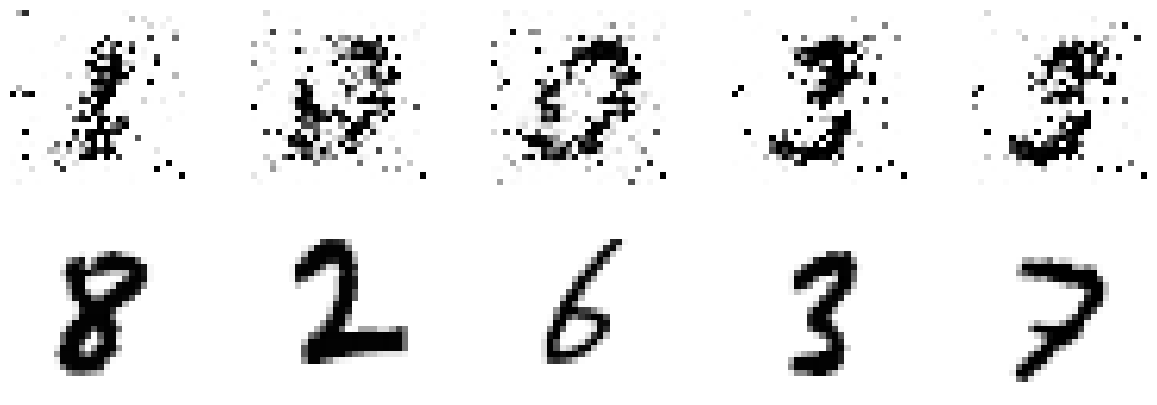

1/1 [==============================] - 0s 15ms/step
D loss:  0.3506247252225876
D accuracy:  0.8125
G loss:  2.3730289936065674


1/1 [==============================] - 0s 18ms/step
D loss:  0.5365486741065979
D accuracy:  0.765625
G loss:  1.8450003862380981




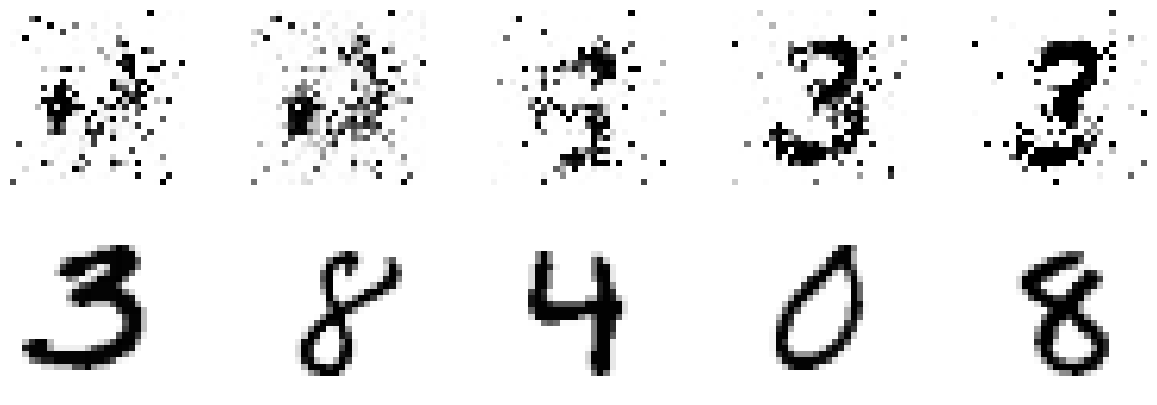

1/1 [==============================] - 0s 15ms/step
D loss:  0.11084204167127609
D accuracy:  1.0
G loss:  3.4001576900482178


1/1 [==============================] - 0s 16ms/step
D loss:  0.2336292415857315
D accuracy:  0.90625
G loss:  2.92116117477417




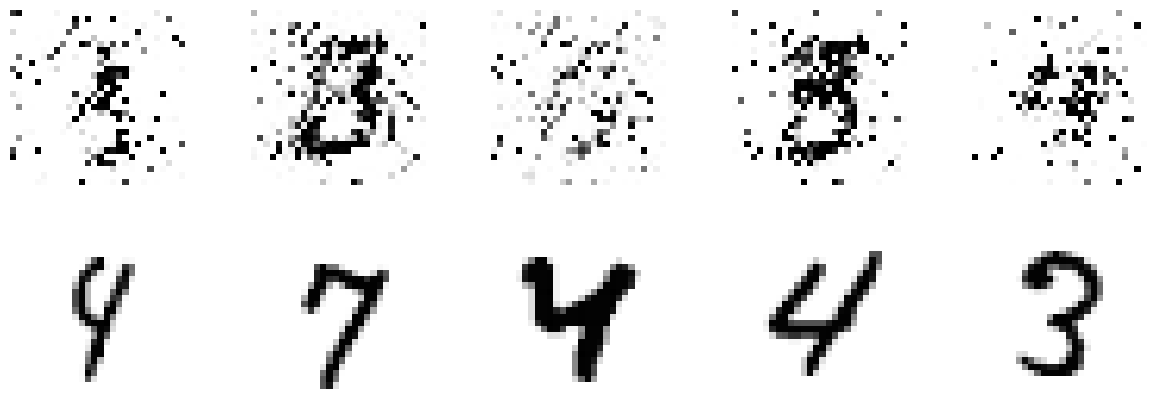

1/1 [==============================] - 0s 15ms/step
D loss:  0.23934418708086014
D accuracy:  0.90625
G loss:  2.2813868522644043


1/1 [==============================] - 0s 20ms/step
D loss:  0.49763351678848267
D accuracy:  0.796875
G loss:  2.924565076828003




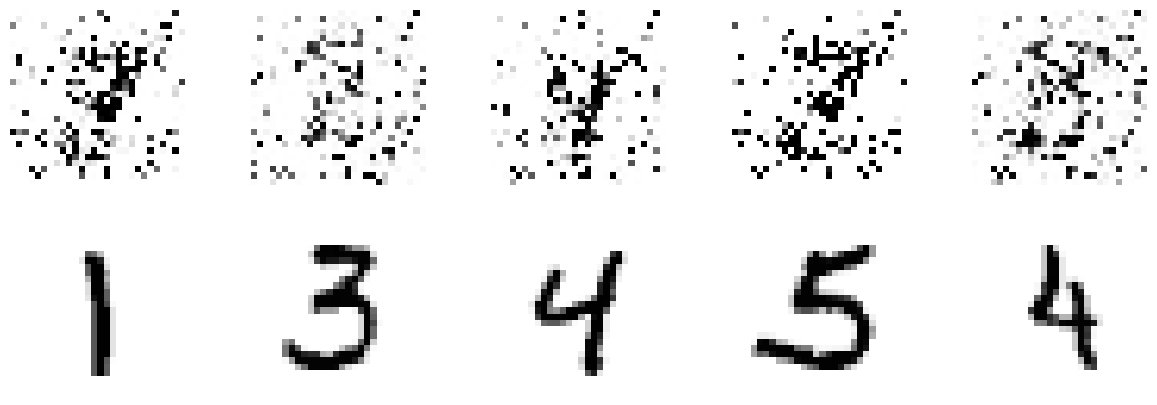

1/1 [==============================] - 0s 24ms/step
D loss:  0.3951231688261032
D accuracy:  0.84375
G loss:  3.1161930561065674


1/1 [==============================] - 0s 16ms/step
D loss:  0.4069495350122452
D accuracy:  0.84375
G loss:  3.2345070838928223




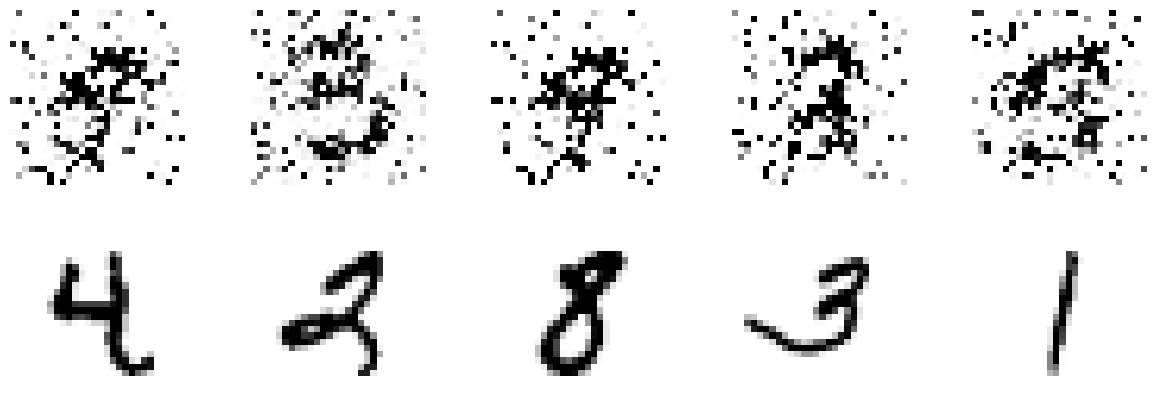

1/1 [==============================] - 0s 23ms/step
D loss:  0.6581785380840302
D accuracy:  0.640625
G loss:  2.4897069931030273


1/1 [==============================] - 0s 22ms/step
D loss:  0.2957487106323242
D accuracy:  0.921875
G loss:  1.8372344970703125




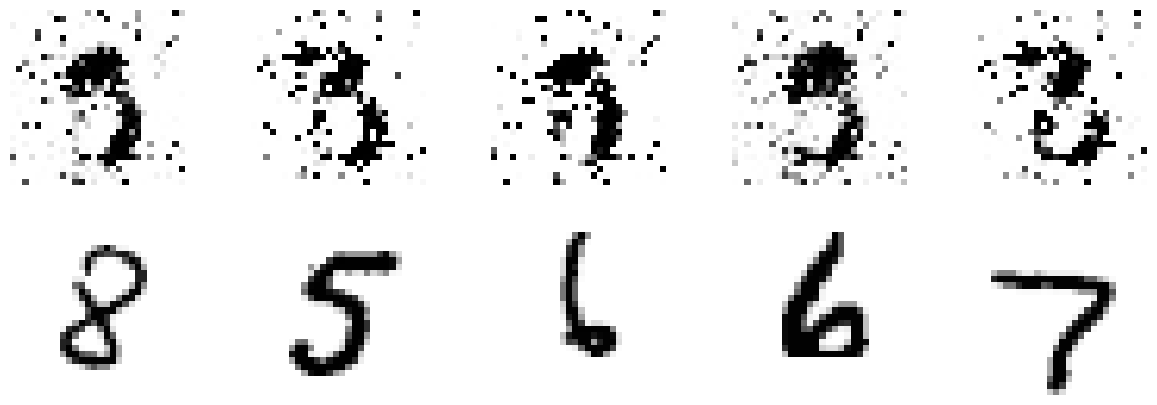

1/1 [==============================] - 0s 16ms/step
D loss:  0.27232784777879715
D accuracy:  0.921875
G loss:  2.5172410011291504


1/1 [==============================] - 0s 16ms/step
D loss:  0.5243744105100632
D accuracy:  0.78125
G loss:  2.1583235263824463




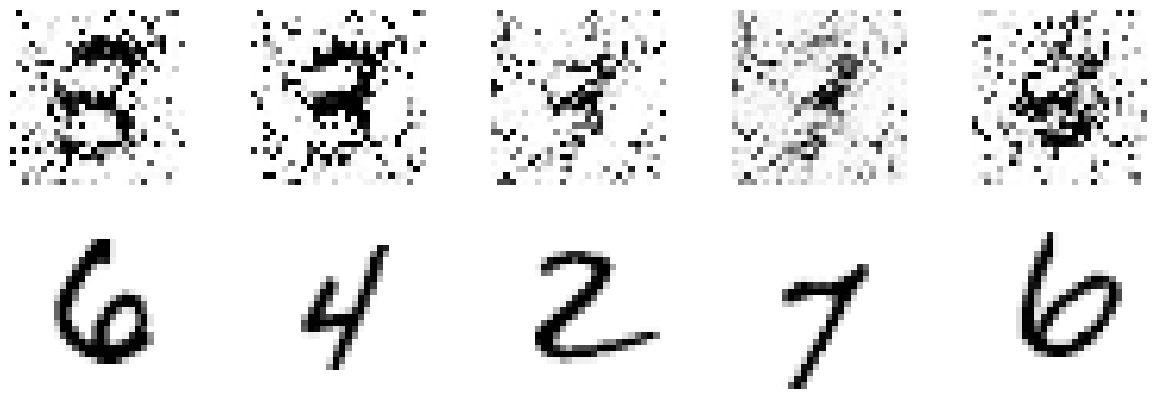

1/1 [==============================] - 0s 20ms/step
D loss:  0.6052871346473694
D accuracy:  0.671875
G loss:  2.2661752700805664


1/1 [==============================] - 0s 16ms/step
D loss:  0.5819874703884125
D accuracy:  0.671875
G loss:  1.1579875946044922




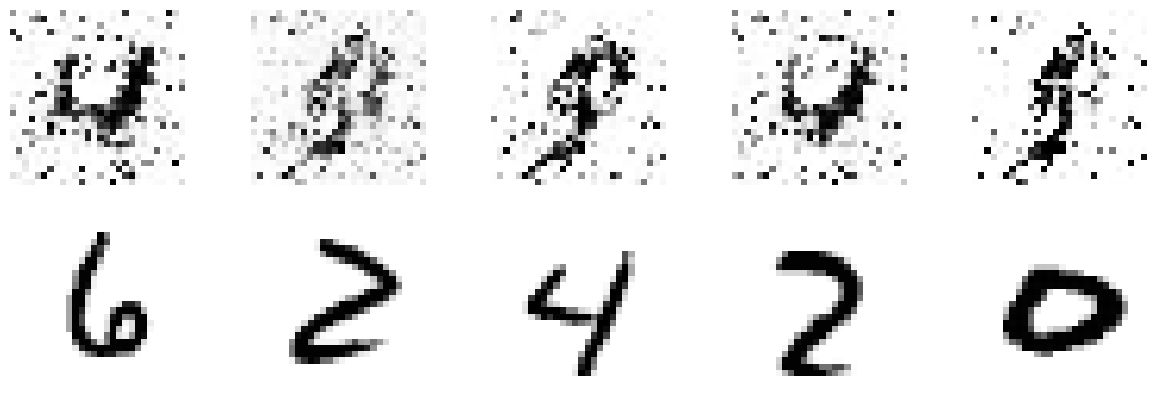

1/1 [==============================] - 0s 19ms/step
D loss:  0.7212796807289124
D accuracy:  0.65625
G loss:  1.4707318544387817


1/1 [==============================] - 0s 16ms/step
D loss:  0.24732625111937523
D accuracy:  0.921875
G loss:  3.295504570007324




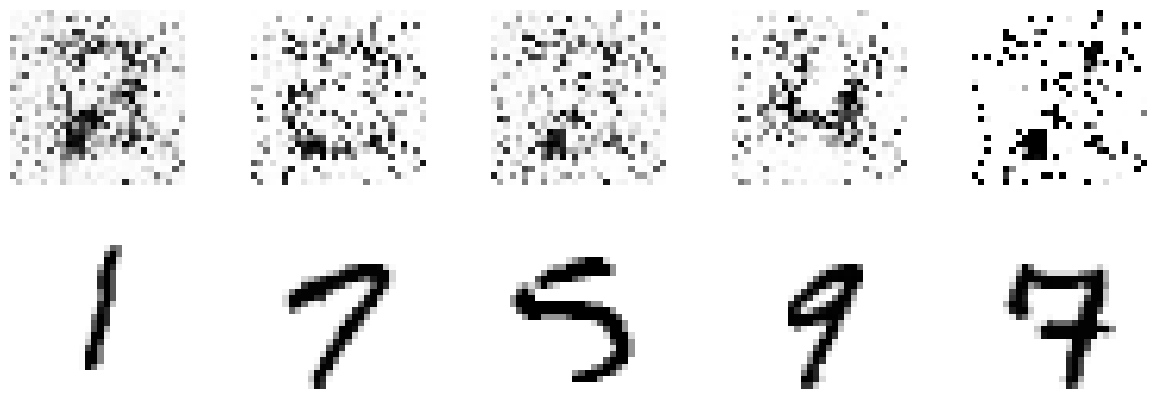

1/1 [==============================] - 0s 19ms/step
D loss:  1.742185354232788
D accuracy:  0.21875
G loss:  1.5153920650482178


1/1 [==============================] - 0s 28ms/step
D loss:  0.690514087677002
D accuracy:  0.71875
G loss:  2.0742831230163574




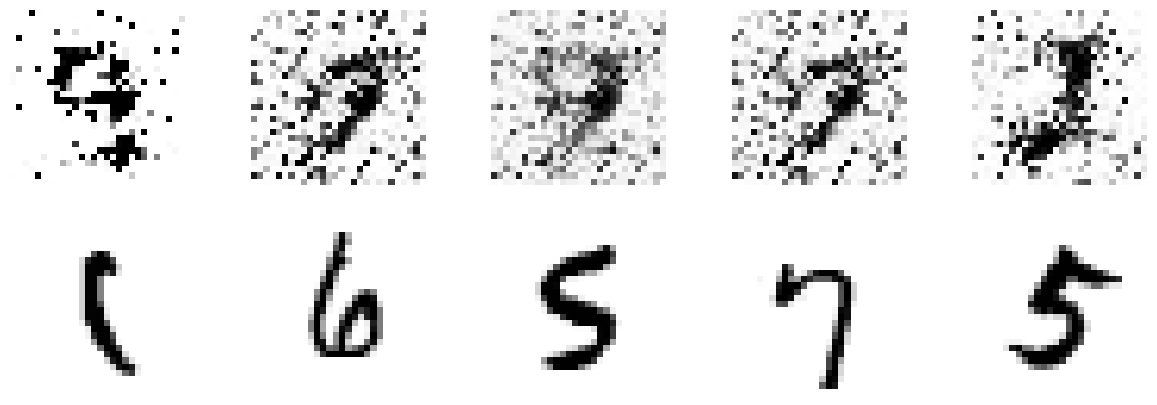

1/1 [==============================] - 0s 21ms/step
D loss:  0.9564119577407837
D accuracy:  0.34375
G loss:  1.3668897151947021


1/1 [==============================] - 0s 16ms/step
D loss:  0.5882210433483124
D accuracy:  0.625
G loss:  1.4339981079101562




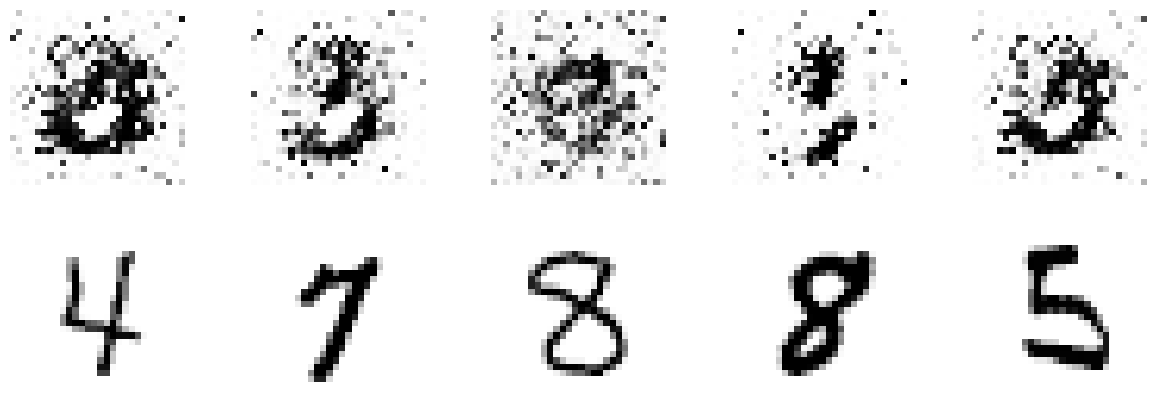

1/1 [==============================] - 0s 22ms/step
D loss:  0.711517870426178
D accuracy:  0.609375
G loss:  1.2641247510910034


1/1 [==============================] - 0s 15ms/step
D loss:  0.6117885112762451
D accuracy:  0.75
G loss:  1.4284663200378418




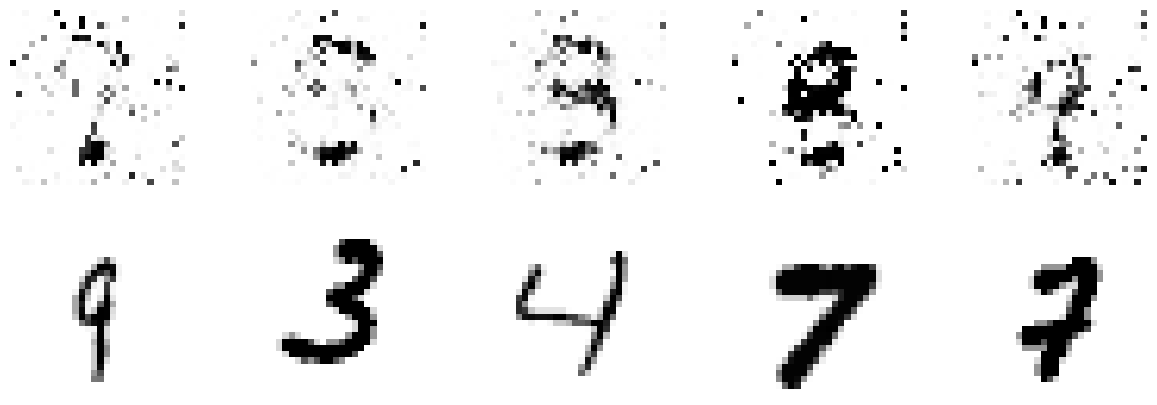

1/1 [==============================] - 0s 16ms/step
D loss:  0.5311730802059174
D accuracy:  0.6875
G loss:  1.4551836252212524


1/1 [==============================] - 0s 15ms/step
D loss:  0.6382501274347305
D accuracy:  0.578125
G loss:  2.0390448570251465




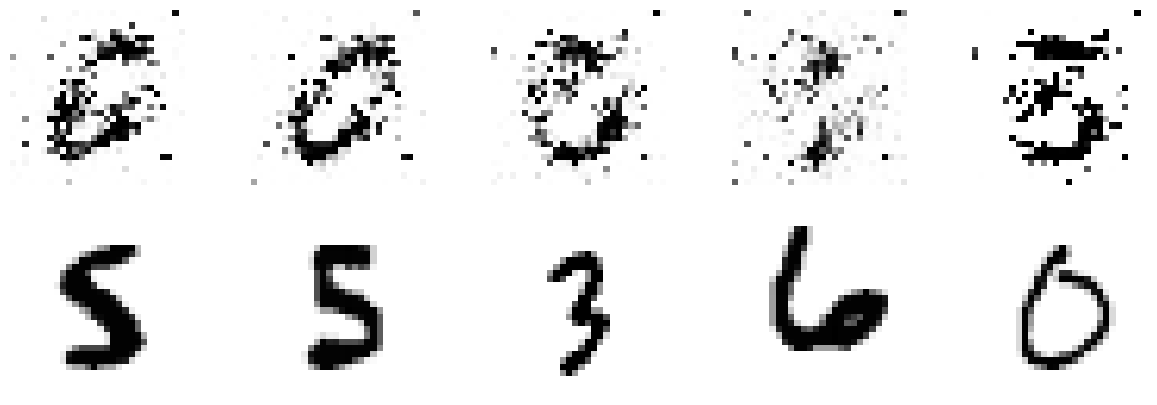

1/1 [==============================] - 0s 19ms/step
D loss:  0.992422878742218
D accuracy:  0.578125
G loss:  1.838913917541504


1/1 [==============================] - 0s 23ms/step
D loss:  0.15300504863262177
D accuracy:  1.0
G loss:  1.7887279987335205




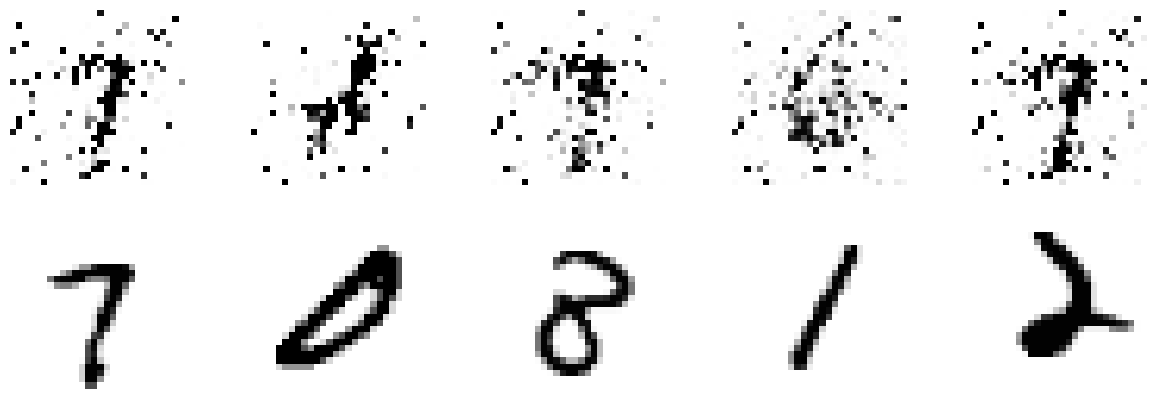

1/1 [==============================] - 0s 16ms/step
D loss:  0.6563758850097656
D accuracy:  0.609375
G loss:  1.6010493040084839


1/1 [==============================] - 0s 15ms/step
Epoch:  2
1/1 [==============================] - 0s 16ms/step
D loss:  0.23122012615203857
D accuracy:  0.921875
G loss:  2.216925859451294




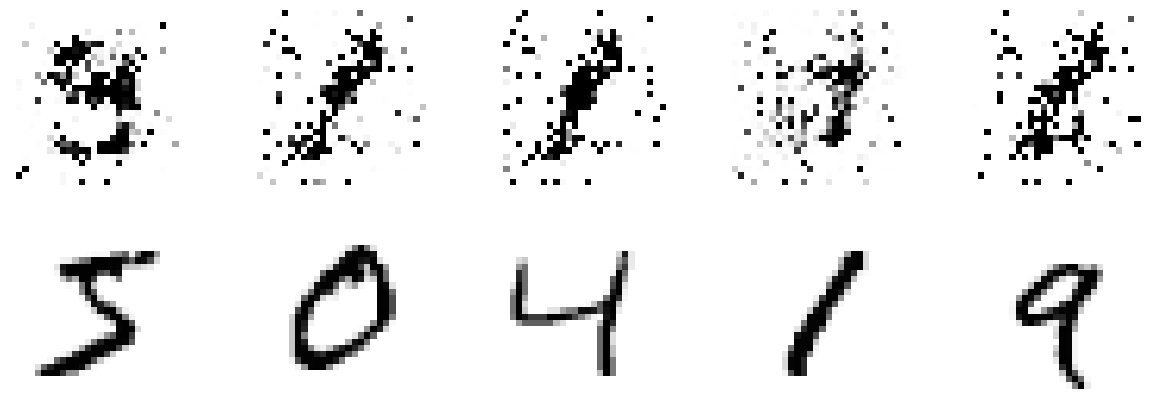

1/1 [==============================] - 0s 23ms/step
D loss:  0.160742349922657
D accuracy:  0.921875
G loss:  3.141903877258301


1/1 [==============================] - 0s 23ms/step
D loss:  0.541545033454895
D accuracy:  0.75
G loss:  2.2042179107666016




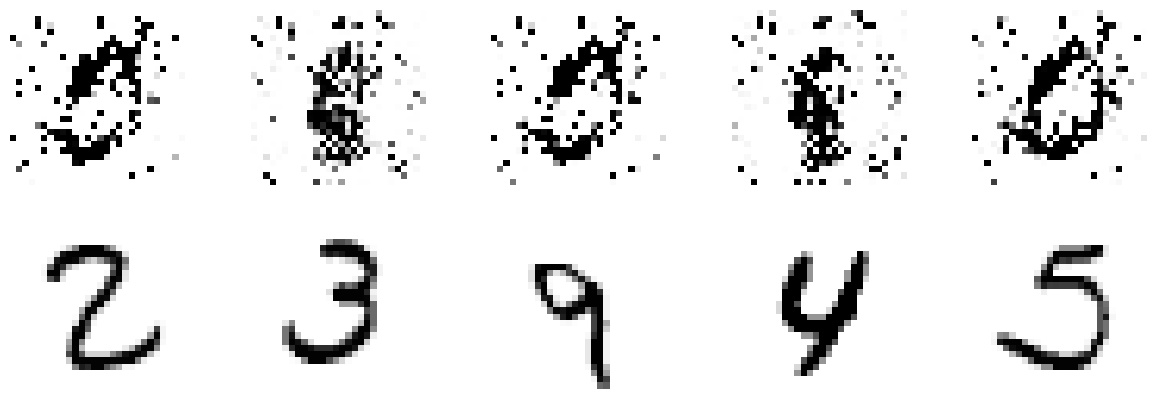

1/1 [==============================] - 0s 15ms/step
D loss:  0.2561101019382477
D accuracy:  0.9375
G loss:  1.889979362487793


1/1 [==============================] - 0s 22ms/step
D loss:  0.12414733320474625
D accuracy:  0.96875
G loss:  2.558854579925537




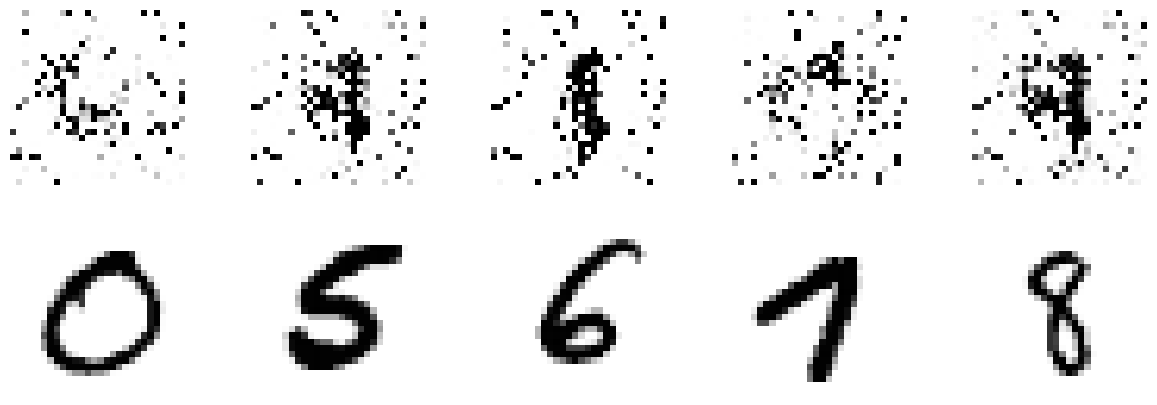

1/1 [==============================] - 0s 17ms/step
D loss:  0.04947890341281891
D accuracy:  1.0
G loss:  3.2378299236297607


1/1 [==============================] - 0s 17ms/step
D loss:  0.48823821544647217
D accuracy:  0.828125
G loss:  1.8716986179351807




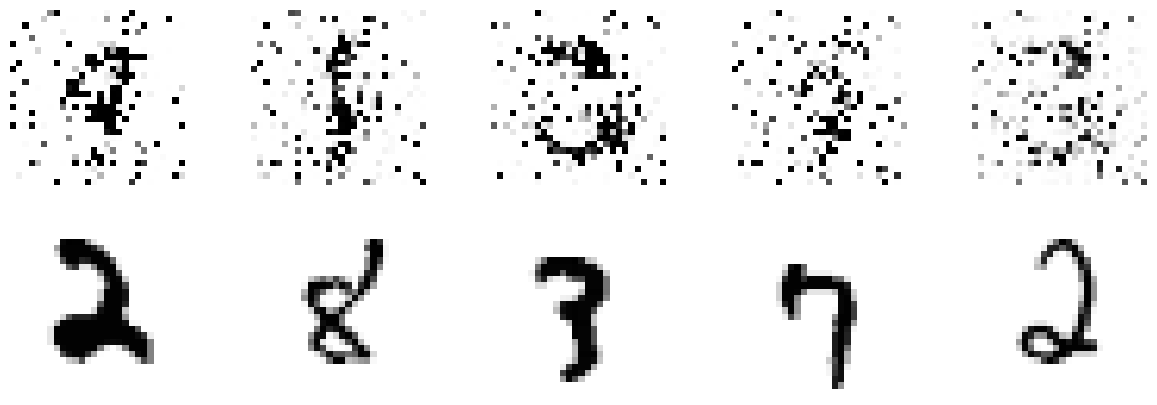

1/1 [==============================] - 0s 19ms/step
D loss:  0.7051830887794495
D accuracy:  0.609375
G loss:  1.5747003555297852


1/1 [==============================] - 0s 17ms/step
D loss:  0.5900389850139618
D accuracy:  0.65625
G loss:  1.541452407836914




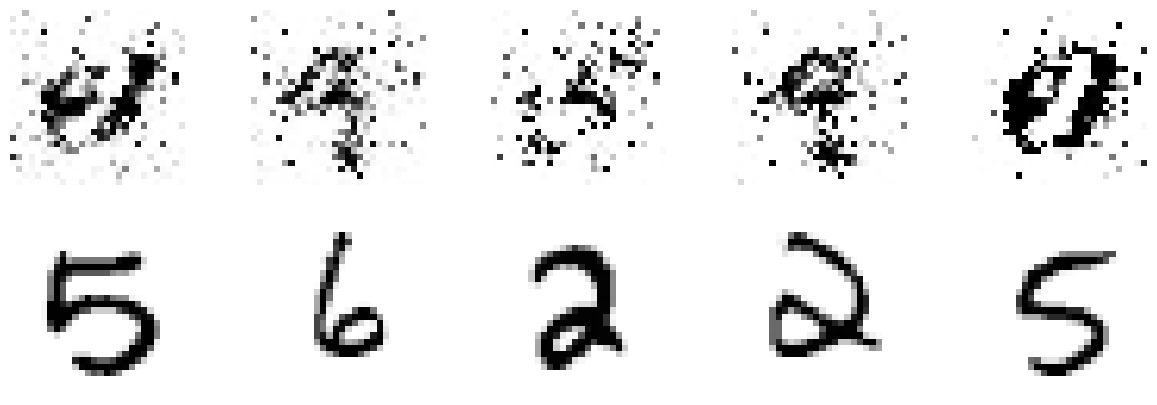

1/1 [==============================] - 0s 15ms/step
D loss:  0.6901556253433228
D accuracy:  0.5625
G loss:  1.2500908374786377


1/1 [==============================] - 0s 15ms/step
D loss:  0.13390724267810583
D accuracy:  0.984375
G loss:  2.0371265411376953




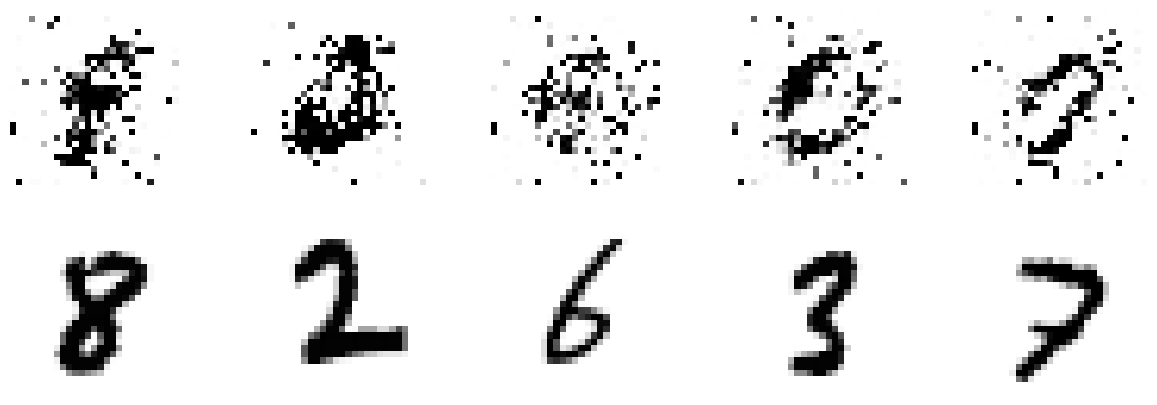

1/1 [==============================] - 0s 17ms/step
D loss:  0.7477825284004211
D accuracy:  0.546875
G loss:  4.710302352905273


1/1 [==============================] - 0s 24ms/step
D loss:  0.5980576127767563
D accuracy:  0.625
G loss:  1.51083505153656




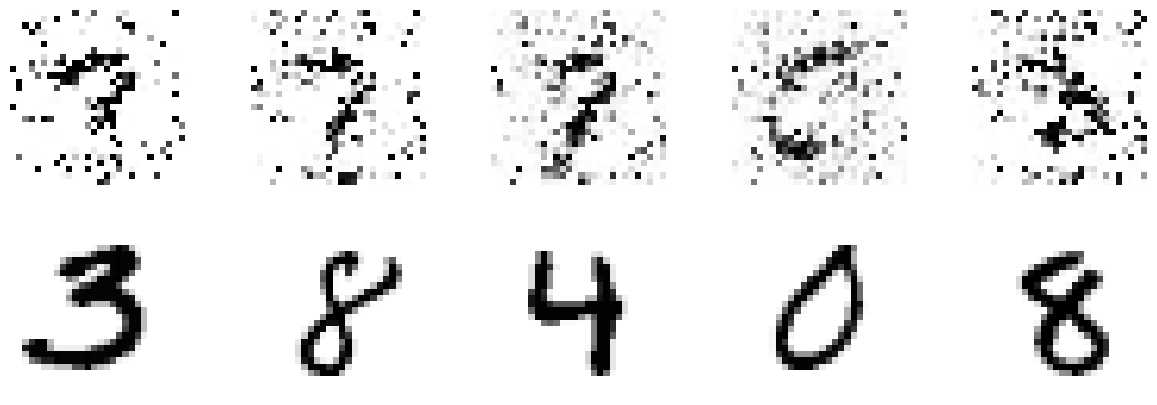

1/1 [==============================] - 0s 15ms/step
D loss:  0.760620653629303
D accuracy:  0.484375
G loss:  1.807856798171997


1/1 [==============================] - 0s 20ms/step
D loss:  0.7887060940265656
D accuracy:  0.59375
G loss:  1.4262336492538452




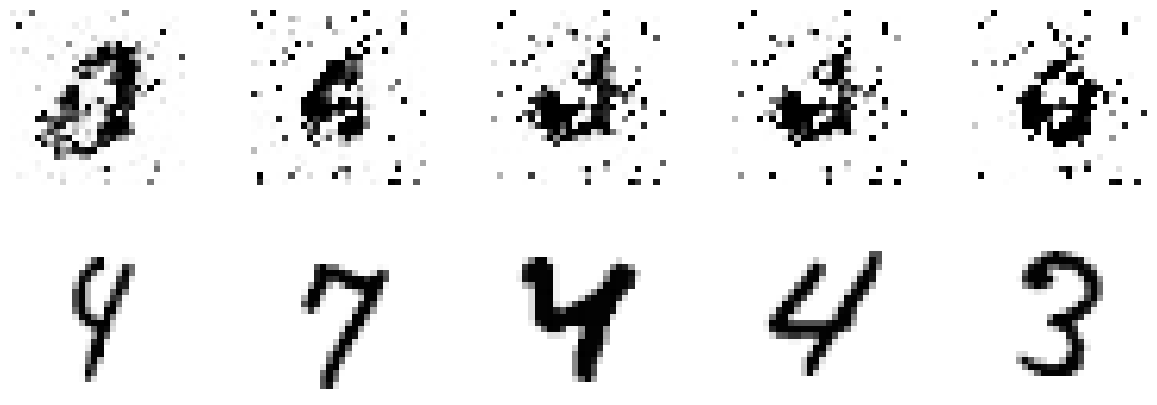

1/1 [==============================] - 0s 24ms/step
D loss:  0.23196088522672653
D accuracy:  0.90625
G loss:  1.81473970413208


1/1 [==============================] - 0s 28ms/step
D loss:  0.658287987112999
D accuracy:  0.75
G loss:  5.5339460372924805




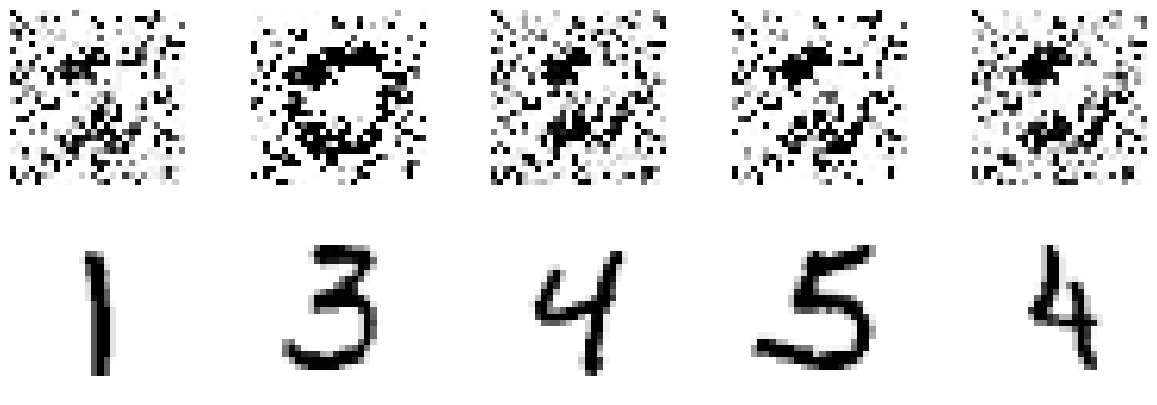

1/1 [==============================] - 0s 16ms/step
D loss:  0.6702718436717987
D accuracy:  0.65625
G loss:  1.3145527839660645


1/1 [==============================] - 0s 20ms/step
D loss:  0.5318852066993713
D accuracy:  0.765625
G loss:  1.4405958652496338




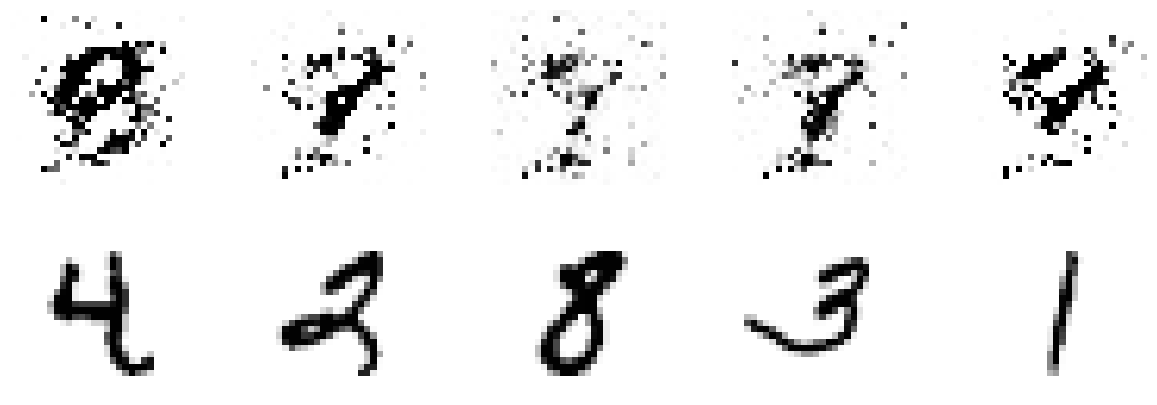

1/1 [==============================] - 0s 15ms/step
D loss:  0.5739137232303619
D accuracy:  0.703125
G loss:  1.3825197219848633


1/1 [==============================] - 0s 24ms/step
D loss:  0.5798372030258179
D accuracy:  0.609375
G loss:  1.4314899444580078




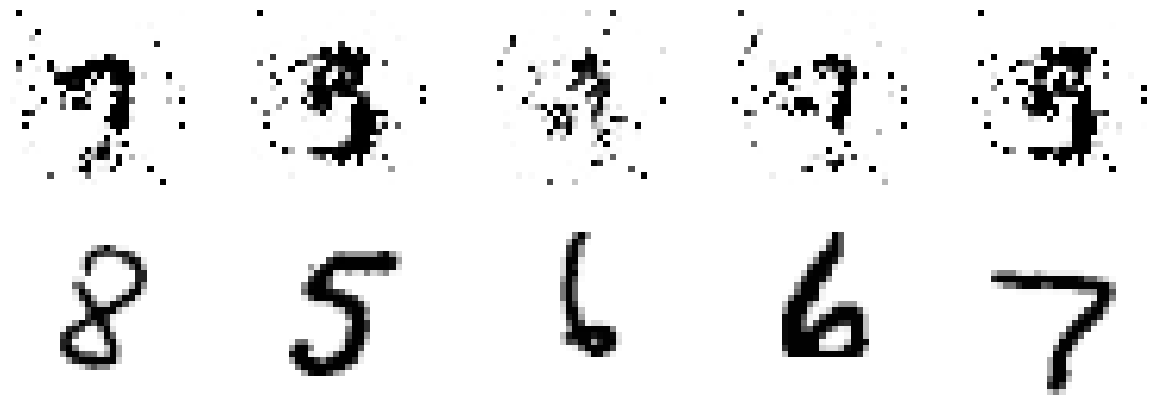

1/1 [==============================] - 0s 21ms/step
D loss:  0.003980018606931424
D accuracy:  1.0
G loss:  7.846622467041016


1/1 [==============================] - 0s 16ms/step


KeyboardInterrupt: ignored

In [ ]:
D_LOSS_REGULARIZER=D_LOSS
G_LOSS_REGULARIZER=G_LOSS
D_LOSS=[]
G_LOSS=[]
train(X_train,generator,discriminator,combined,epochs=10,batch_size=32,sample_interval=100)

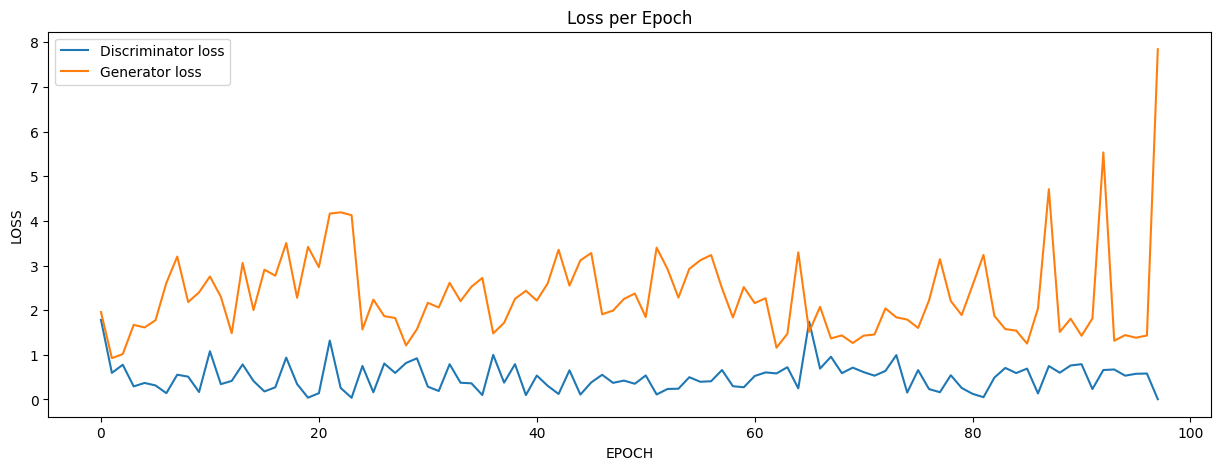

In [ ]:
plt.plot(D_LOSS)
plt.plot(G_LOSS)
plt.title('Loss per Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['Discriminator loss', 'Generator loss'], loc='upper left')
plt.show()

Podemos observar que no tenemos ni Gradient explosion ni Gradient Vanishing y se observa que el resultado es mejor que en los anteriores.

##BatchNormalization

Vamos a aplicar BatchNormalization en las primeras capas del generador y del discriminador.

In [ ]:
def create_generator():
  input=Input(shape=(100))
  x=Dense(64,activation='relu',kernel_initializer=HeNormal())(input)
  x=BatchNormalization()(x)
  x=Dense(128,activation='relu',kernel_initializer=HeNormal())(x)
  x=Dense(512,activation='relu', kernel_initializer=HeNormal())(x)
  x=Dense(1024,activation='relu', kernel_initializer=HeNormal())(x)

  x=Dense(28*28,activation='tanh')(x)


  output=Reshape((28,28,1)) (x)
  generator=Model(input,output)
  return generator

In [ ]:
generator=create_generator()

In [ ]:
def create_discriminator():
  input=Input(shape=(28,28,1))

  x=Flatten()(input)

  x=Dense(512,activation='relu', kernel_initializer=HeNormal())(x)
  x=BatchNormalization()(x)
  x=Dense(128,activation='relu',kernel_initializer=HeNormal())(x)
  x=Dense(64,activation='relu',kernel_initializer=HeNormal())(x)

  output=Dense(1,activation='sigmoid')(x)

  discriminator=Model(input,output)
  return discriminator

In [ ]:
discriminator=create_discriminator()

In [ ]:
discriminator.compile(loss='binary_crossentropy',metrics=['accuracy'])
discriminator.trainable=False

z=Input(shape=(100,))
img=generator(z)
validity=discriminator(img)

combined=Model(z,validity)
combined.compile(loss='binary_crossentropy')

Epoch:  0
1/1 [==============================] - 0s 80ms/step
D loss:  1.2374164462089539
D accuracy:  0.25
G loss:  0.6122304201126099




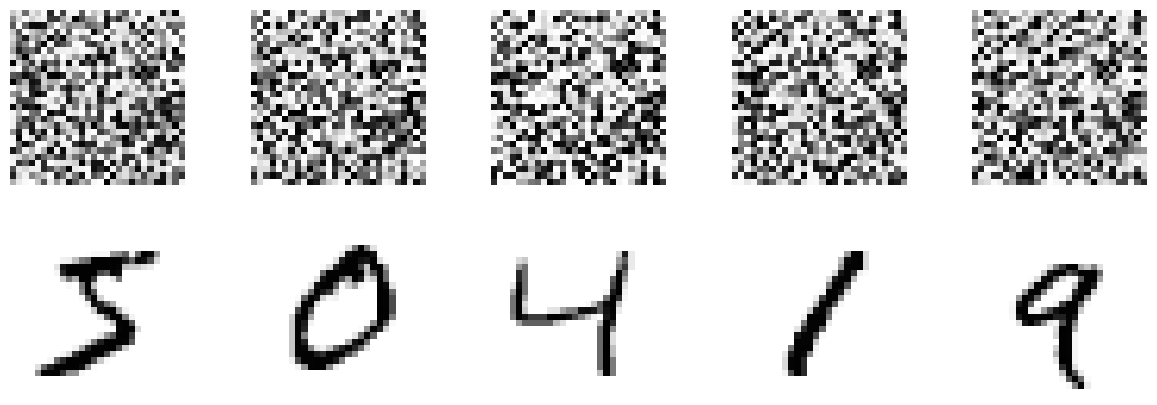

1/1 [==============================] - 0s 22ms/step
D loss:  0.002793296007439494
D accuracy:  1.0
G loss:  0.00011063270358135924


1/1 [==============================] - 0s 18ms/step
D loss:  8.285096919280477e-05
D accuracy:  1.0
G loss:  4.3254253796476405e-06




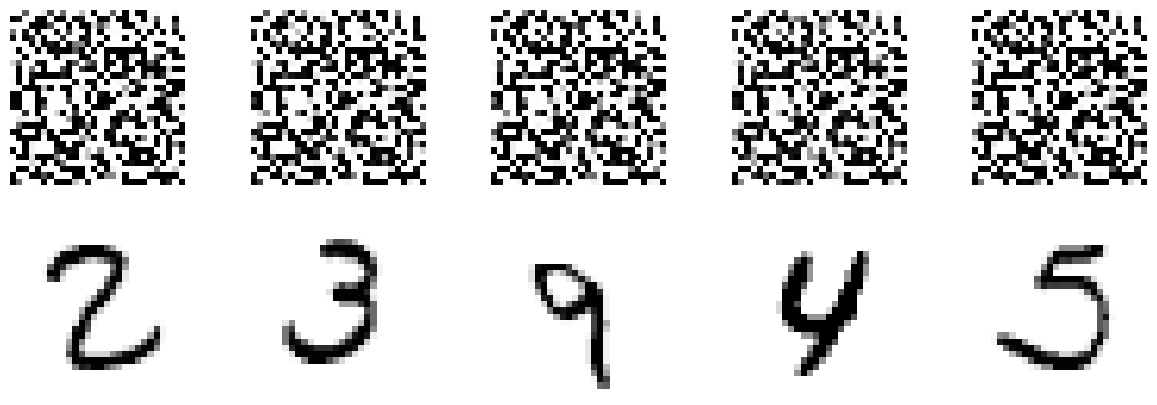

1/1 [==============================] - 0s 18ms/step
D loss:  0.0001854043839557562
D accuracy:  1.0
G loss:  1.2083951332897414e-06


1/1 [==============================] - 0s 27ms/step
D loss:  0.0002434376566498031
D accuracy:  1.0
G loss:  1.953749688254902e-06




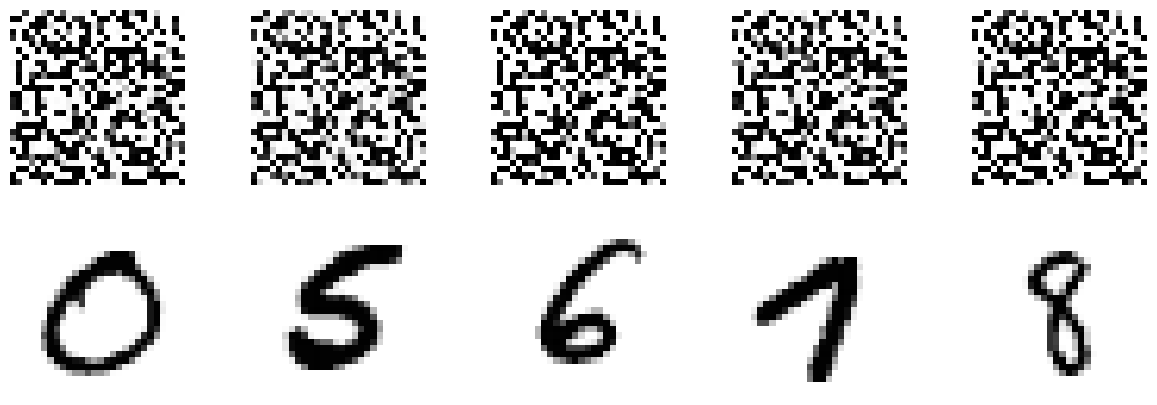

1/1 [==============================] - 0s 16ms/step
D loss:  2.2513029762194492e-05
D accuracy:  1.0
G loss:  1.0530781082707108e-06


1/1 [==============================] - 0s 15ms/step
D loss:  1.3886251053918386e-05
D accuracy:  1.0
G loss:  6.312431821697828e-08




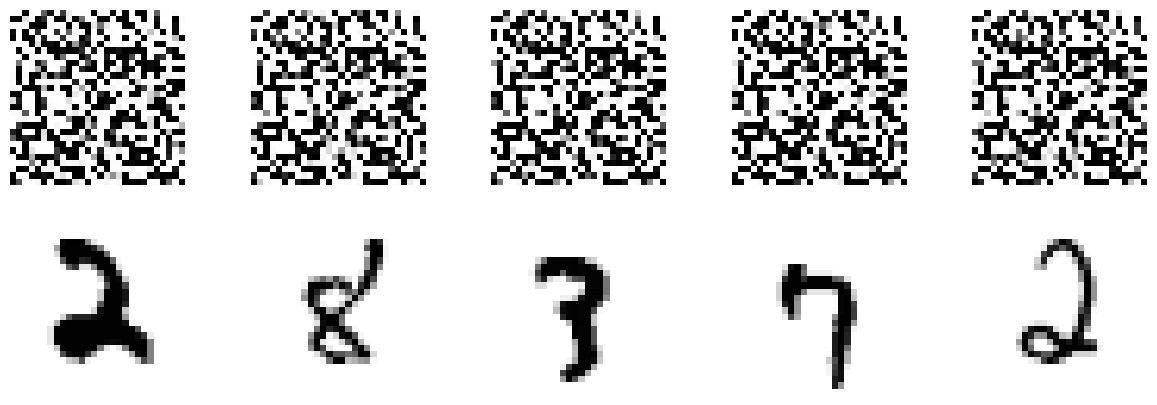

1/1 [==============================] - 0s 24ms/step
D loss:  8.213392334255332e-06
D accuracy:  1.0
G loss:  3.371559031961624e-08


1/1 [==============================] - 0s 17ms/step
D loss:  1.0701397513912525e-05
D accuracy:  1.0
G loss:  1.1344130967927413e-08




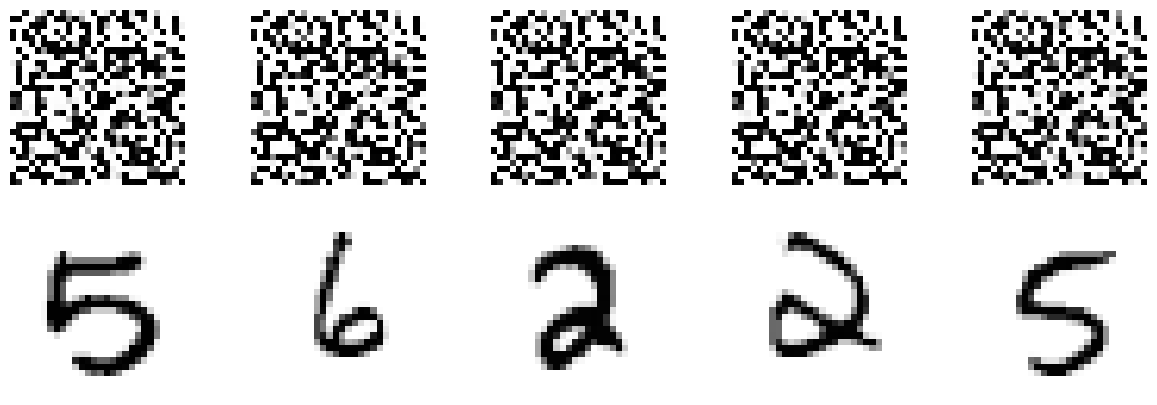

1/1 [==============================] - 0s 18ms/step
D loss:  1.9100422150586382e-05
D accuracy:  1.0
G loss:  7.175347604970739e-08


1/1 [==============================] - 0s 22ms/step
D loss:  6.601466793654254e-06
D accuracy:  1.0
G loss:  5.325127006017283e-08




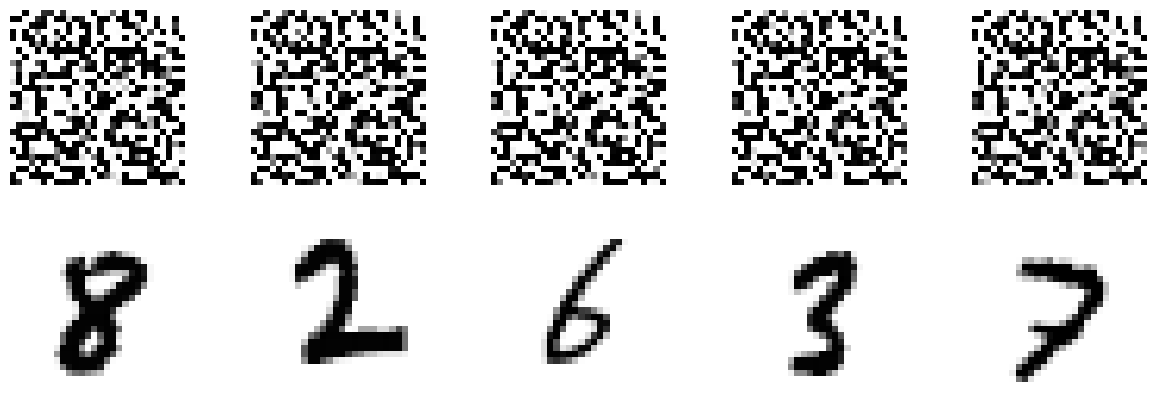

1/1 [==============================] - 0s 17ms/step
D loss:  1.300703434026218e-05
D accuracy:  1.0
G loss:  9.44316340678597e-08


1/1 [==============================] - 0s 18ms/step
D loss:  3.8139751339372197e-06
D accuracy:  1.0
G loss:  8.59353548321451e-08




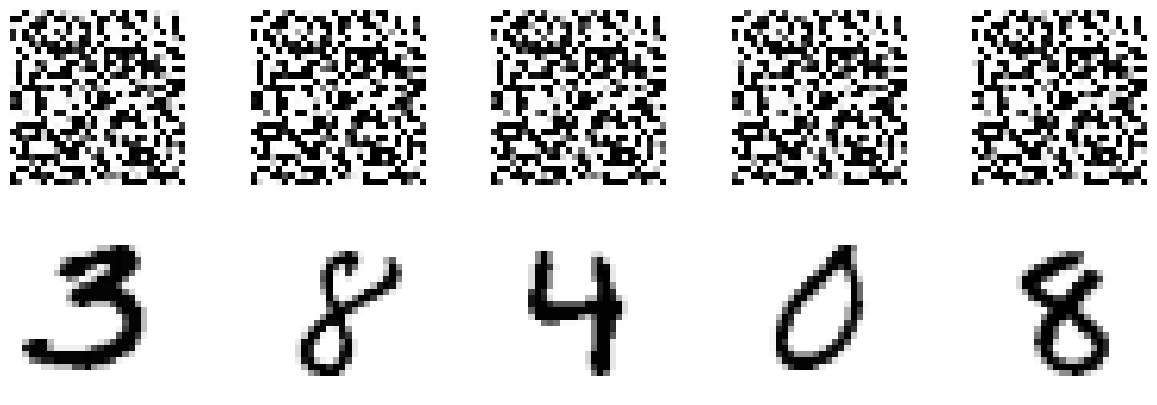

1/1 [==============================] - 0s 21ms/step
D loss:  9.45185896839007e-06
D accuracy:  1.0
G loss:  1.78824706154046e-07


1/1 [==============================] - 0s 15ms/step
D loss:  2.2496882081668446e-06
D accuracy:  1.0
G loss:  1.5586113732979356e-08




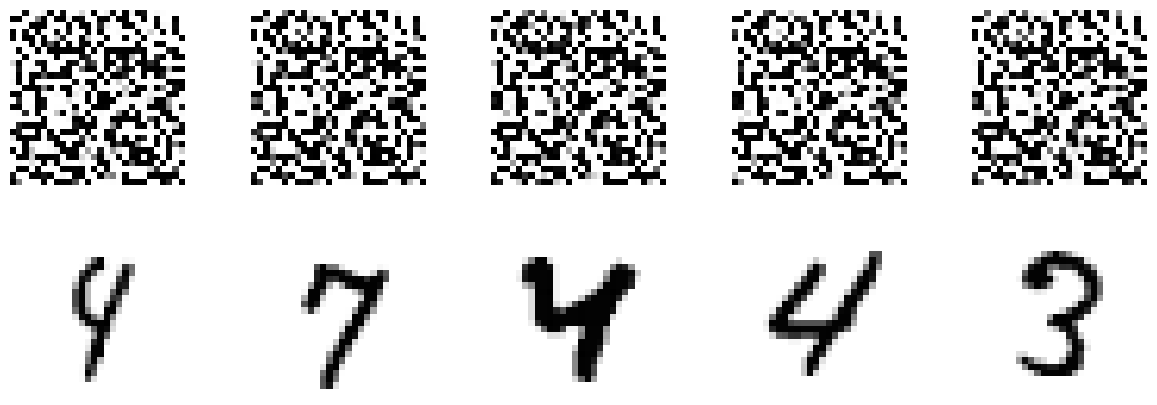

1/1 [==============================] - 0s 16ms/step
D loss:  1.552496058820907e-06
D accuracy:  1.0
G loss:  1.0260749583324014e-08


1/1 [==============================] - 0s 21ms/step
D loss:  3.3444030577811645e-05
D accuracy:  1.0
G loss:  3.2194545838137856e-06




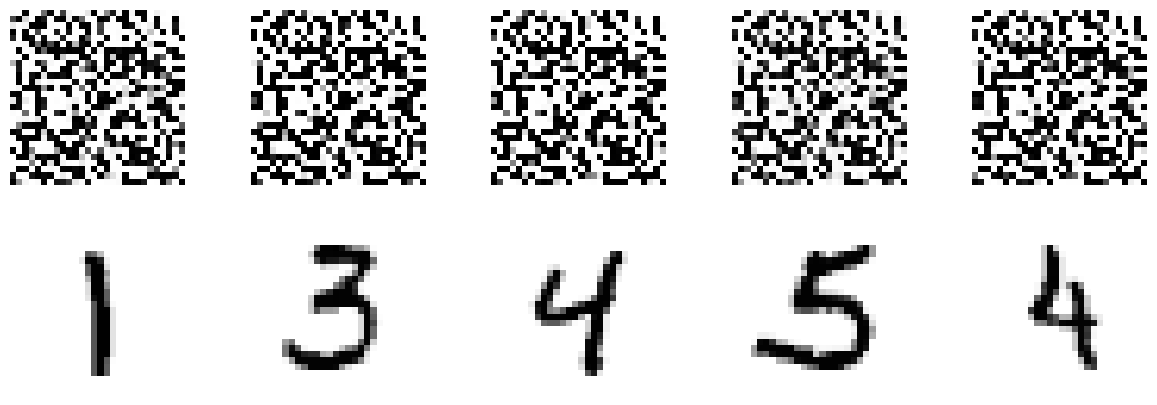

1/1 [==============================] - 0s 20ms/step
D loss:  3.3596004413993796e-06
D accuracy:  1.0
G loss:  2.8539659524540184e-07


1/1 [==============================] - 0s 17ms/step
D loss:  2.511515049263835e-06
D accuracy:  1.0
G loss:  6.224132320653553e-09




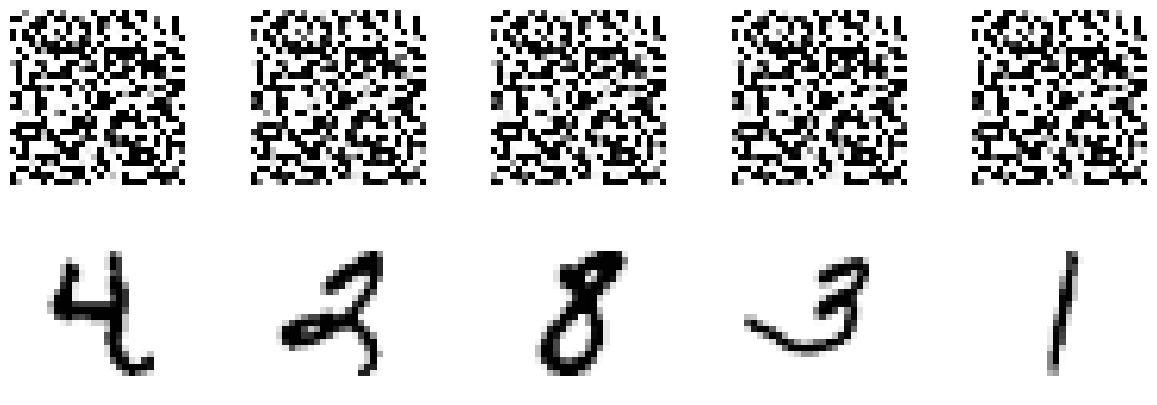

1/1 [==============================] - 0s 23ms/step
D loss:  2.3151923755904136e-06
D accuracy:  1.0
G loss:  1.7843506228132355e-08


1/1 [==============================] - 0s 19ms/step
D loss:  2.8438397521313163e-06
D accuracy:  1.0
G loss:  7.790347922309593e-09




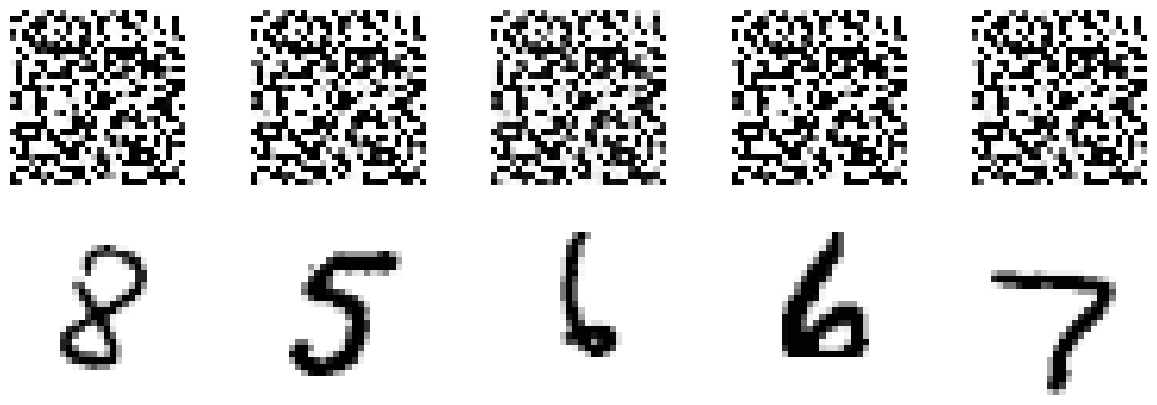

1/1 [==============================] - 0s 21ms/step
D loss:  3.294894270311488e-06
D accuracy:  1.0
G loss:  1.0816136875035909e-09


1/1 [==============================] - 0s 37ms/step
D loss:  1.1737203067241353e-06
D accuracy:  1.0
G loss:  3.24510063265393e-09




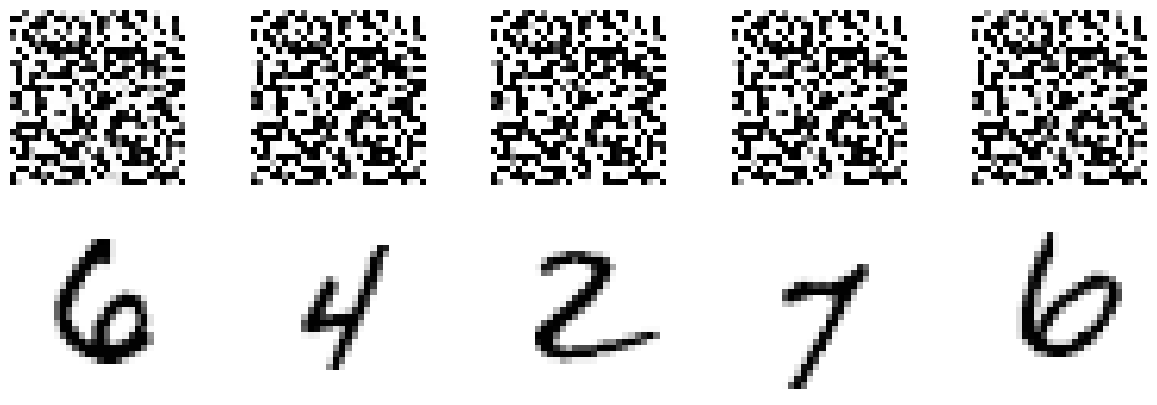

1/1 [==============================] - 0s 16ms/step
D loss:  1.4049391232617836e-06
D accuracy:  1.0
G loss:  2.1839431596504255e-08


1/1 [==============================] - 0s 16ms/step
D loss:  2.802237570875832e-06
D accuracy:  1.0
G loss:  5.744281494912684e-08




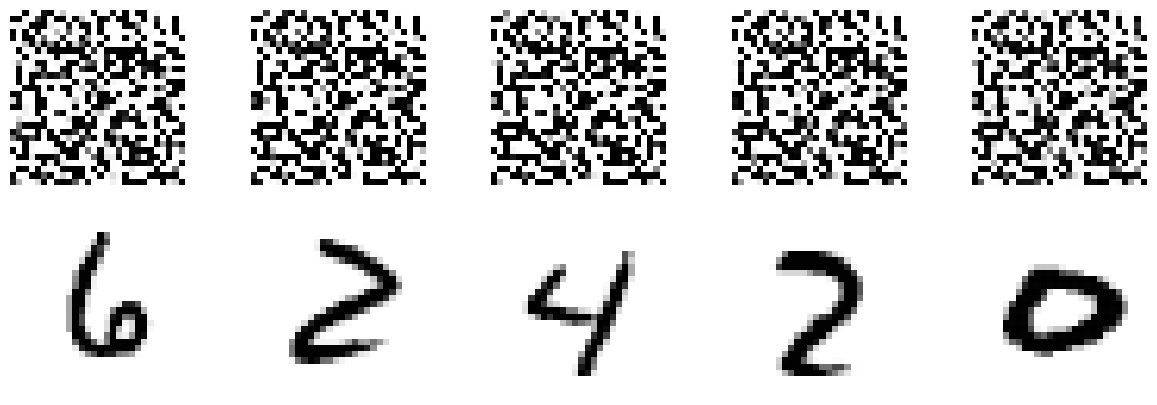

1/1 [==============================] - 0s 17ms/step
D loss:  8.434125302159146e-06
D accuracy:  1.0
G loss:  6.77603466670007e-08


1/1 [==============================] - 0s 16ms/step
D loss:  4.4776107448463165e-06
D accuracy:  1.0
G loss:  1.4756535549054206e-08




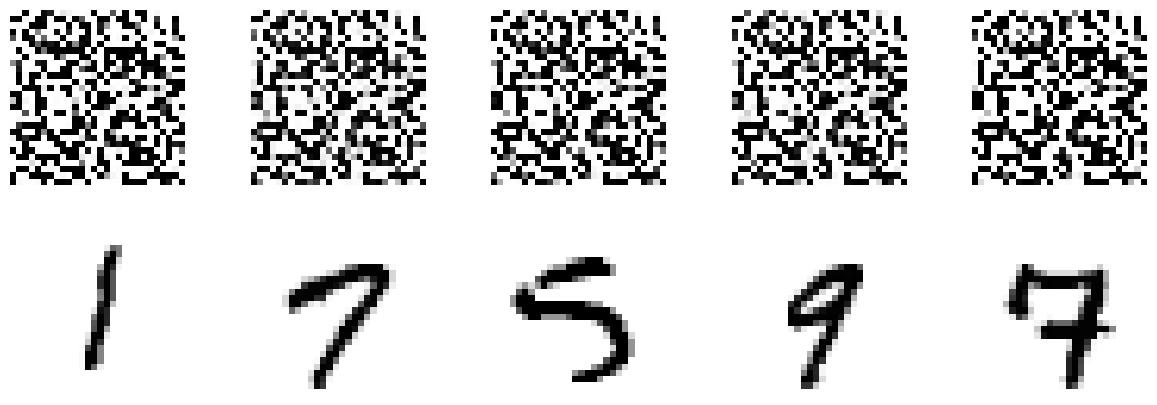

1/1 [==============================] - 0s 23ms/step
D loss:  1.7618515464334905e-06
D accuracy:  1.0
G loss:  6.6985408331277085e-09


1/1 [==============================] - 0s 15ms/step
D loss:  3.478276312307571e-06
D accuracy:  1.0
G loss:  5.819187909317236e-10




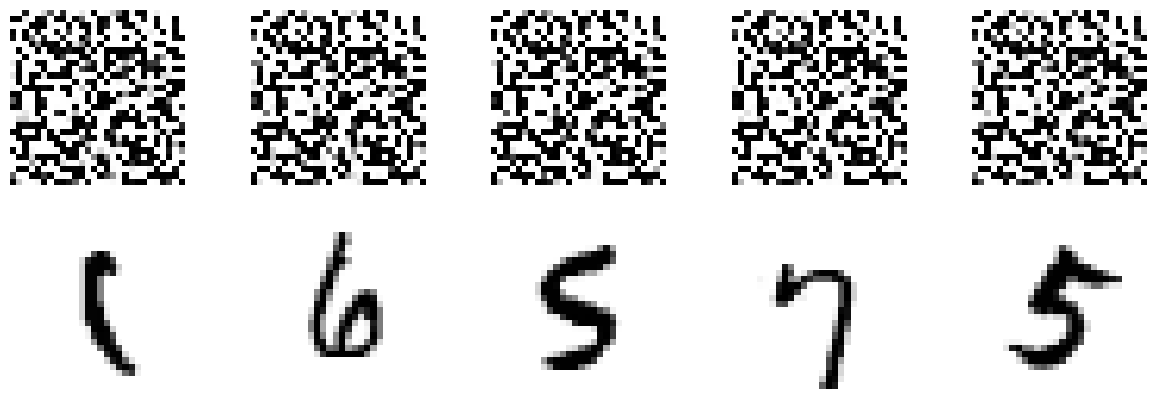

1/1 [==============================] - 0s 16ms/step
D loss:  5.643831855195458e-07
D accuracy:  1.0
G loss:  5.194499941296726e-09


1/1 [==============================] - 0s 15ms/step
D loss:  5.636021356281162e-07
D accuracy:  1.0
G loss:  6.174639022304973e-09




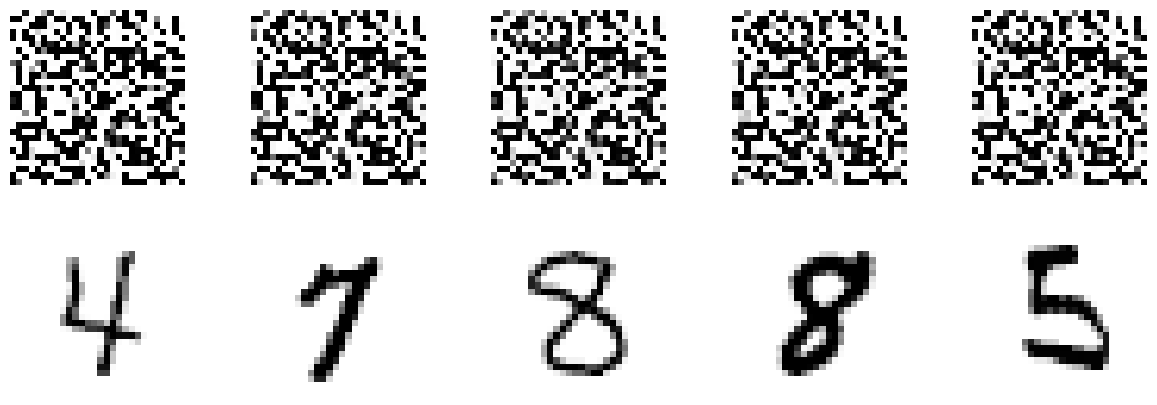

1/1 [==============================] - 0s 16ms/step
D loss:  1.2154940591813101e-06
D accuracy:  1.0
G loss:  3.0954080965095443e-10


1/1 [==============================] - 0s 16ms/step
D loss:  7.817715377278489e-07
D accuracy:  1.0
G loss:  9.738982953422237e-10




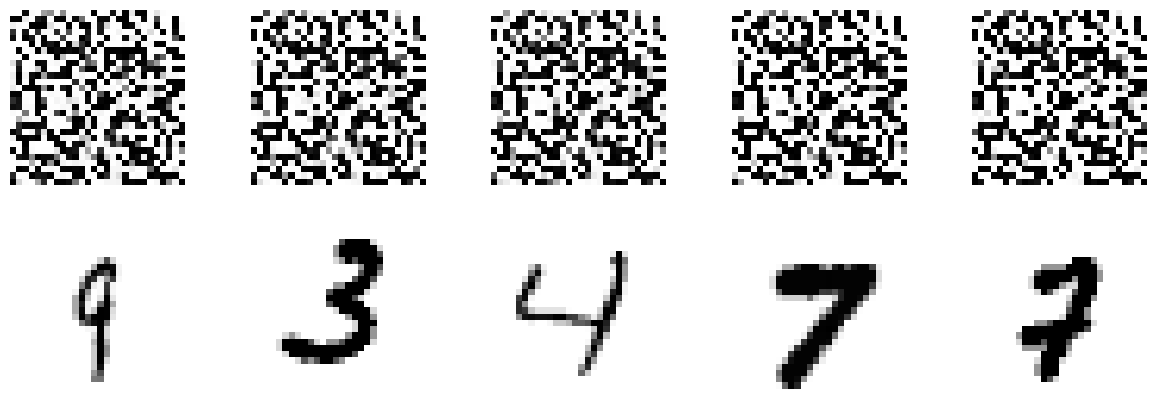

1/1 [==============================] - 0s 24ms/step
D loss:  1.6992919862346412e-06
D accuracy:  1.0
G loss:  1.070881050502237e-09


1/1 [==============================] - 0s 15ms/step
D loss:  2.523535140852573e-06
D accuracy:  1.0
G loss:  1.8271553159365794e-09




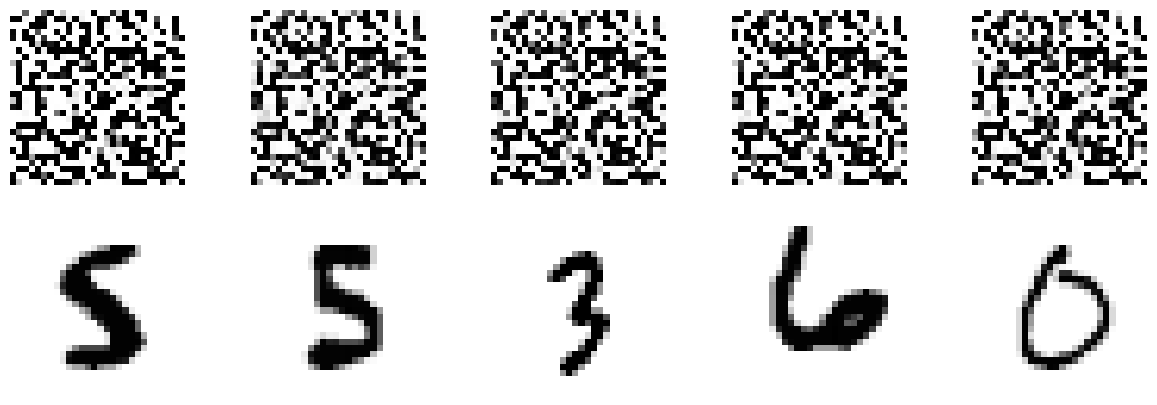

1/1 [==============================] - 0s 20ms/step
D loss:  3.7611842538254336e-06
D accuracy:  1.0
G loss:  6.899786519909412e-09


1/1 [==============================] - 0s 25ms/step
D loss:  8.627770853308903e-07
D accuracy:  1.0
G loss:  5.812223591306065e-09




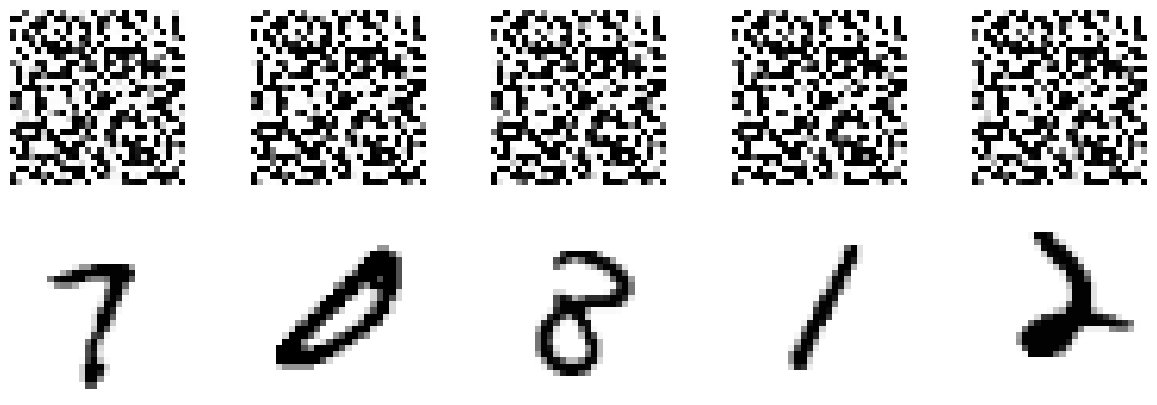

1/1 [==============================] - 0s 16ms/step
D loss:  9.663480398103275e-07
D accuracy:  1.0
G loss:  1.858879161709126e-10


1/1 [==============================] - 0s 15ms/step
Epoch:  1
1/1 [==============================] - 0s 14ms/step
D loss:  1.039751815312684e-06
D accuracy:  1.0
G loss:  2.6806310504667863e-09




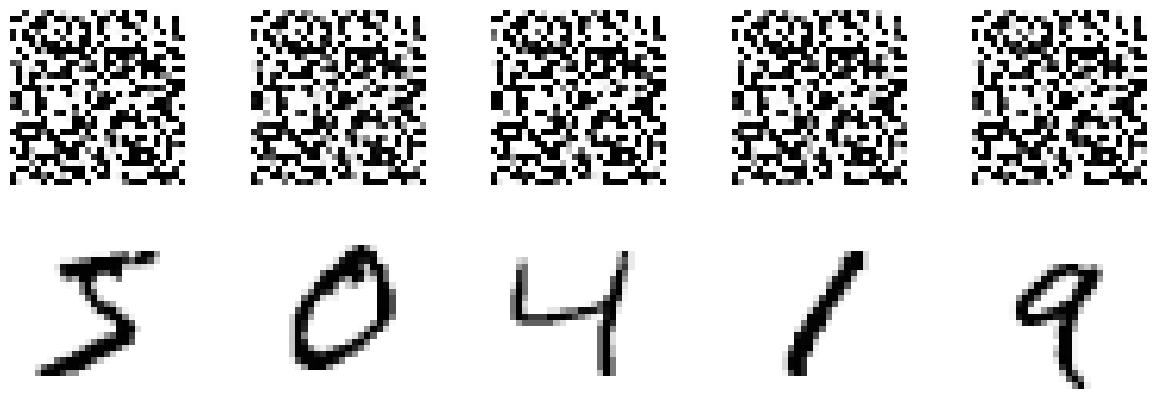

1/1 [==============================] - 0s 14ms/step
D loss:  1.275387001342665e-06
D accuracy:  1.0
G loss:  6.911058531011705e-11


1/1 [==============================] - 0s 17ms/step
D loss:  2.4160887468482883e-07
D accuracy:  1.0
G loss:  1.3620797822966324e-09




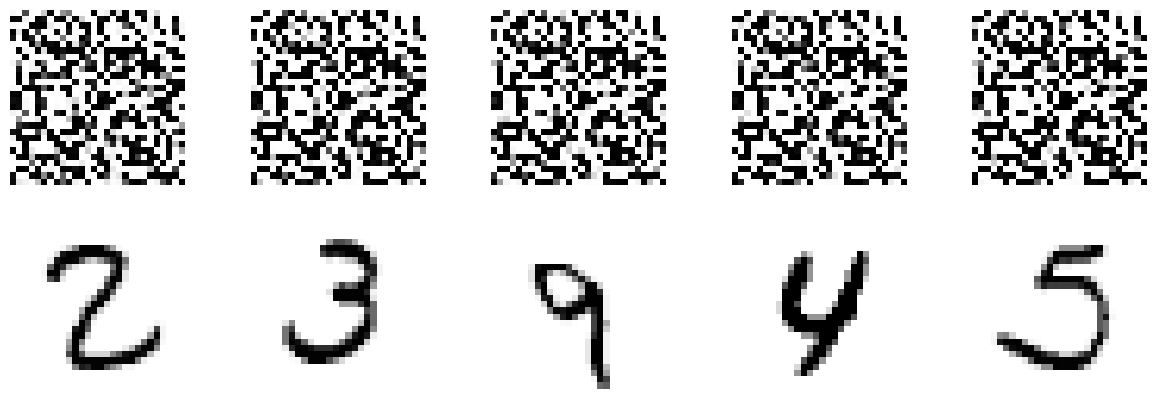

1/1 [==============================] - 0s 22ms/step
D loss:  2.183728639693072e-06
D accuracy:  1.0
G loss:  5.342208897474165e-10


1/1 [==============================] - 0s 23ms/step
D loss:  9.070257838139639e-07
D accuracy:  1.0
G loss:  1.1827514967421848e-08




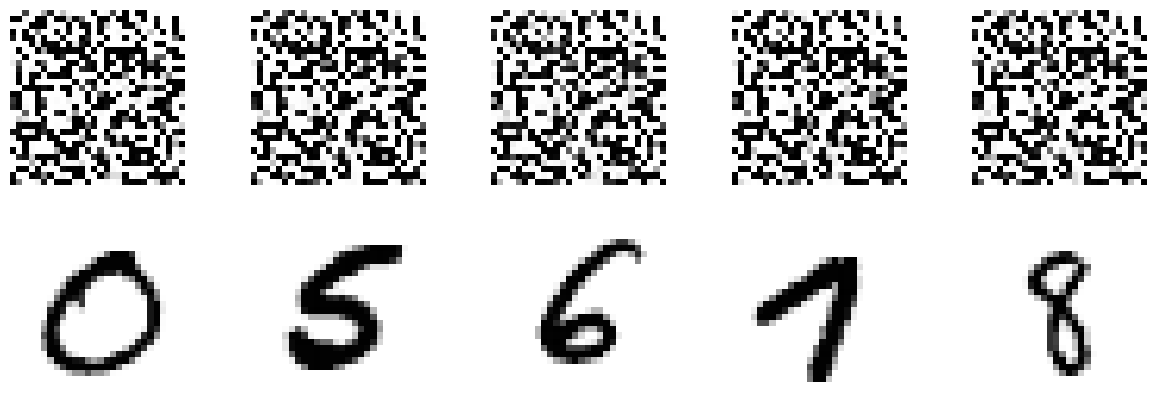

1/1 [==============================] - 0s 16ms/step
D loss:  4.667523541002083e-07
D accuracy:  1.0
G loss:  6.912889150001433e-10


1/1 [==============================] - 0s 15ms/step
D loss:  1.7928569207015244e-07
D accuracy:  1.0
G loss:  2.006306232260613e-10




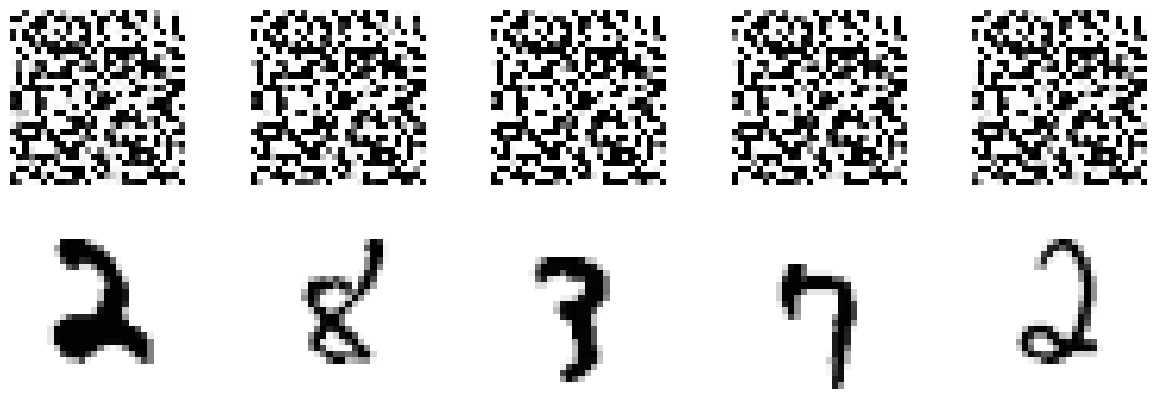

1/1 [==============================] - 0s 23ms/step
D loss:  5.675755740952582e-07
D accuracy:  1.0
G loss:  3.2265321525670743e-09


1/1 [==============================] - 0s 17ms/step
D loss:  1.1623080808931263e-07
D accuracy:  1.0
G loss:  1.1501256197421483e-10




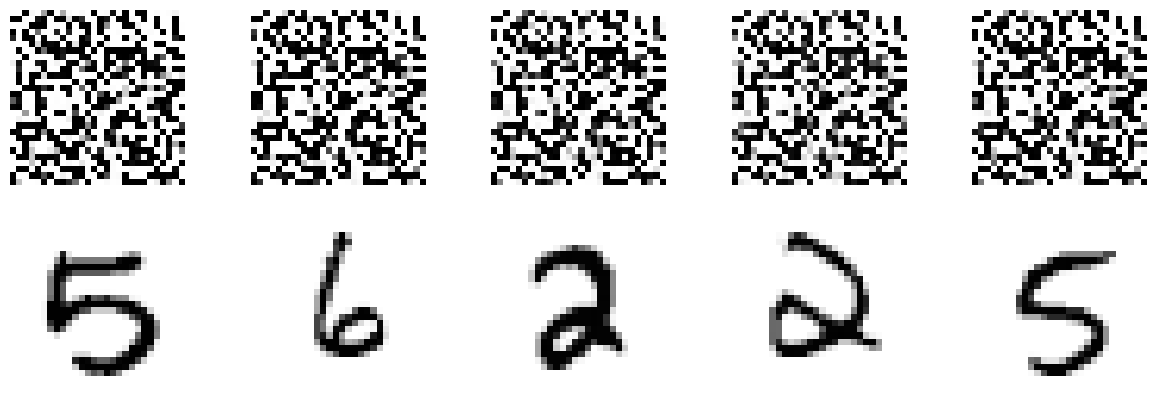

1/1 [==============================] - 0s 14ms/step
D loss:  4.311946270263434e-06
D accuracy:  1.0
G loss:  6.515158190723014e-08


1/1 [==============================] - 0s 23ms/step
D loss:  2.153972360474654e-07
D accuracy:  1.0
G loss:  6.951221265261154e-10




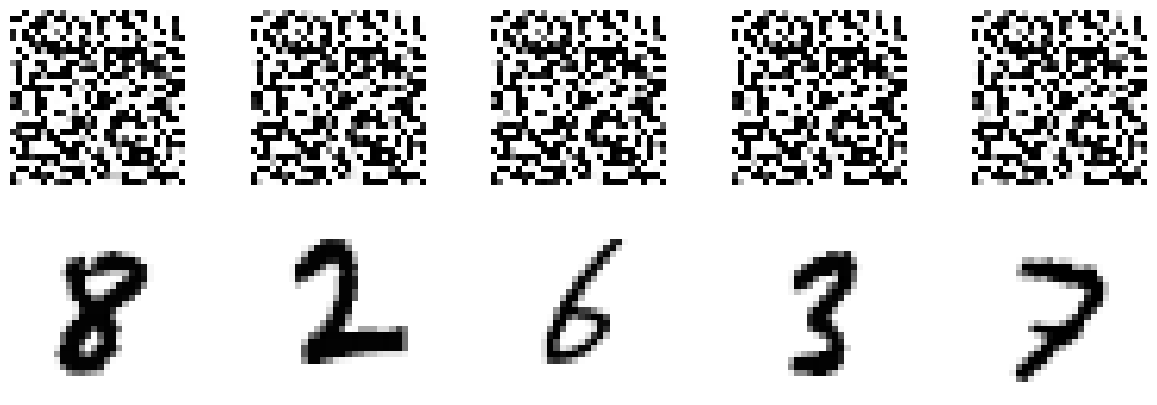

1/1 [==============================] - 0s 24ms/step


KeyboardInterrupt: ignored

In [ ]:
D_LOSS_INITIALIZER=D_LOSS
G_LOSS_INITIALIZER=G_LOSS
D_LOSS=[]
G_LOSS=[]
train(X_train,generator,discriminator,combined,epochs=10,batch_size=32,sample_interval=100)

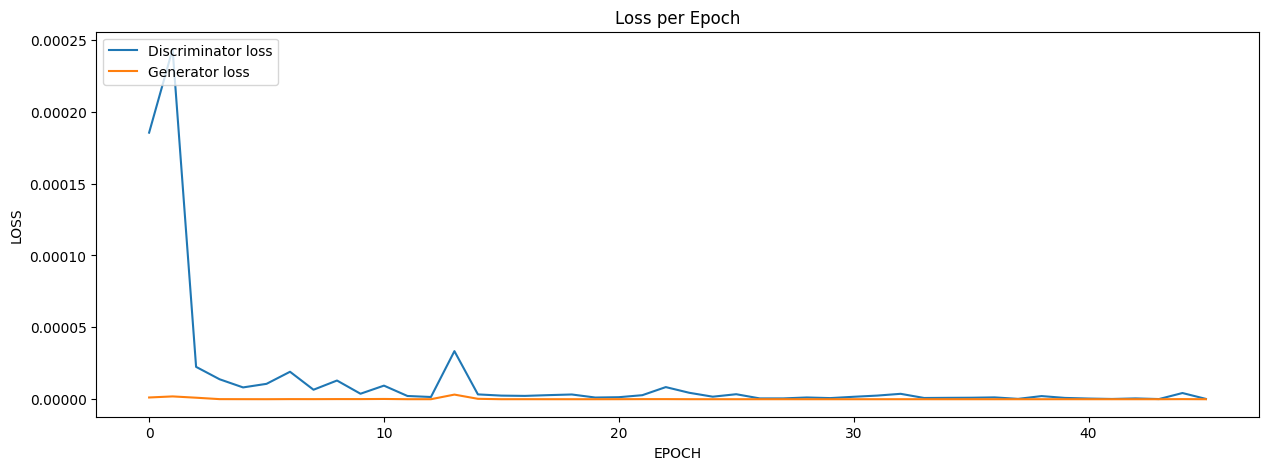

In [ ]:
plt.plot(D_LOSS[3:])
plt.plot(G_LOSS[3:])
plt.title('Loss per Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['Discriminator loss', 'Generator loss'], loc='upper left')
plt.show()

Tenemos Gradient Explosion ya que los valores tienden a 0 o nulos.

## Learning Rate

Ahora vamos a volver al que inicializamos los pesos solamente y le cambiaremos el learning rate ya que es otro método que puede mejorar el resultado.

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_generator():
  input=Input(shape=(100))
  x=Dense(64,activation='relu',kernel_initializer=HeNormal())(input)
  x=Dense(128,activation='relu',kernel_initializer=HeNormal())(x)
  x=Dense(512,activation='relu', kernel_initializer=HeNormal())(x)
  x=Dense(1024,activation='relu', kernel_initializer=HeNormal())(x)

  x=Dense(28*28,activation='tanh')(x)


  output=Reshape((28,28,1)) (x)
  generator=Model(input,output)
  return generator

In [ ]:
generator=create_generator()

In [ ]:
def create_discriminator():
  input=Input(shape=(28,28,1))

  x=Flatten()(input)

  x=Dense(512,activation='relu', kernel_initializer=HeNormal())(x)
  x=Dense(128,activation='relu',kernel_initializer=HeNormal())(x)
  x=Dense(64,activation='relu',kernel_initializer=HeNormal())(x)

  output=Dense(1,activation='sigmoid')(x)

  discriminator=Model(input,output)
  return discriminator

In [ ]:
discriminator=create_discriminator()

In [ ]:
discriminator.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])
discriminator.trainable=False

z=Input(shape=(100,))
img=generator(z)
validity=discriminator(img)

combined=Model(z,validity)
combined.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy')

Epoch:  0
1/1 [==============================] - 0s 117ms/step
D loss:  4.284881353378296
D accuracy:  0.03125
G loss:  1.6885427236557007




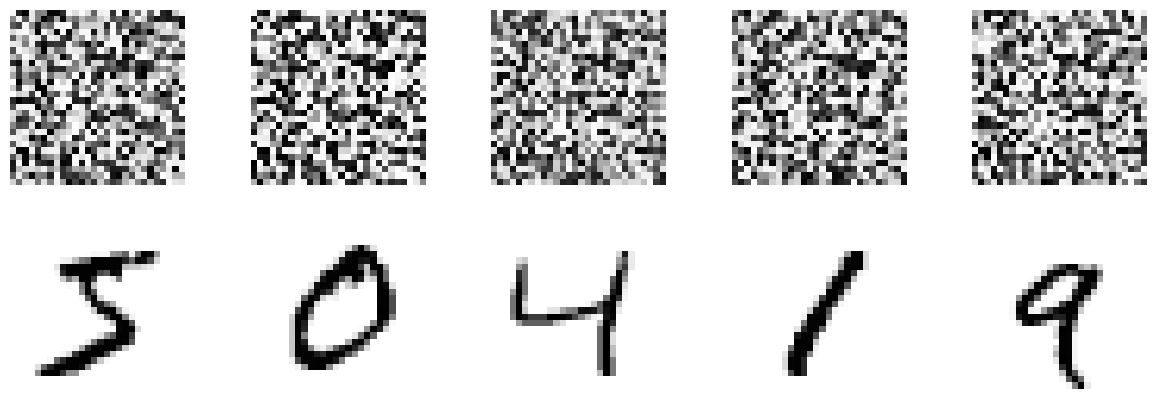

1/1 [==============================] - 0s 18ms/step
D loss:  1.0566793967603516e-11
D accuracy:  1.0
G loss:  77.59830474853516


1/1 [==============================] - 0s 16ms/step
D loss:  9.464667547962047e-13
D accuracy:  1.0
G loss:  77.60730743408203




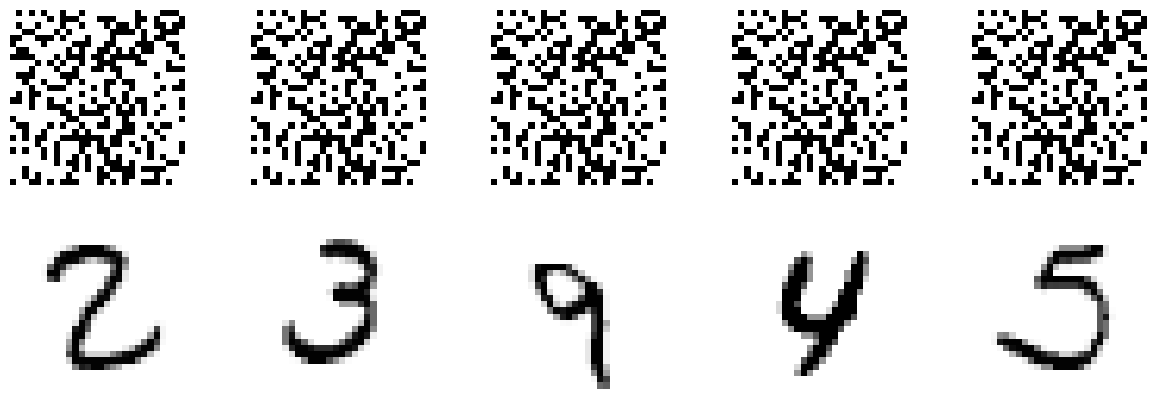

1/1 [==============================] - 0s 17ms/step
D loss:  4.788457824700387e-11
D accuracy:  1.0
G loss:  77.60621643066406


1/1 [==============================] - 0s 14ms/step
D loss:  9.767250376546688e-12
D accuracy:  1.0
G loss:  77.60621643066406




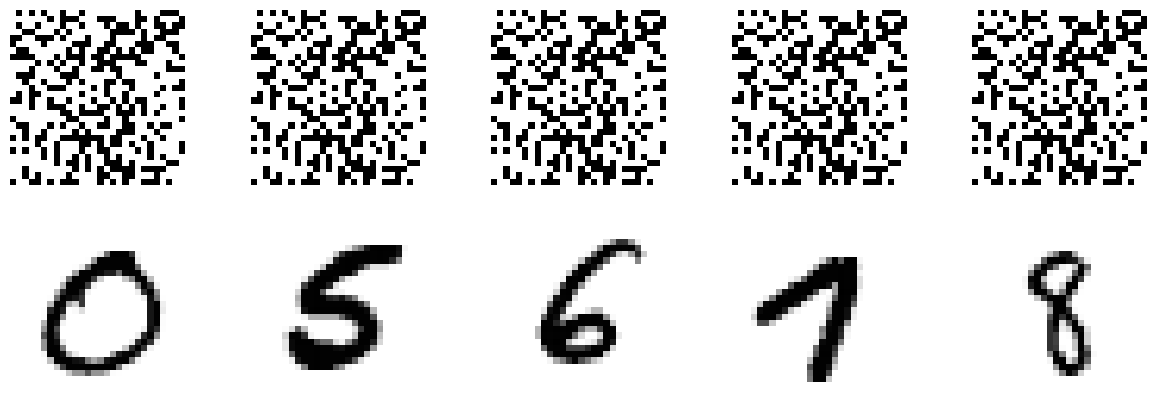

1/1 [==============================] - 0s 15ms/step
D loss:  2.982747104862682e-10
D accuracy:  1.0
G loss:  77.60621643066406


1/1 [==============================] - 0s 15ms/step
D loss:  7.320619804795925e-12
D accuracy:  1.0
G loss:  77.60621643066406




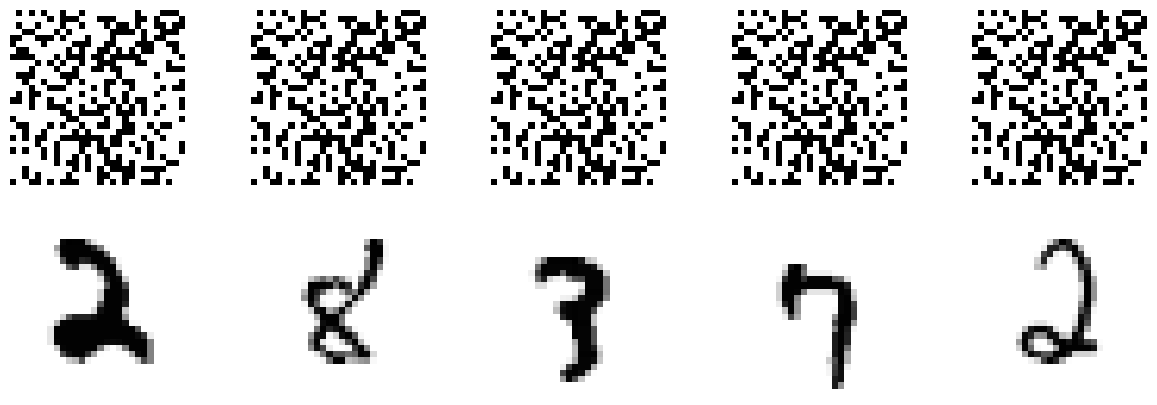

1/1 [==============================] - 0s 14ms/step
D loss:  2.9217298719297347e-11
D accuracy:  1.0
G loss:  77.6060562133789


1/1 [==============================] - 0s 25ms/step
D loss:  4.6585951242461565e-12
D accuracy:  1.0
G loss:  77.60594177246094




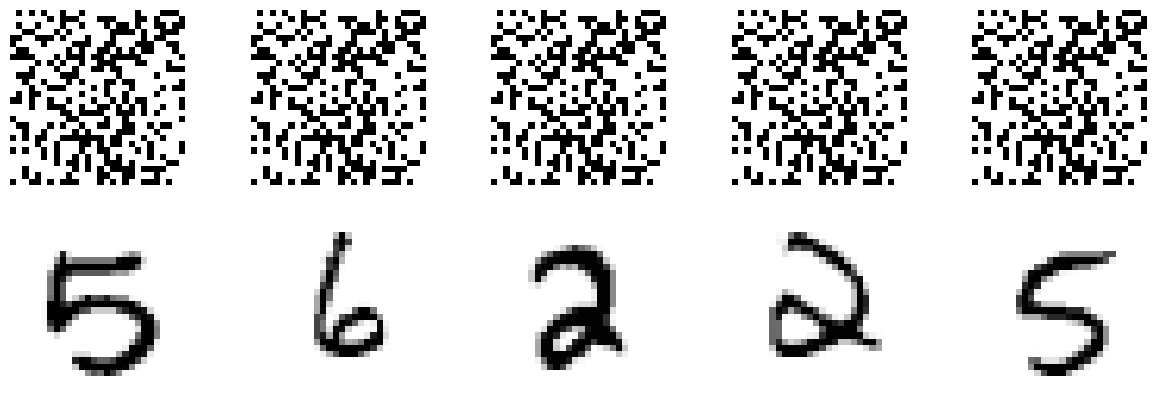

1/1 [==============================] - 0s 15ms/step
D loss:  2.2614963287453937e-12
D accuracy:  1.0
G loss:  77.60462951660156


1/1 [==============================] - 0s 20ms/step
D loss:  2.589125528557057e-12
D accuracy:  1.0
G loss:  77.60234069824219




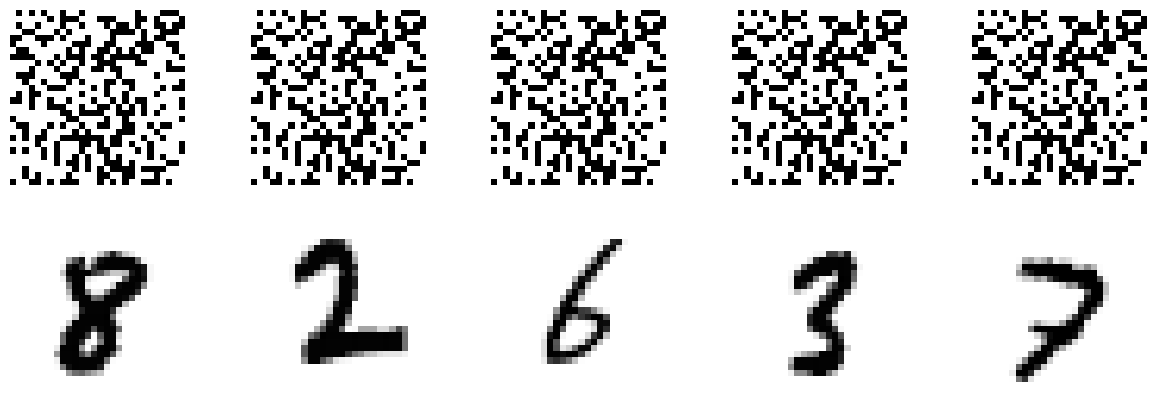

1/1 [==============================] - 0s 23ms/step
D loss:  5.0897194445176375e-12
D accuracy:  1.0
G loss:  77.60234069824219


1/1 [==============================] - 0s 19ms/step
D loss:  1.0486904747364356e-11
D accuracy:  1.0
G loss:  77.60234069824219




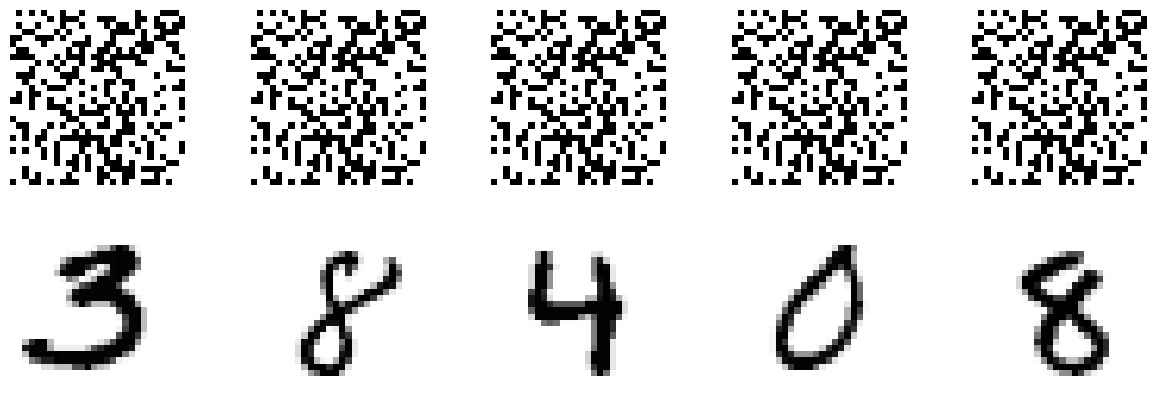

1/1 [==============================] - 0s 15ms/step
D loss:  1.2999650834955023e-11
D accuracy:  1.0
G loss:  77.60234069824219


1/1 [==============================] - 0s 28ms/step
D loss:  1.481467379327306e-11
D accuracy:  1.0
G loss:  77.60234069824219




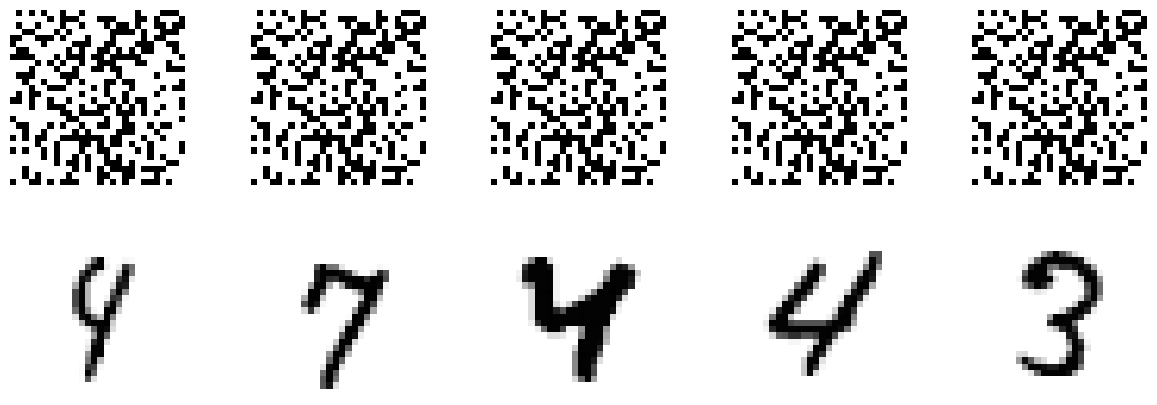

1/1 [==============================] - 0s 17ms/step
D loss:  3.840444889186001e-12
D accuracy:  1.0
G loss:  77.60205078125


1/1 [==============================] - 0s 20ms/step
D loss:  2.6616801210993524e-12
D accuracy:  1.0
G loss:  77.60018920898438




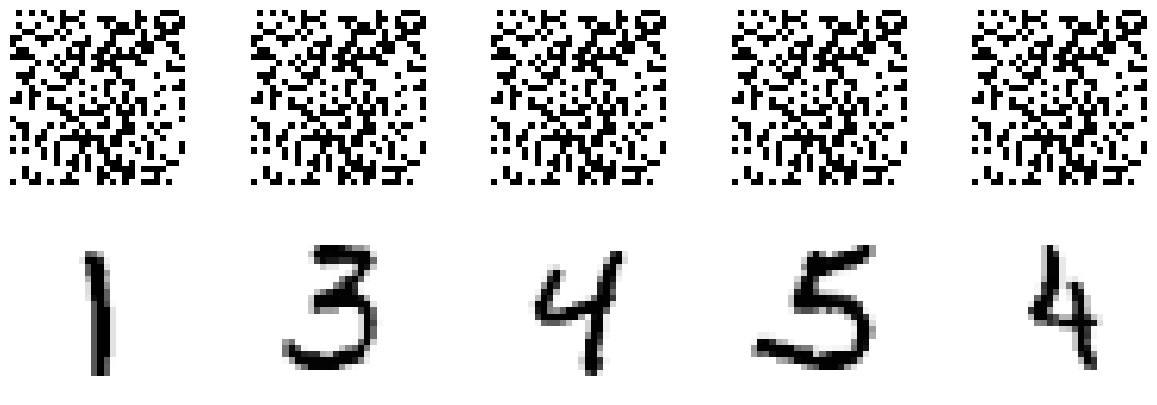

1/1 [==============================] - 0s 23ms/step
D loss:  3.971881417513812e-12
D accuracy:  1.0
G loss:  77.59993743896484


1/1 [==============================] - 0s 15ms/step
D loss:  1.4900835556760916e-12
D accuracy:  1.0
G loss:  77.5987777709961




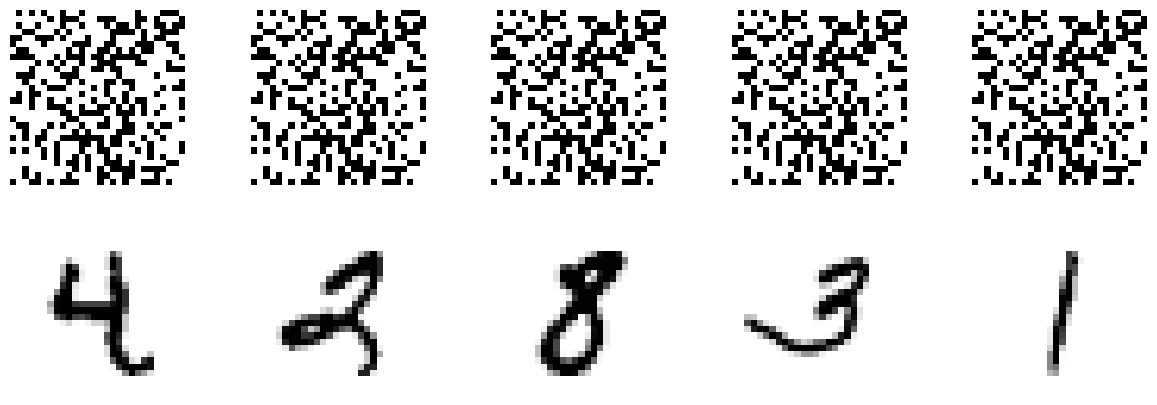

1/1 [==============================] - 0s 19ms/step
D loss:  2.487565535502778e-11
D accuracy:  1.0
G loss:  77.59842681884766


1/1 [==============================] - 0s 26ms/step
D loss:  7.061945429473471e-13
D accuracy:  1.0
G loss:  77.59842681884766




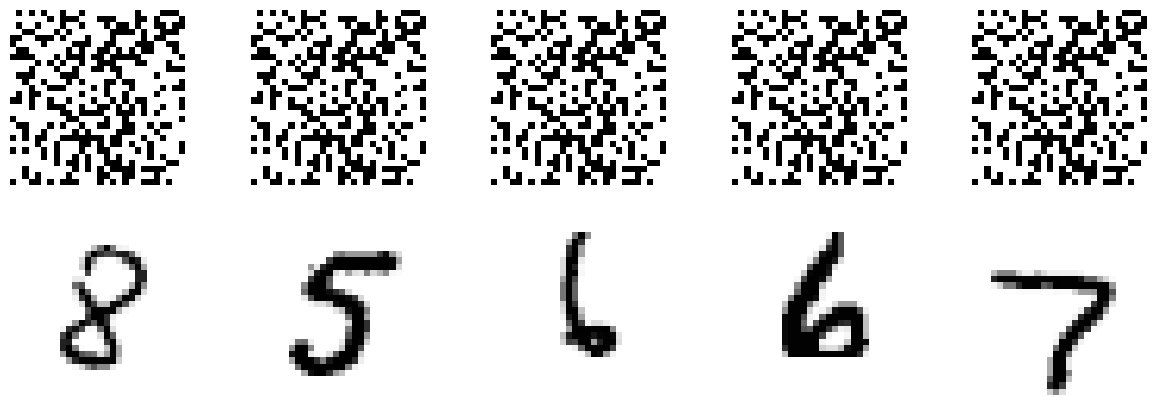

1/1 [==============================] - 0s 15ms/step
D loss:  2.1600028623364187e-12
D accuracy:  1.0
G loss:  77.59842681884766


1/1 [==============================] - 0s 17ms/step
D loss:  1.4156332356352053e-12
D accuracy:  1.0
G loss:  77.59842681884766




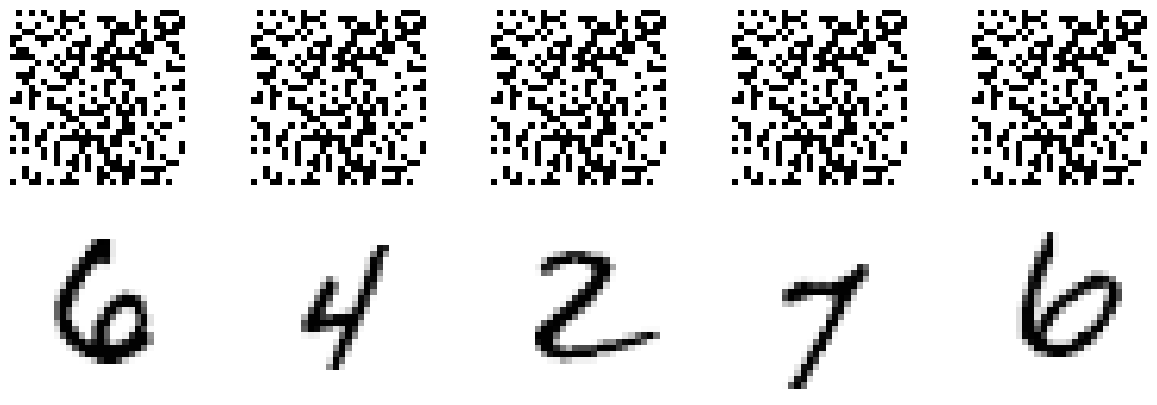

1/1 [==============================] - 0s 24ms/step
D loss:  3.1908807193725686e-12
D accuracy:  1.0
G loss:  77.59842681884766


1/1 [==============================] - 0s 15ms/step
D loss:  1.4607964360716097e-12
D accuracy:  1.0
G loss:  77.59842681884766




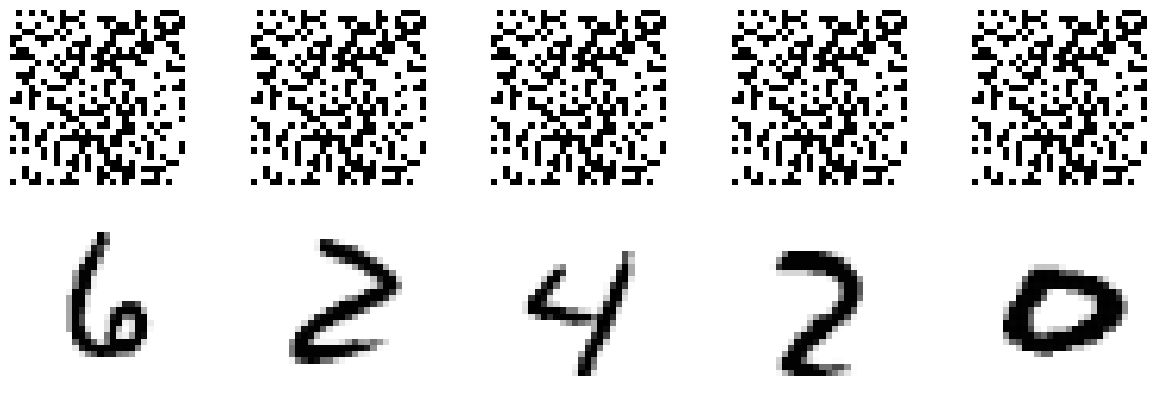

1/1 [==============================] - 0s 17ms/step
D loss:  1.2219156242387896e-11
D accuracy:  1.0
G loss:  77.59842681884766


1/1 [==============================] - 0s 21ms/step
D loss:  2.462187571883323e-12
D accuracy:  1.0
G loss:  77.59236907958984




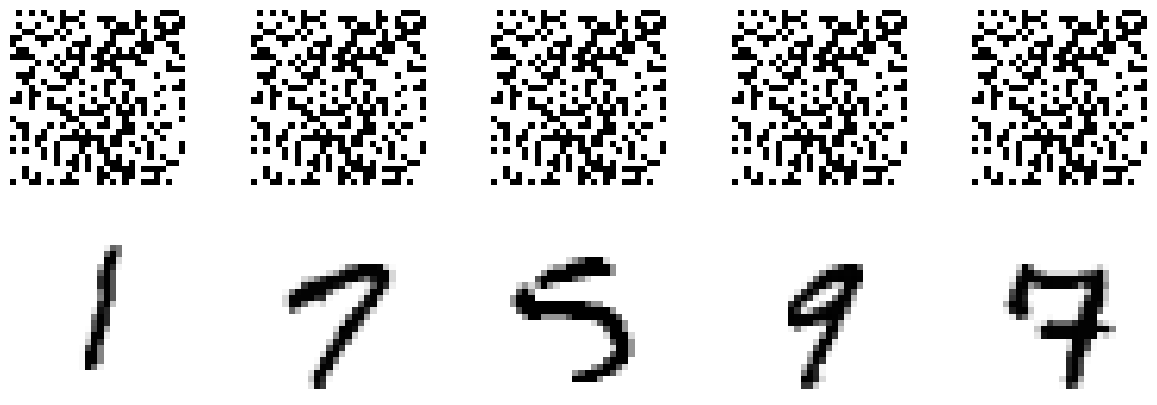

1/1 [==============================] - 0s 18ms/step
D loss:  1.7997190109725336e-12
D accuracy:  1.0
G loss:  77.59236907958984


1/1 [==============================] - 0s 19ms/step


KeyboardInterrupt: ignored

In [ ]:
D_LOSS_BATCH=D_LOSS
G_LOSS_BATCH=G_LOSS
D_LOSS=[]
G_LOSS=[]
train(X_train,generator,discriminator,combined,epochs=10,batch_size=32,sample_interval=100)

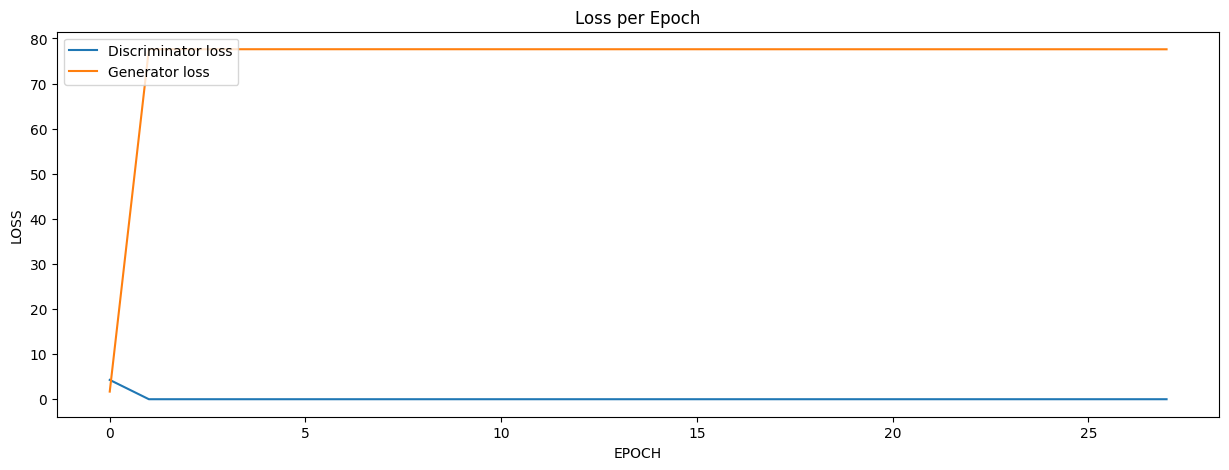

In [ ]:
plt.plot(D_LOSS)
plt.plot(G_LOSS)
plt.title('Loss per Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['Discriminator loss', 'Generator loss'], loc='upper left')
plt.show()

## Cambio de Modelo

Cogemos el modelo de Kernel Initializer y modificamos las capas añadiendo neuronas o más capas al modelo.

In [ ]:
from tensorflow.keras.initializers import HeNormal

In [ ]:
def create_generator():
  input=Input(shape=(100))
  x=Dense(64,activation='relu',kernel_initializer=HeNormal())(input)
  x=Dense(128,activation='relu',kernel_initializer=HeNormal())(x)
  x=Dense(512,activation='relu', kernel_initializer=HeNormal())(x)
  x=Dense(1024,activation='relu', kernel_initializer=HeNormal())(x)
  x=Dense(2048,activation='relu', kernel_initializer=HeNormal())(x)

  x=Dense(28*28,activation='tanh')(x)


  output=Reshape((28,28,1)) (x)
  generator=Model(input,output)
  return generator

In [ ]:
generator=create_generator()

In [ ]:
def create_discriminator():
  input=Input(shape=(28,28,1))

  x=Flatten()(input)

  x=Dense(512,activation='relu', kernel_initializer=HeNormal())(x)
  x=Dense(128,activation='relu',kernel_initializer=HeNormal())(x)
  x=Dense(64,activation='relu',kernel_initializer=HeNormal())(x)

  output=Dense(1,activation='sigmoid')(x)

  discriminator=Model(input,output)
  return discriminator

In [ ]:
discriminator=create_discriminator()

In [ ]:
discriminator.compile(loss='binary_crossentropy',metrics=['accuracy'])
discriminator.trainable=False

z=Input(shape=(100,))
img=generator(z)
validity=discriminator(img)

combined=Model(z,validity)
combined.compile(loss='binary_crossentropy')

Epoch:  0
1/1 [==============================] - 0s 17ms/step
D loss:  10.73987591266632
D accuracy:  0.5
G loss:  0.2924105226993561




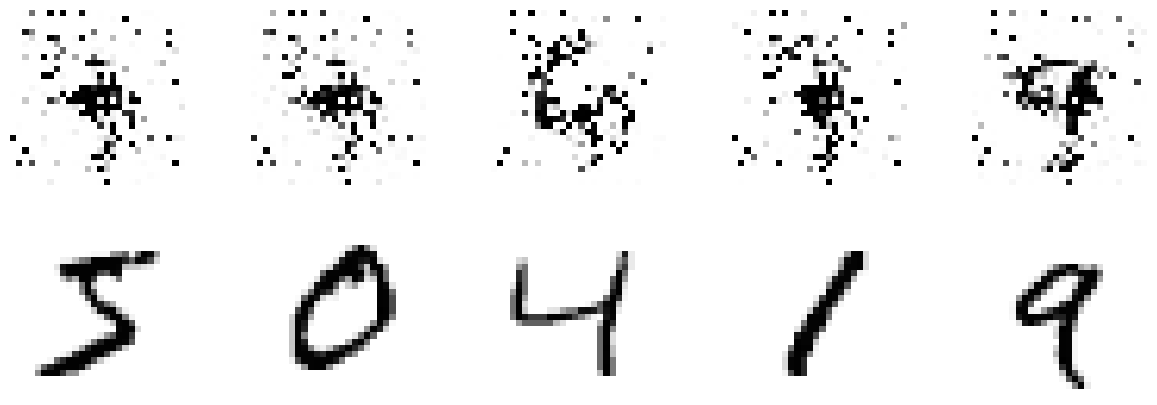

1/1 [==============================] - 0s 16ms/step
D loss:  0.6123557090759277
D accuracy:  0.734375
G loss:  1.2538236379623413


1/1 [==============================] - 0s 17ms/step
D loss:  0.6766372323036194
D accuracy:  0.5
G loss:  0.8324573040008545




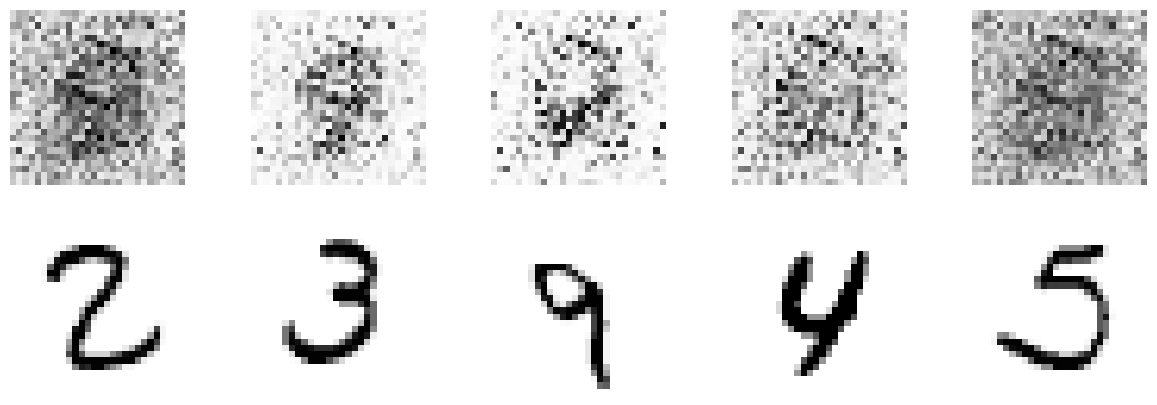

1/1 [==============================] - 0s 35ms/step
D loss:  0.8542572259902954
D accuracy:  0.546875
G loss:  1.229604959487915


1/1 [==============================] - 0s 21ms/step
D loss:  0.61053267121315
D accuracy:  0.703125
G loss:  1.0599565505981445




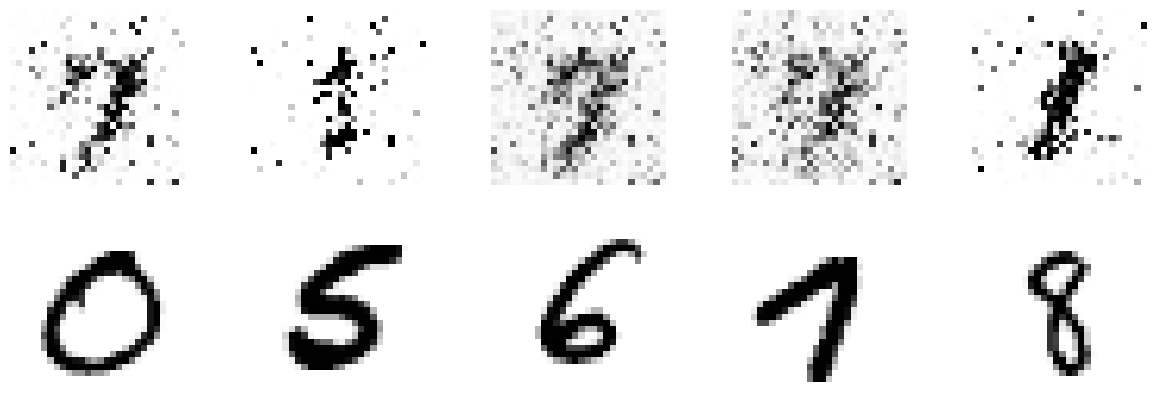

1/1 [==============================] - 0s 15ms/step
D loss:  0.7599568665027618
D accuracy:  0.59375
G loss:  1.0911093950271606


1/1 [==============================] - 0s 23ms/step
D loss:  0.6097320169210434
D accuracy:  0.625
G loss:  0.9571698904037476




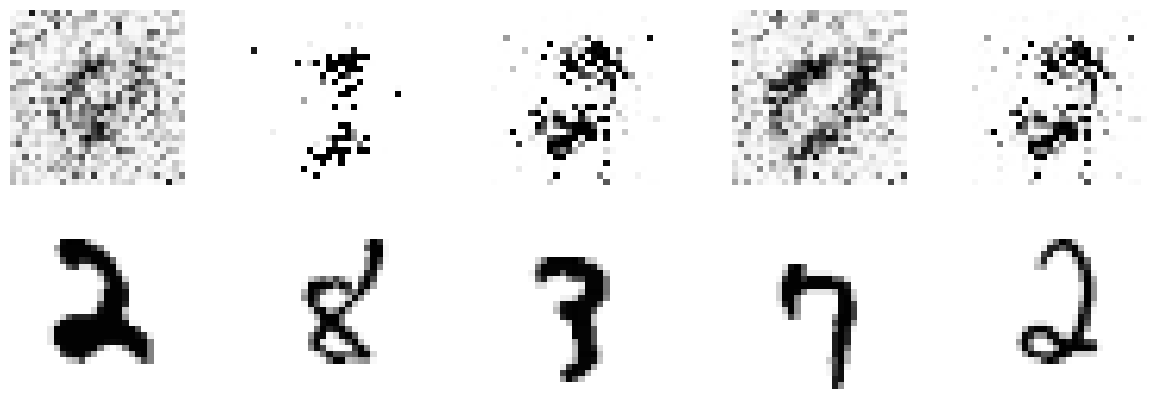

1/1 [==============================] - 0s 17ms/step
D loss:  0.6292801946401596
D accuracy:  0.625
G loss:  1.0484633445739746


1/1 [==============================] - 0s 18ms/step
D loss:  0.49077752232551575
D accuracy:  0.828125
G loss:  1.2311362028121948




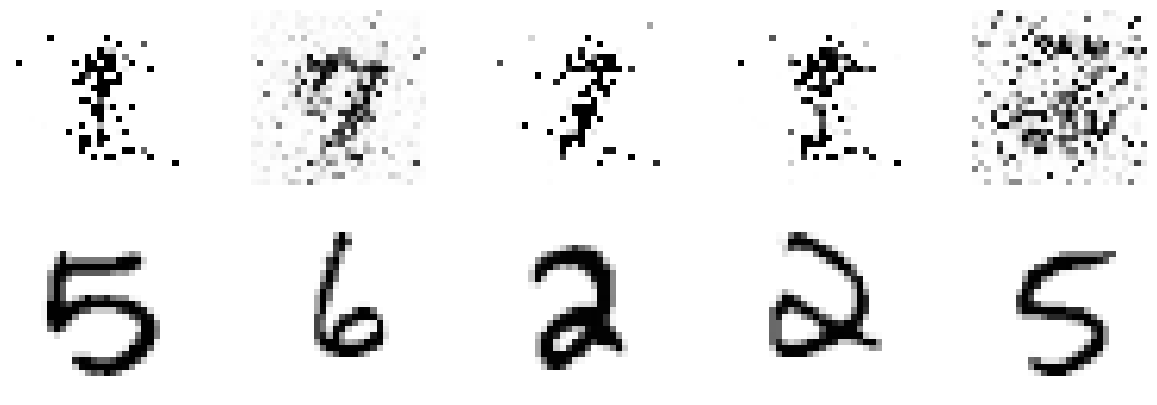

1/1 [==============================] - 0s 25ms/step
D loss:  0.9008181095123291
D accuracy:  0.59375
G loss:  1.1733481884002686


1/1 [==============================] - 0s 16ms/step
D loss:  0.5039210766553879
D accuracy:  0.71875
G loss:  1.2559404373168945




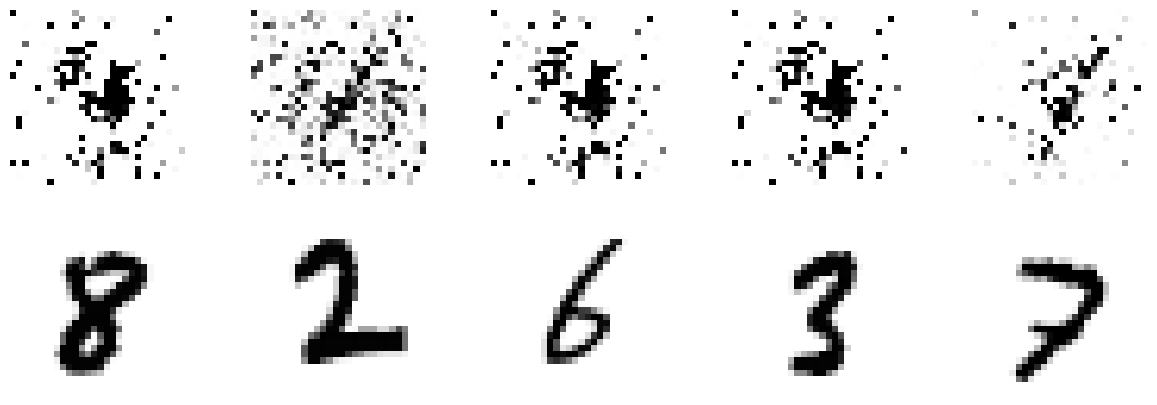

1/1 [==============================] - 0s 29ms/step
D loss:  0.7480879426002502
D accuracy:  0.484375
G loss:  1.2344363927841187


1/1 [==============================] - 0s 19ms/step
D loss:  0.6042958199977875
D accuracy:  0.6875
G loss:  1.1661031246185303




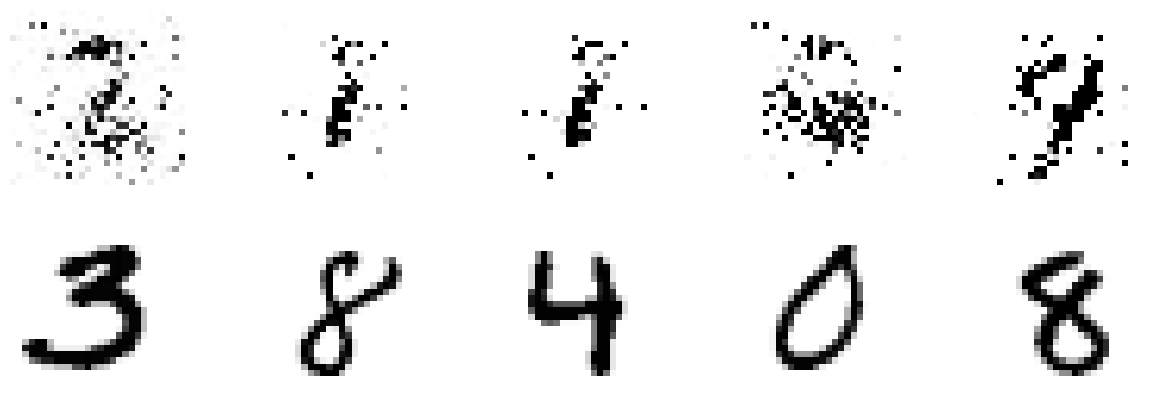

1/1 [==============================] - 0s 16ms/step
D loss:  0.5637217126786709
D accuracy:  0.78125
G loss:  2.79561185836792


1/1 [==============================] - 0s 18ms/step
D loss:  0.6568175554275513
D accuracy:  0.640625
G loss:  1.1787922382354736




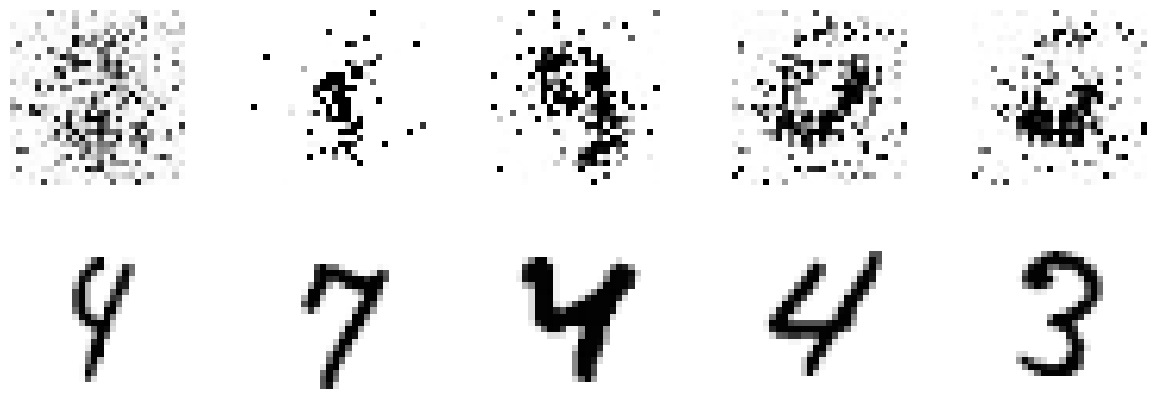

1/1 [==============================] - 0s 16ms/step
D loss:  0.7014381587505341
D accuracy:  0.53125
G loss:  1.6386842727661133


1/1 [==============================] - 0s 17ms/step
D loss:  0.7645888924598694
D accuracy:  0.59375
G loss:  1.349092960357666




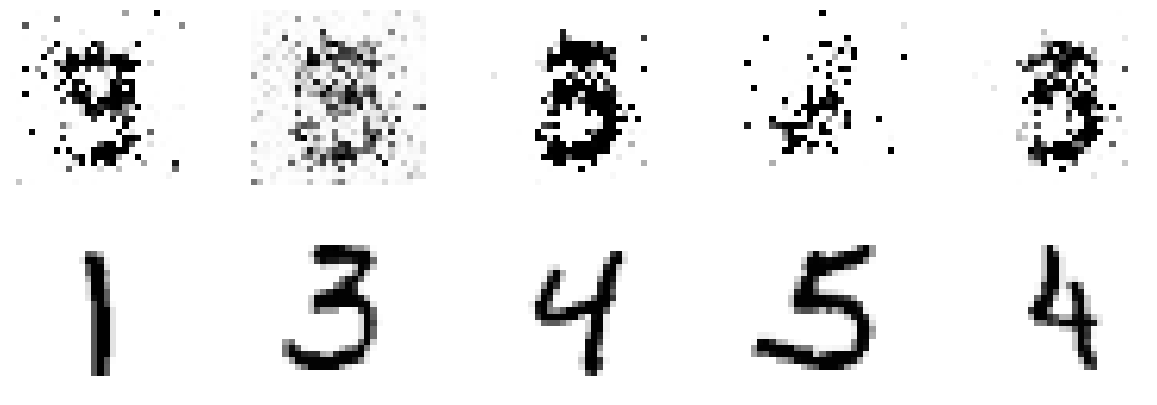

1/1 [==============================] - 0s 26ms/step
D loss:  0.6555872559547424
D accuracy:  0.59375
G loss:  1.0557377338409424


1/1 [==============================] - 0s 17ms/step
D loss:  0.1844493206590414
D accuracy:  0.953125
G loss:  2.8716959953308105




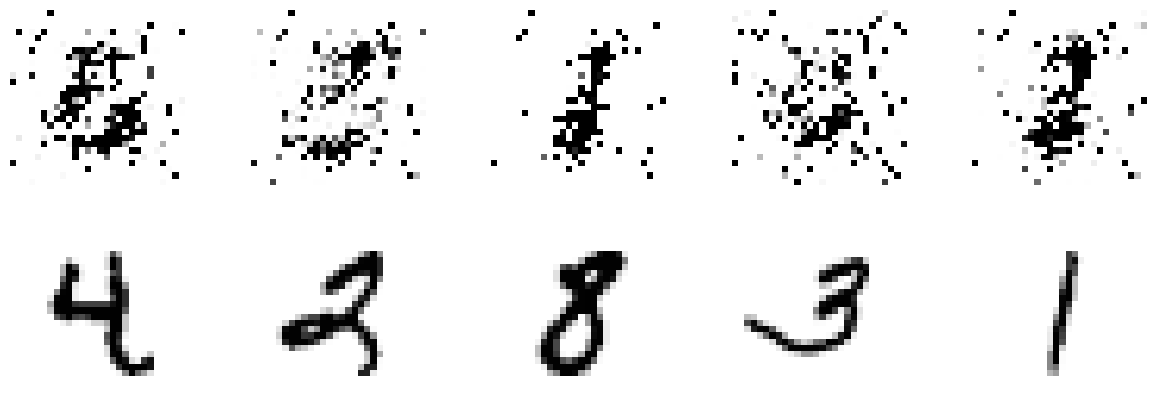

1/1 [==============================] - 0s 21ms/step
D loss:  0.5302861891686916
D accuracy:  0.796875
G loss:  4.037543296813965


1/1 [==============================] - 0s 31ms/step
D loss:  0.6461913585662842
D accuracy:  0.65625
G loss:  1.7471976280212402




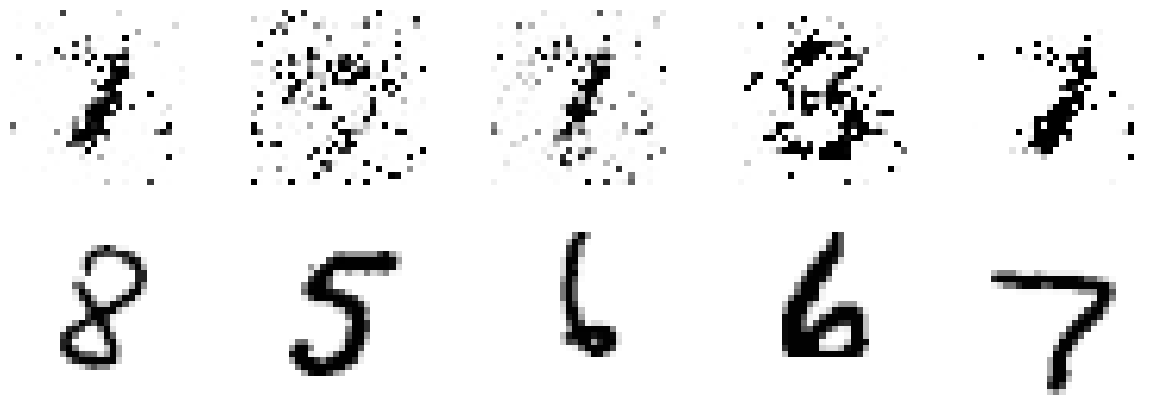

1/1 [==============================] - 0s 17ms/step
D loss:  0.22321270778775215
D accuracy:  0.953125
G loss:  2.2513108253479004


1/1 [==============================] - 0s 16ms/step
D loss:  0.6879728138446808
D accuracy:  0.59375
G loss:  1.3952202796936035




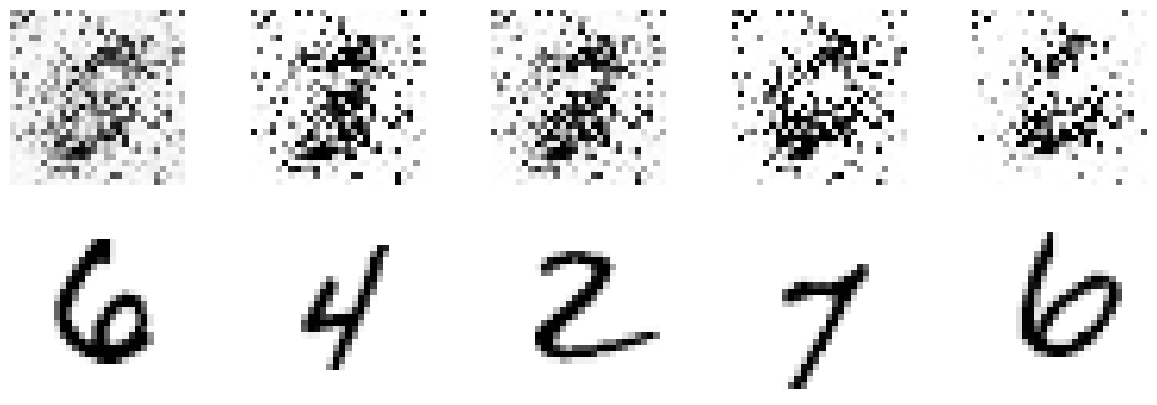

1/1 [==============================] - 0s 27ms/step
D loss:  0.9434735178947449
D accuracy:  0.390625
G loss:  1.6584641933441162


1/1 [==============================] - 0s 16ms/step
D loss:  0.7040675282478333
D accuracy:  0.578125
G loss:  1.6991454362869263




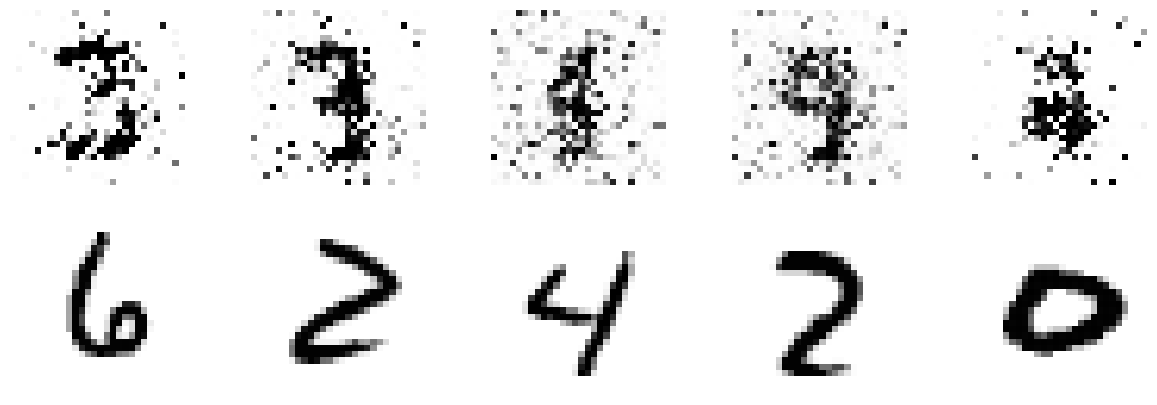

1/1 [==============================] - 0s 15ms/step
D loss:  0.708327978849411
D accuracy:  0.59375
G loss:  1.5640774965286255


1/1 [==============================] - 0s 16ms/step
D loss:  0.6738996207714081
D accuracy:  0.625
G loss:  1.8238810300827026




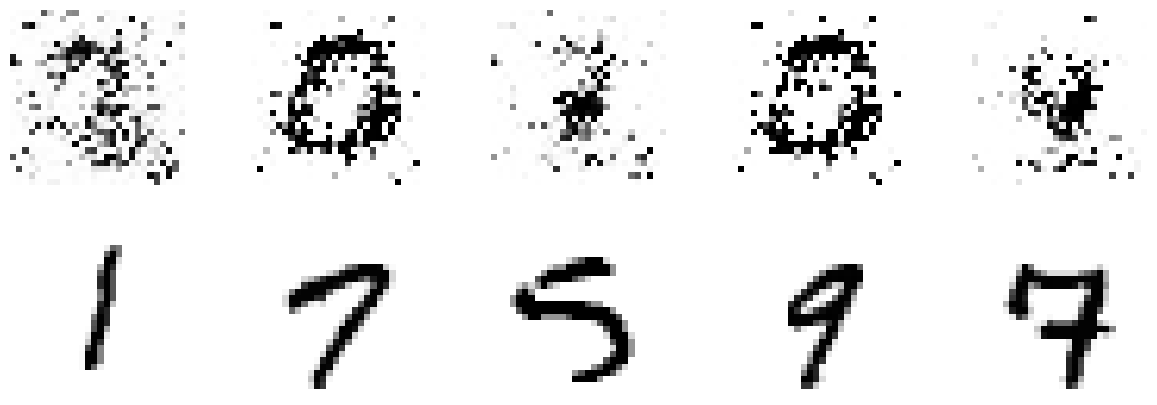

1/1 [==============================] - 0s 19ms/step
D loss:  0.6072999536991119
D accuracy:  0.671875
G loss:  1.8680508136749268


1/1 [==============================] - 0s 17ms/step
D loss:  0.34780101478099823
D accuracy:  0.90625
G loss:  2.5279035568237305




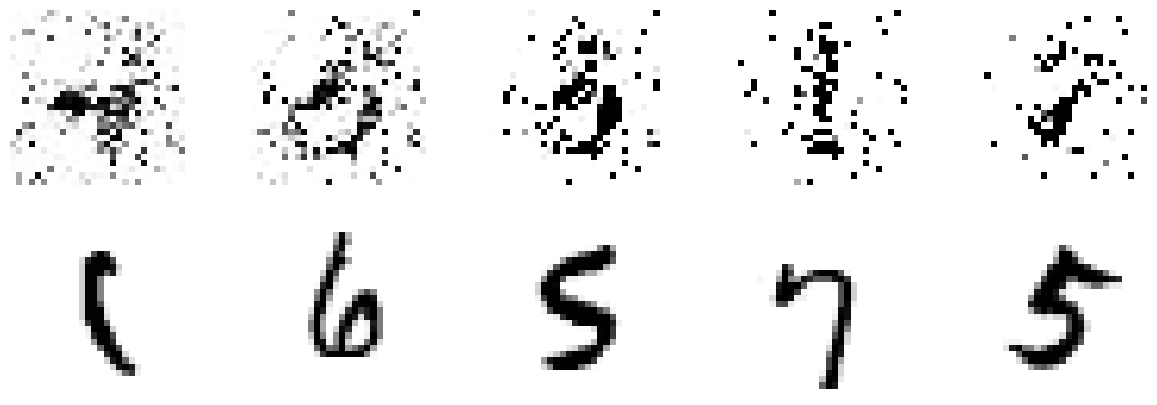

1/1 [==============================] - 0s 15ms/step
D loss:  0.33587273955345154
D accuracy:  0.90625
G loss:  2.677307605743408


1/1 [==============================] - 0s 18ms/step
D loss:  0.3464372754096985
D accuracy:  0.875
G loss:  2.9545042514801025




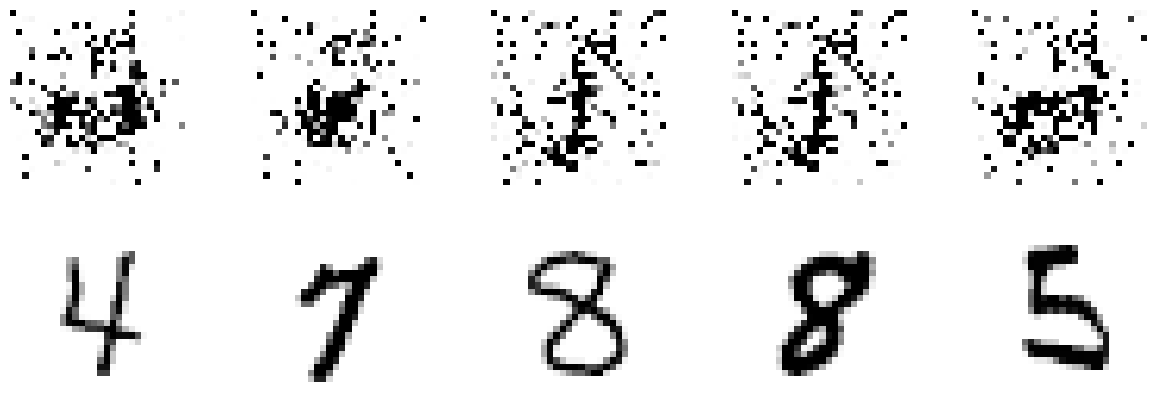

1/1 [==============================] - 0s 28ms/step
D loss:  0.5789602398872375
D accuracy:  0.734375
G loss:  2.408156156539917


1/1 [==============================] - 0s 17ms/step
D loss:  0.506613701581955
D accuracy:  0.796875
G loss:  1.7215251922607422




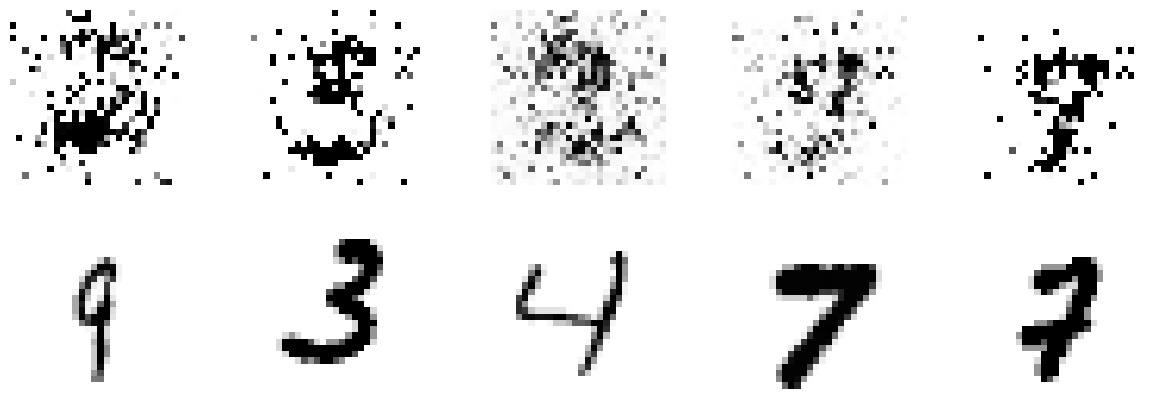

1/1 [==============================] - 0s 20ms/step
D loss:  0.5594331920146942
D accuracy:  0.703125
G loss:  1.6616361141204834


1/1 [==============================] - 0s 23ms/step
D loss:  0.5367440432310104
D accuracy:  0.71875
G loss:  2.3913583755493164




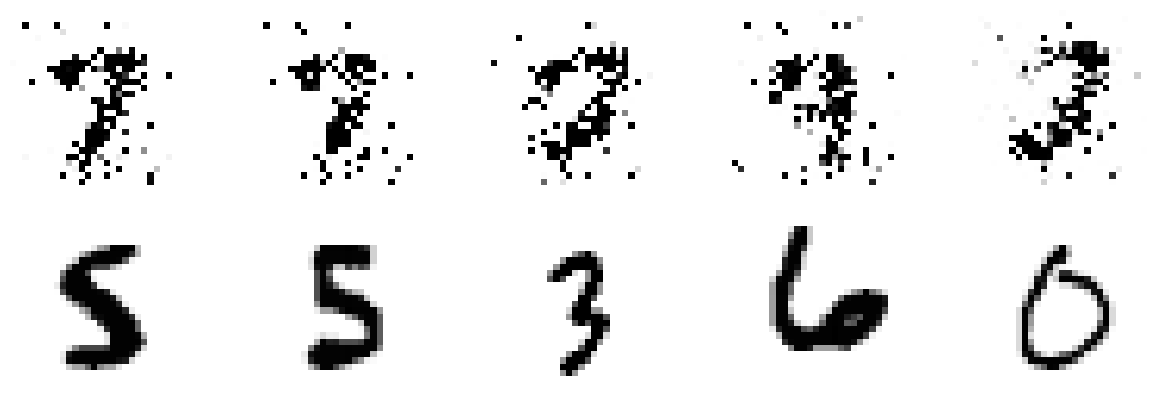

1/1 [==============================] - 0s 16ms/step
D loss:  0.5121859908103943
D accuracy:  0.796875
G loss:  3.4198248386383057


1/1 [==============================] - 0s 16ms/step
D loss:  0.9768071174621582
D accuracy:  0.328125
G loss:  2.028622627258301




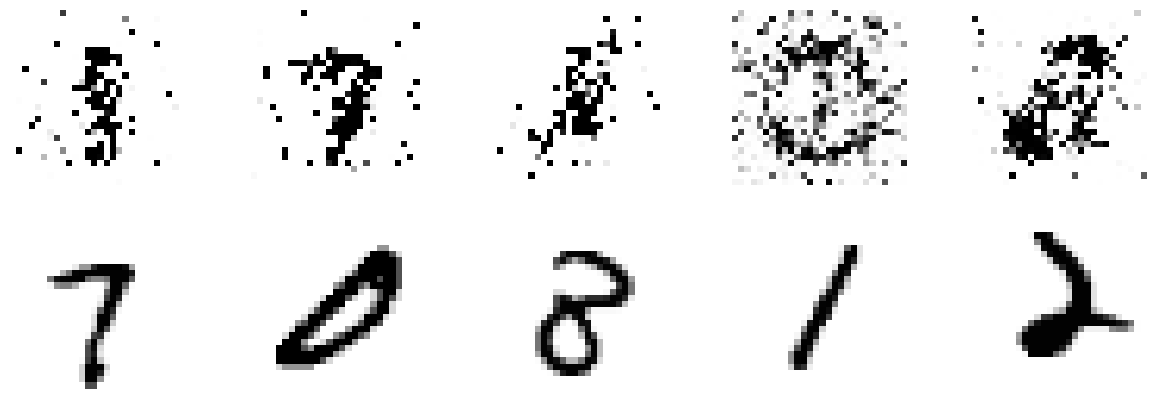

1/1 [==============================] - 0s 28ms/step
D loss:  0.4046519100666046
D accuracy:  0.796875
G loss:  2.292300224304199


1/1 [==============================] - 0s 15ms/step
Epoch:  1
1/1 [==============================] - 0s 16ms/step
D loss:  0.2695894204080105
D accuracy:  0.9375
G loss:  3.108712911605835




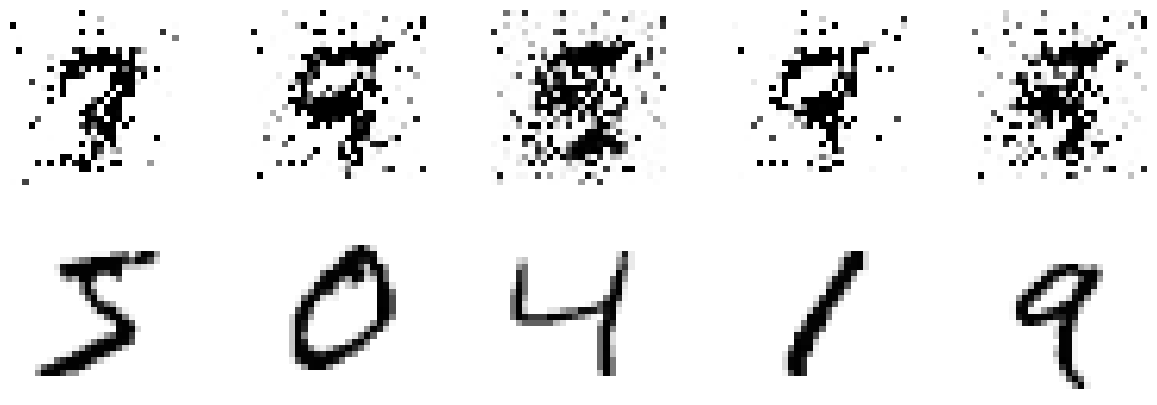

1/1 [==============================] - 0s 17ms/step
D loss:  0.48164933919906616
D accuracy:  0.828125
G loss:  1.243211030960083


1/1 [==============================] - 0s 23ms/step
D loss:  0.8129971623420715
D accuracy:  0.390625
G loss:  1.0714236497879028




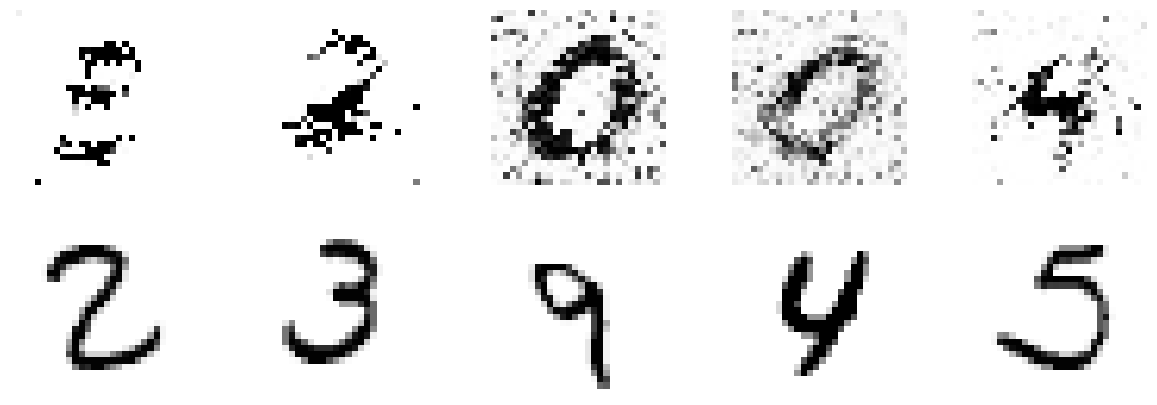

1/1 [==============================] - 0s 16ms/step
D loss:  0.2461102232336998
D accuracy:  0.953125
G loss:  1.6989094018936157


1/1 [==============================] - 0s 16ms/step
D loss:  0.6187837719917297
D accuracy:  0.59375
G loss:  1.2528955936431885




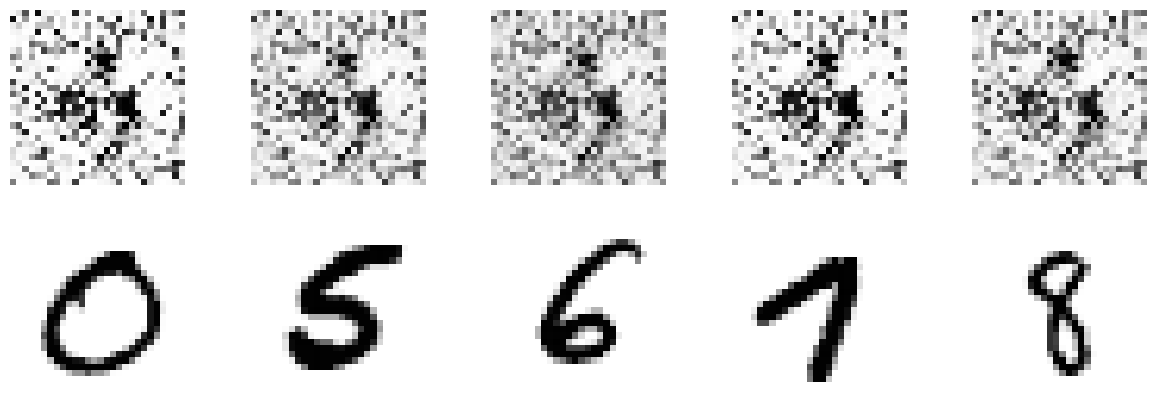

1/1 [==============================] - 0s 29ms/step
D loss:  0.5559983551502228
D accuracy:  0.734375
G loss:  1.162954330444336


1/1 [==============================] - 0s 18ms/step
D loss:  0.757021576166153
D accuracy:  0.5
G loss:  1.026571273803711




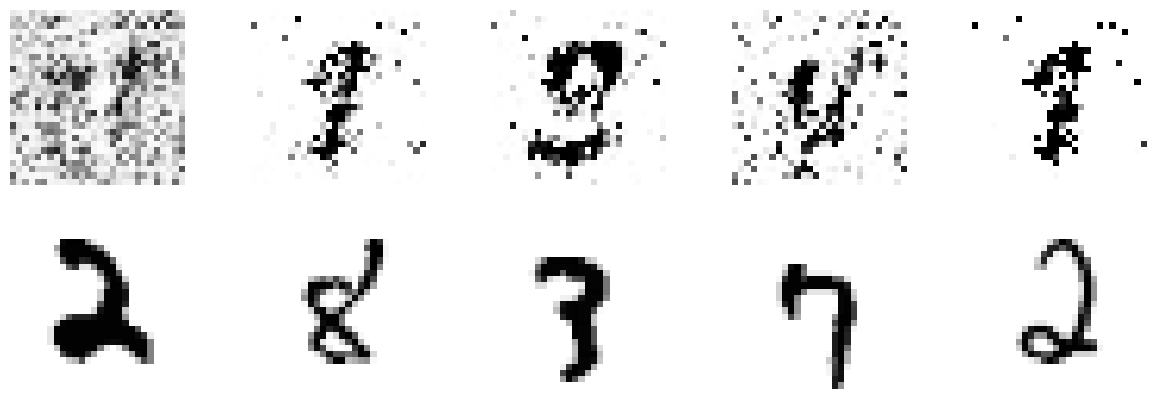

1/1 [==============================] - 0s 16ms/step
D loss:  0.7350004315376282
D accuracy:  0.46875
G loss:  1.4045486450195312


1/1 [==============================] - 0s 16ms/step
D loss:  0.5964215099811554
D accuracy:  0.671875
G loss:  1.4193130731582642




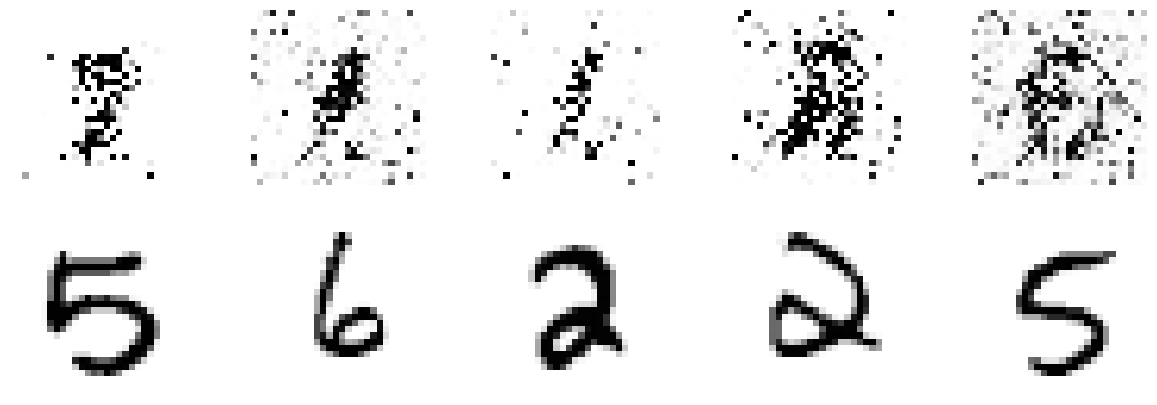

1/1 [==============================] - 0s 16ms/step
D loss:  0.7055020928382874
D accuracy:  0.4375
G loss:  1.0728834867477417


1/1 [==============================] - 0s 17ms/step
D loss:  0.46227623522281647
D accuracy:  0.828125
G loss:  1.2532285451889038




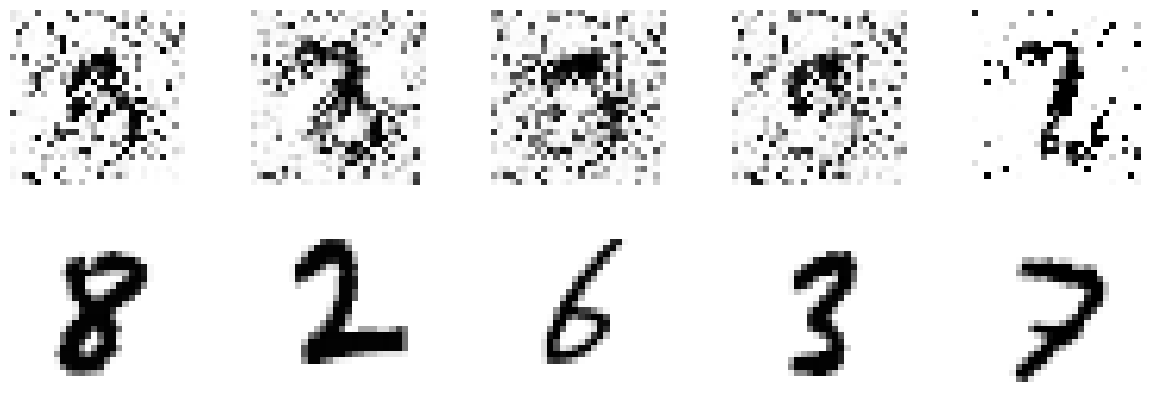

1/1 [==============================] - 0s 16ms/step
D loss:  0.8814474046230316
D accuracy:  0.3125
G loss:  1.231864333152771


1/1 [==============================] - 0s 19ms/step
D loss:  0.6203020215034485
D accuracy:  0.75
G loss:  1.0510350465774536




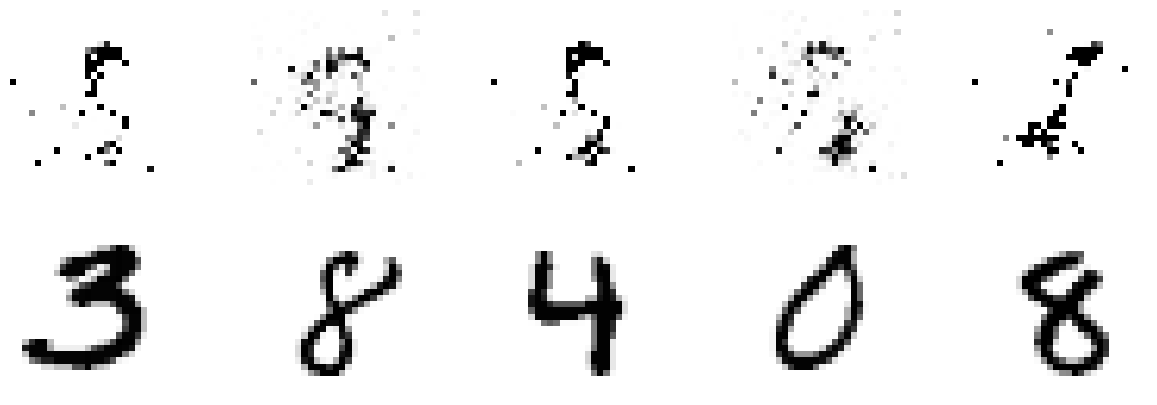

1/1 [==============================] - 0s 25ms/step
D loss:  0.719714343547821
D accuracy:  0.546875
G loss:  1.1066242456436157


1/1 [==============================] - 0s 18ms/step
D loss:  0.6099142134189606
D accuracy:  0.671875
G loss:  1.186995029449463




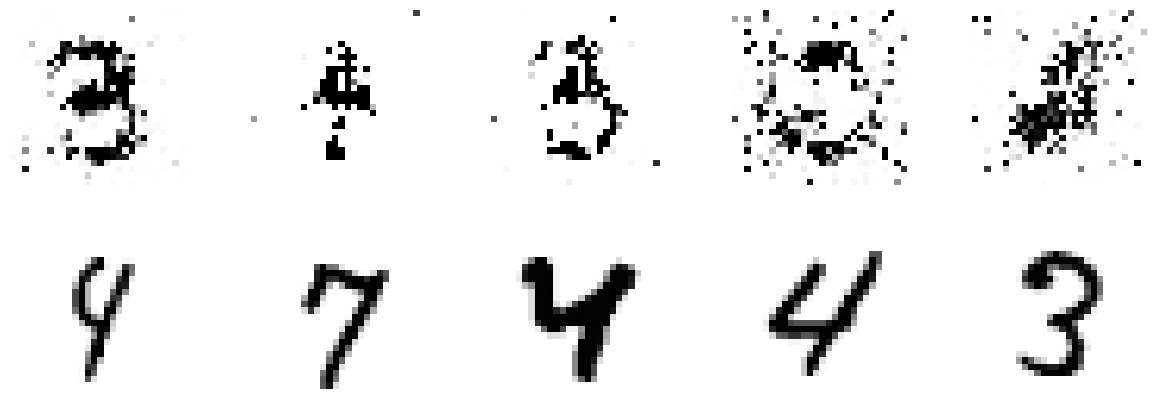

1/1 [==============================] - 0s 20ms/step
D loss:  0.6519885659217834
D accuracy:  0.65625
G loss:  1.1853761672973633


1/1 [==============================] - 0s 28ms/step
D loss:  0.5577901899814606
D accuracy:  0.6875
G loss:  1.1624479293823242




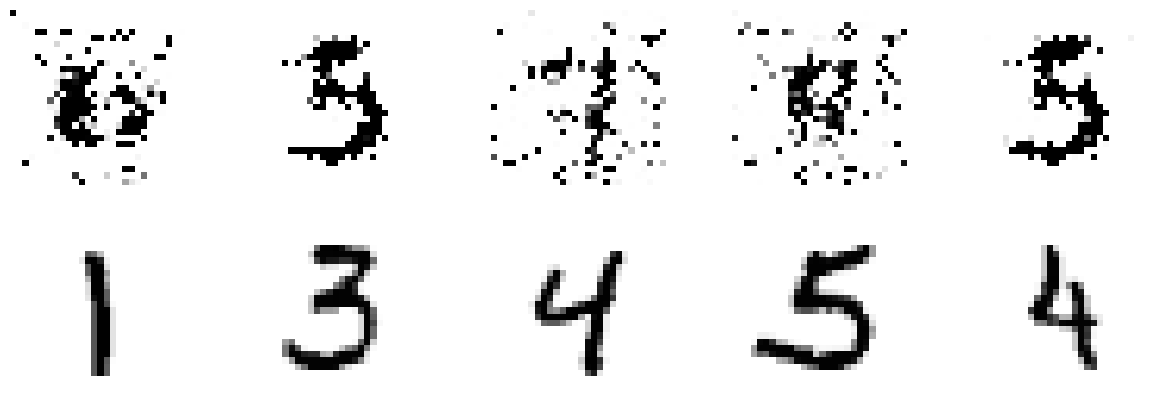

1/1 [==============================] - 0s 15ms/step
D loss:  0.5803466737270355
D accuracy:  0.671875
G loss:  1.1805516481399536


1/1 [==============================] - 0s 15ms/step
D loss:  0.453883558511734
D accuracy:  0.796875
G loss:  1.2394908666610718




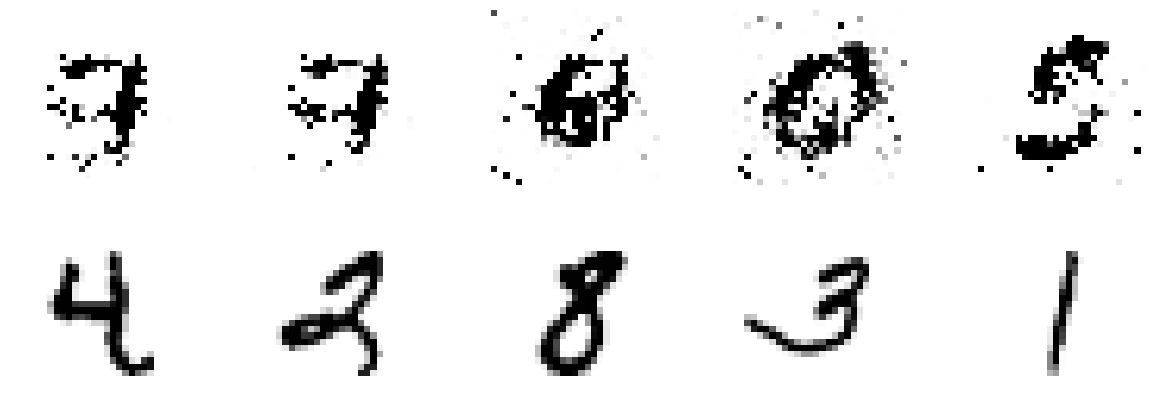

1/1 [==============================] - 0s 16ms/step
D loss:  0.7784069776535034
D accuracy:  0.484375
G loss:  1.2368006706237793


1/1 [==============================] - 0s 16ms/step
D loss:  0.5314525067806244
D accuracy:  0.703125
G loss:  1.1536712646484375




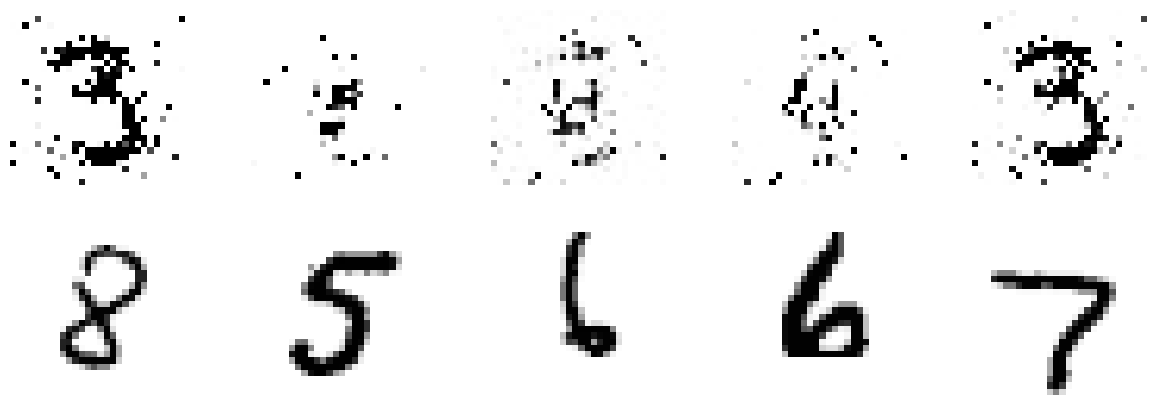

1/1 [==============================] - 0s 32ms/step
D loss:  0.562885656952858
D accuracy:  0.703125
G loss:  1.174687385559082


1/1 [==============================] - 0s 15ms/step
D loss:  0.38812509179115295
D accuracy:  0.875
G loss:  1.2516355514526367




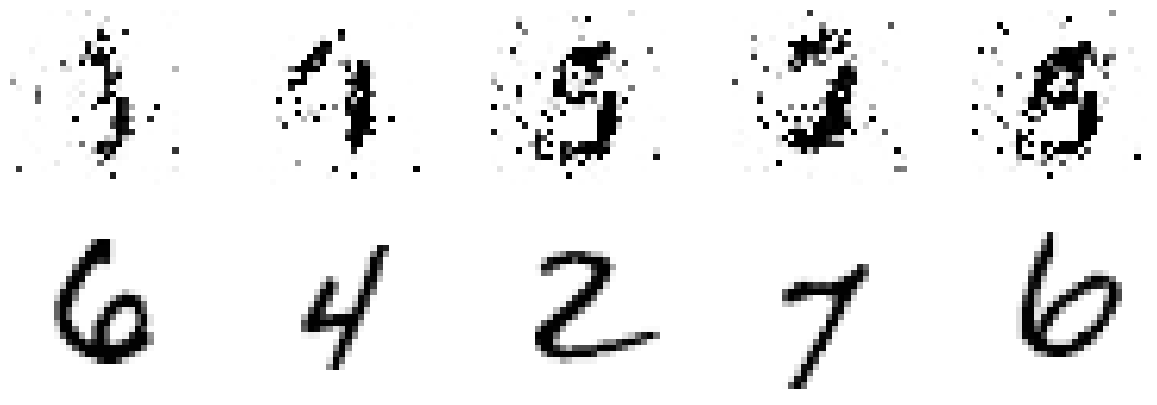

1/1 [==============================] - 0s 19ms/step
D loss:  0.2944948896765709
D accuracy:  0.890625
G loss:  1.4155501127243042


1/1 [==============================] - 0s 25ms/step
D loss:  0.02710071485489607
D accuracy:  1.0
G loss:  3.9152352809906006




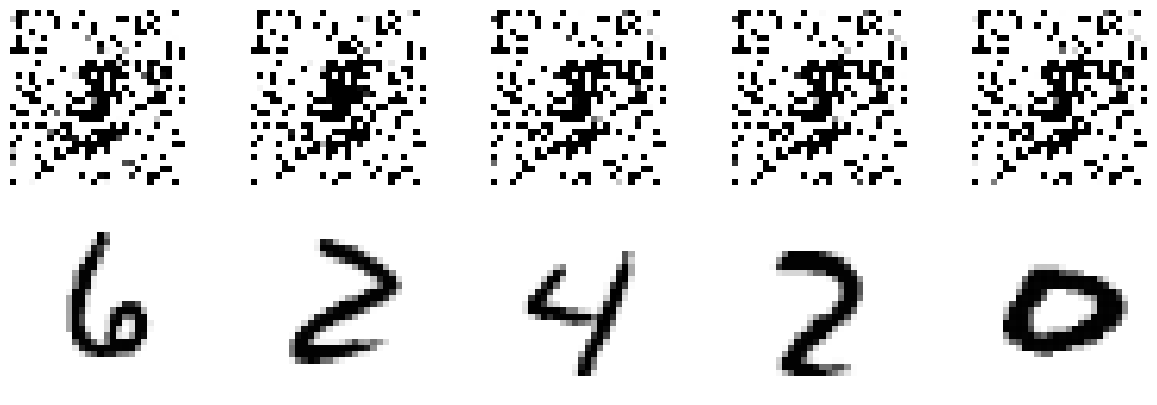

1/1 [==============================] - 0s 16ms/step
D loss:  0.10255108773708344
D accuracy:  0.984375
G loss:  4.846985816955566


1/1 [==============================] - 0s 17ms/step
D loss:  0.43432919681072235
D accuracy:  0.859375
G loss:  2.702820301055908




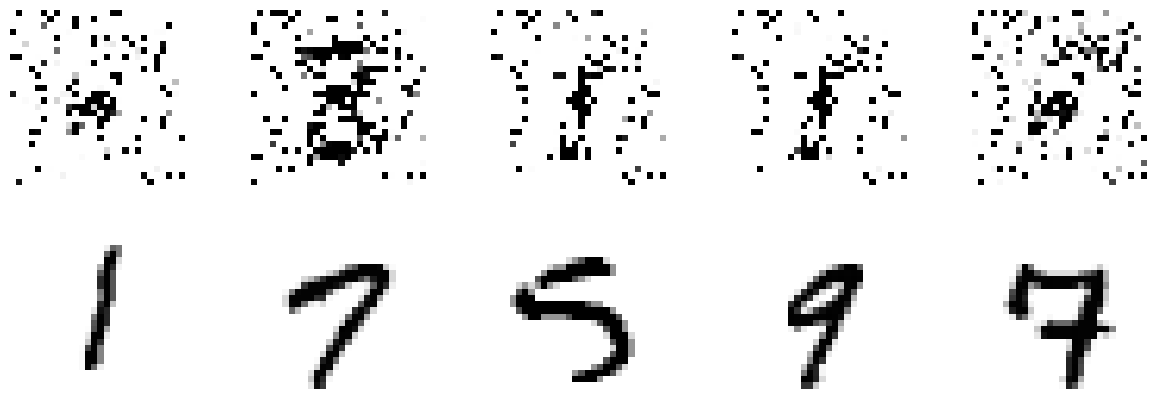

1/1 [==============================] - 0s 25ms/step
D loss:  0.10302309319376945
D accuracy:  0.96875
G loss:  3.552926540374756


1/1 [==============================] - 0s 19ms/step
D loss:  0.14154475182294846
D accuracy:  0.96875
G loss:  4.012674808502197




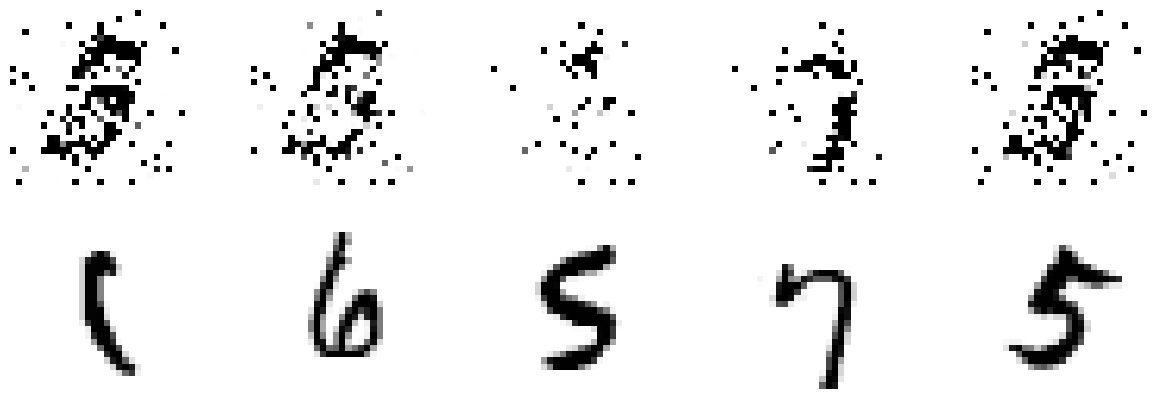

1/1 [==============================] - 0s 22ms/step


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7eadddadfbe0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


1/1 [==============================] - 0s 16ms/step
D loss:  0.04366621747612953
D accuracy:  1.0
G loss:  3.662299156188965


1/1 [==============================] - 0s 24ms/step


KeyboardInterrupt: ignored

In [ ]:
D_LOSS=[]
G_LOSS=[]
train(X_train,generator,discriminator,combined,epochs=10,batch_size=32,sample_interval=100)

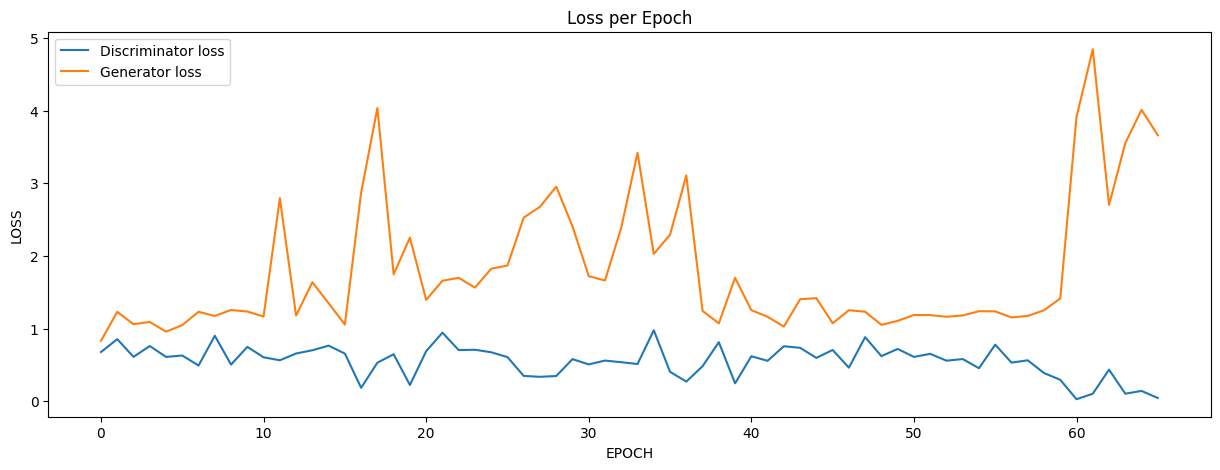

In [ ]:
plt.plot(D_LOSS[2:])
plt.plot(G_LOSS[2:])
plt.title('Loss per Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['Discriminator loss', 'Generator loss'], loc='upper left')
plt.show()